In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import geopandas as gpd
import statsmodels.formula.api as smf
from plotnine import *
pd.options.mode.chained_assignment = None
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', None)
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:  # December to February
        return 'Winter'
ghg = gpd.read_file("../data/ghg_processed.geojson")

In [5]:
ghg.inferred_heating_method.drop_duplicates()

0          Natural Gas
2             Fuel Oil
10         Electricity
28             Unknown
1076    District Steam
Name: inferred_heating_method, dtype: object

In [6]:
ghg = ghg.dropna(subset = ["co2_intensity", 'kwh'])
ghg = ghg.query("co2_intensity != 0")

In [7]:
colors =  ["#00a5bd", "#e6e6e6", "#f5d855", "#ff8e52", "#000000"]

In [8]:
ghg["bottom_quint_unit"] = pd.to_numeric(ghg["unit_co2_quintile"] == '5').astype(int)
ghg["top_quint_unit"] = pd.to_numeric(ghg["unit_co2_quintile"] == '1').astype(int)

In [9]:
ghg["bottom_quint"] = (ghg["efficiency_quintile"] == '5').astype(int)
ghg["top_quint"] = pd.to_numeric(ghg["efficiency_quintile"] == '1').astype(int)

In [10]:
ghg["efficiency_tertile"] = pd.qcut(ghg["co2_intensity"], 3, labels=False).astype(str)

In [11]:
ghg["bottom_quint"]

0        0
1        0
2        1
4        1
5        0
        ..
17153    0
17154    0
17155    1
17156    1
17157    0
Name: bottom_quint, Length: 16540, dtype: int64

In [12]:
# Define the correct order for your categories
ordered_categories = ['< 750', '750 - 1000', '1000 - 1250', '1250 - 2000', '2000 +']

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['apt_size_cat'] = pd.Categorical(ghg['apt_size_cat'], categories=ordered_categories, ordered=True)

In [13]:
# Define the correct order for your categories
ordered_categories = ['< 650', '650 - 1000', '1000 - 1250', '1250+']

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['apt_size_cat2'] = pd.Categorical(ghg['apt_size_cat2'], categories=ordered_categories, ordered=True)

In [14]:
# Define the correct order for your categories
ordered_categories = ['<30k', '30k-75k', '75k-125k', '125k-175k', '175k+']

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['income_bin'] = pd.Categorical(ghg['income_bin'], categories=ordered_categories, ordered=True)

In [15]:
# Define the correct order for your categories
ordered_categories = ["< 450", "450 - 600", "600 - 750", "750 - 1000", "1000 +"]


# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['sqft_bedroom_cat'] = pd.Categorical(ghg['sqft_bedroom_cat'], categories=ordered_categories, ordered=True)

In [16]:
# Define the correct order for your categories
ordered_categories = ['< 400', '400 - 600', '600 - 1000', '1000 - 1700', '1700 +']
bins = [-np.Inf, 400, 600, 1000, 1700, np.Inf]

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['price_sqft_cat'] = pd.cut(ghg['value_per_sqft'], bins = bins, labels = ordered_categories, ordered=True)

In [17]:
# Define the correct order for your categories
ordered_categories = ['Electricity', 'Natural Gas', 'District Steam', 'Fuel Oil', 'Unknown']

ghg["inferred_heating_method"] = pd.Categorical(ghg["inferred_heating_method"], categories=ordered_categories, ordered=True)


In [18]:
ghg["gas_per_sqft"] = (ghg['total_emissions'] * ghg['natural_gas_emissions_pct']) / ghg["total_fa"]

In [19]:
gas = ghg.query("inferred_heating_method == 'Natural Gas'")
gas.groupby("apt_size_cat")["gas_per_sqft"].mean().reset_index()

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/1344318606.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


apt_size_cat  gas_per_sqft
0        < 750      0.004376
1   750 - 1000      0.003940
2  1000 - 1250      0.003524
3  1250 - 2000      0.003285
4       2000 +      0.002334

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/3587227357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


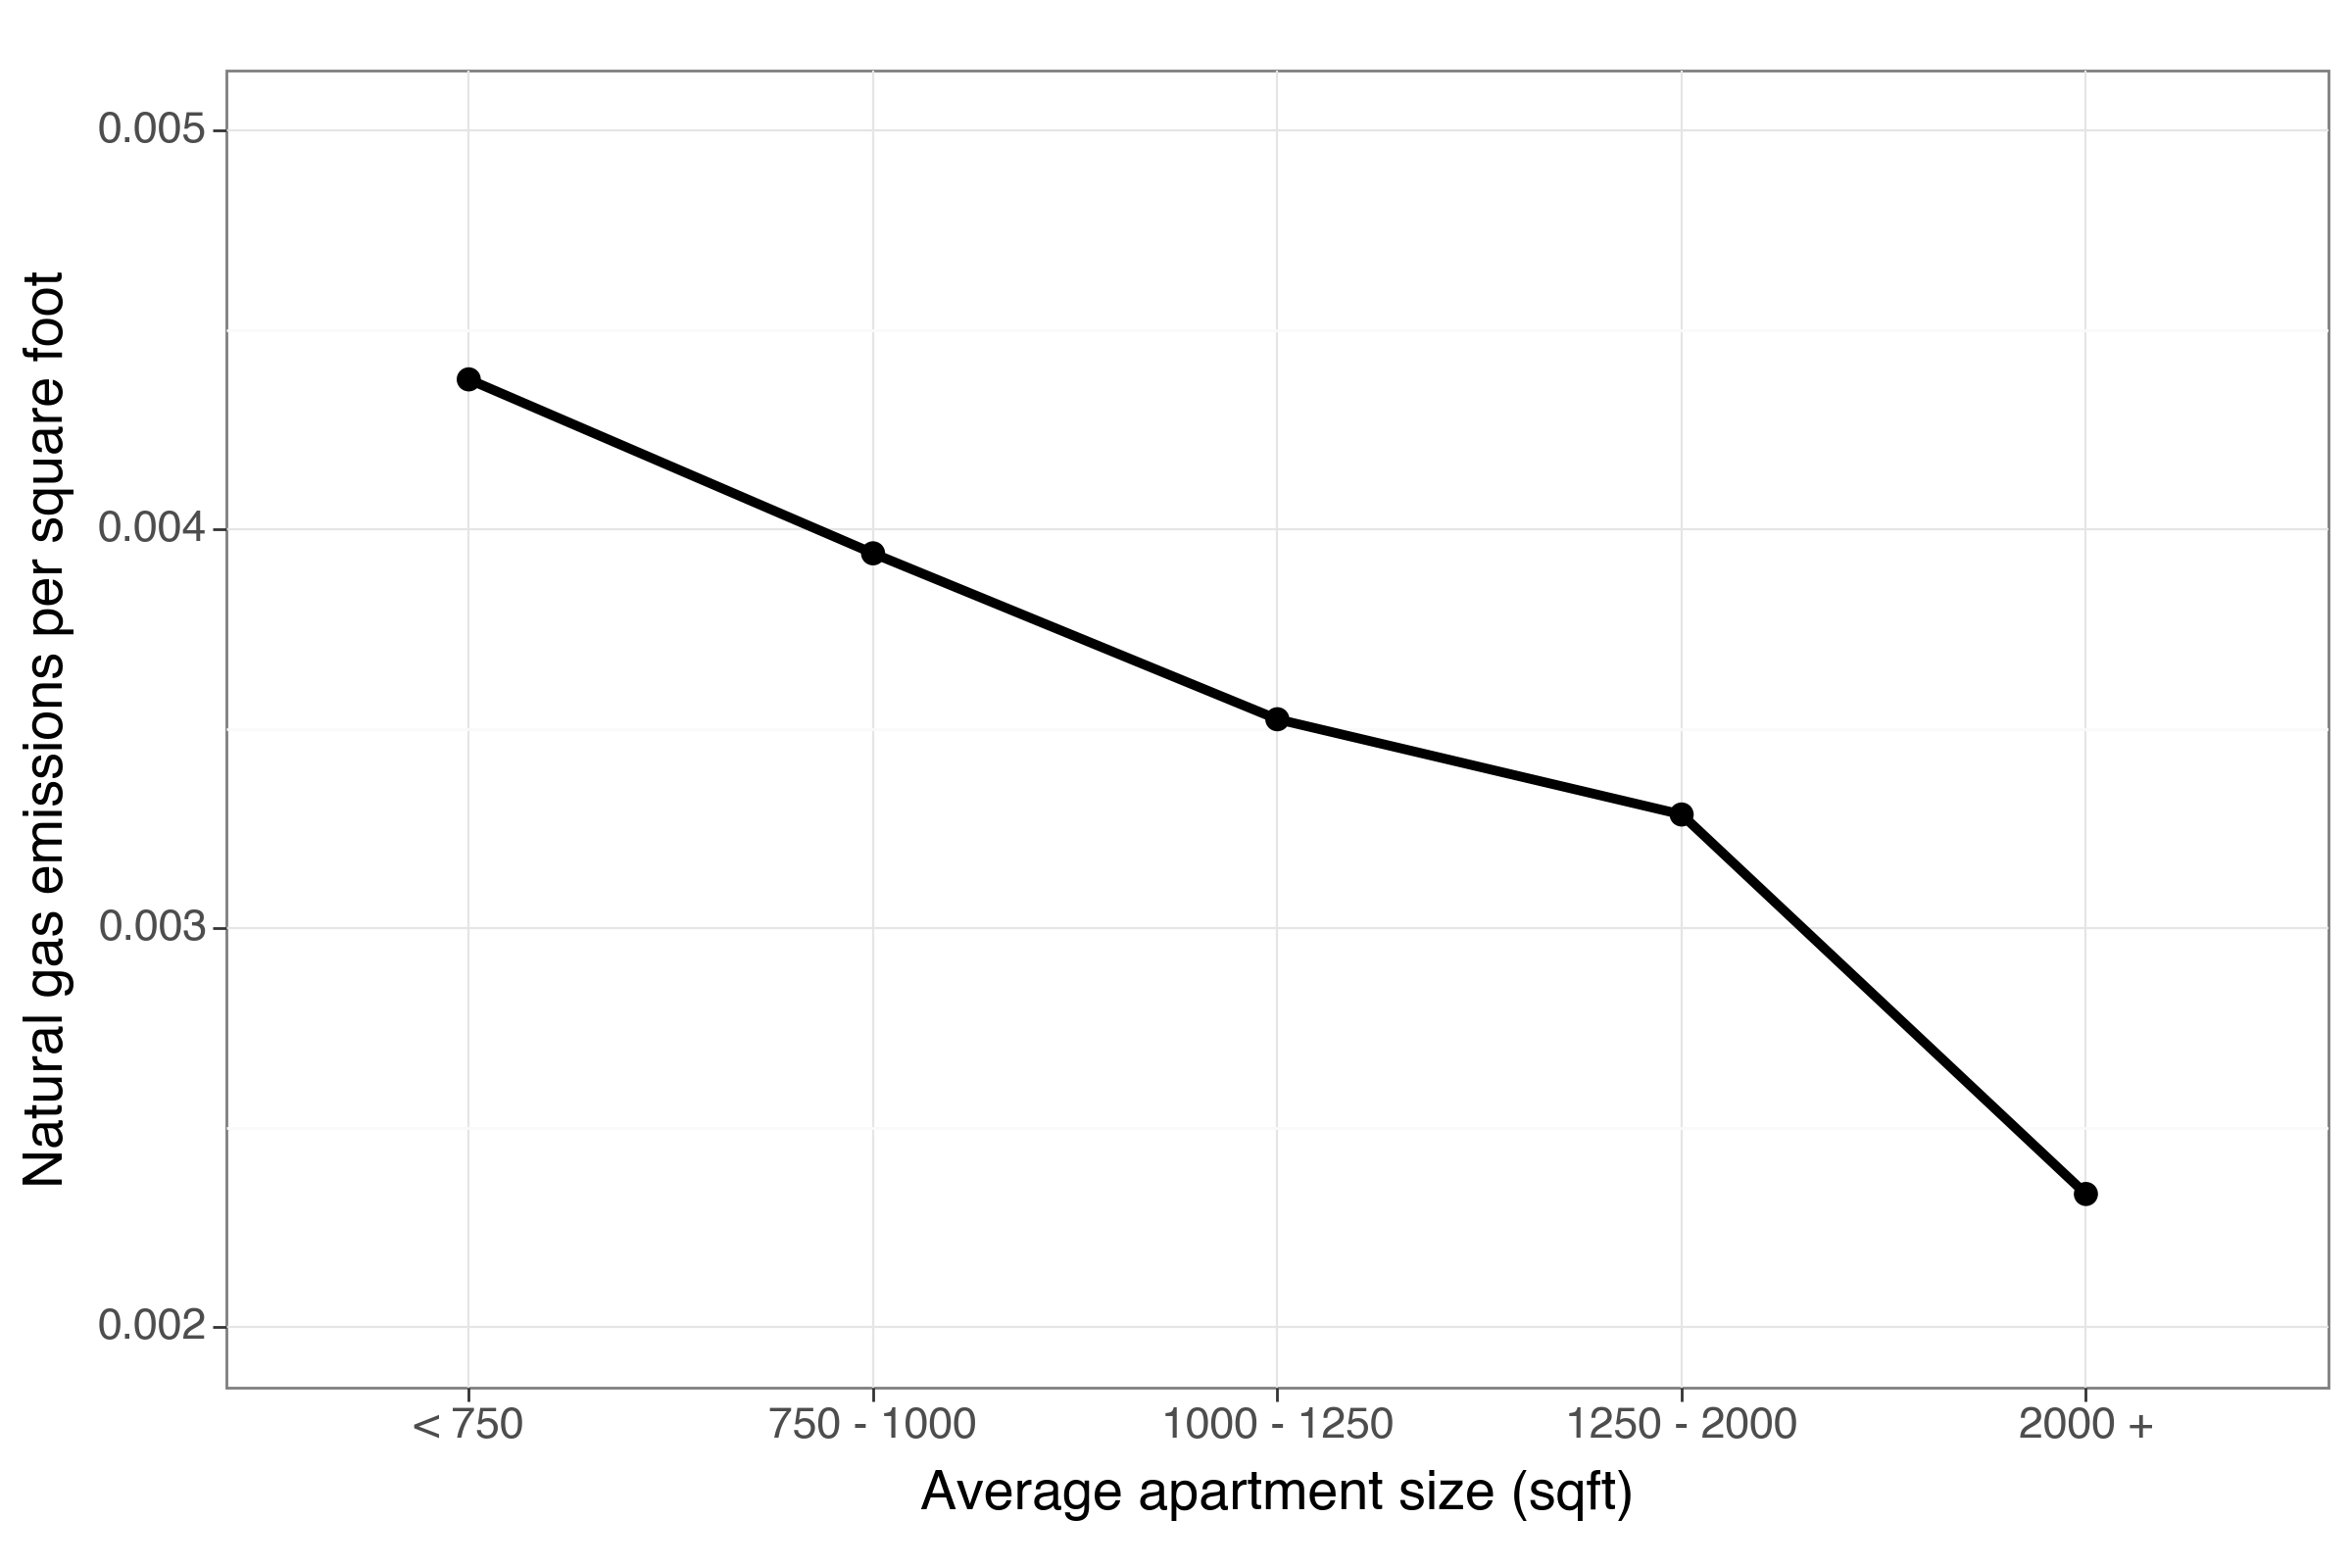

<Figure Size: (1200 x 800)>

In [20]:
(ggplot(gas.groupby("apt_size_cat")["gas_per_sqft"].mean().reset_index(), aes(x = "apt_size_cat", y = "gas_per_sqft", group = 1)) +
  geom_point(size = 4) +
  geom_line(size = 2) +
  ylim(0.002, .005) +
  theme_bw(base_size = 20) +
  theme(figure_size=(12,8)) +
  labs(x = "Average apartment size (sqft)", y = "Natural gas emissions per square foot"))

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 34 rows containing non-finite values.


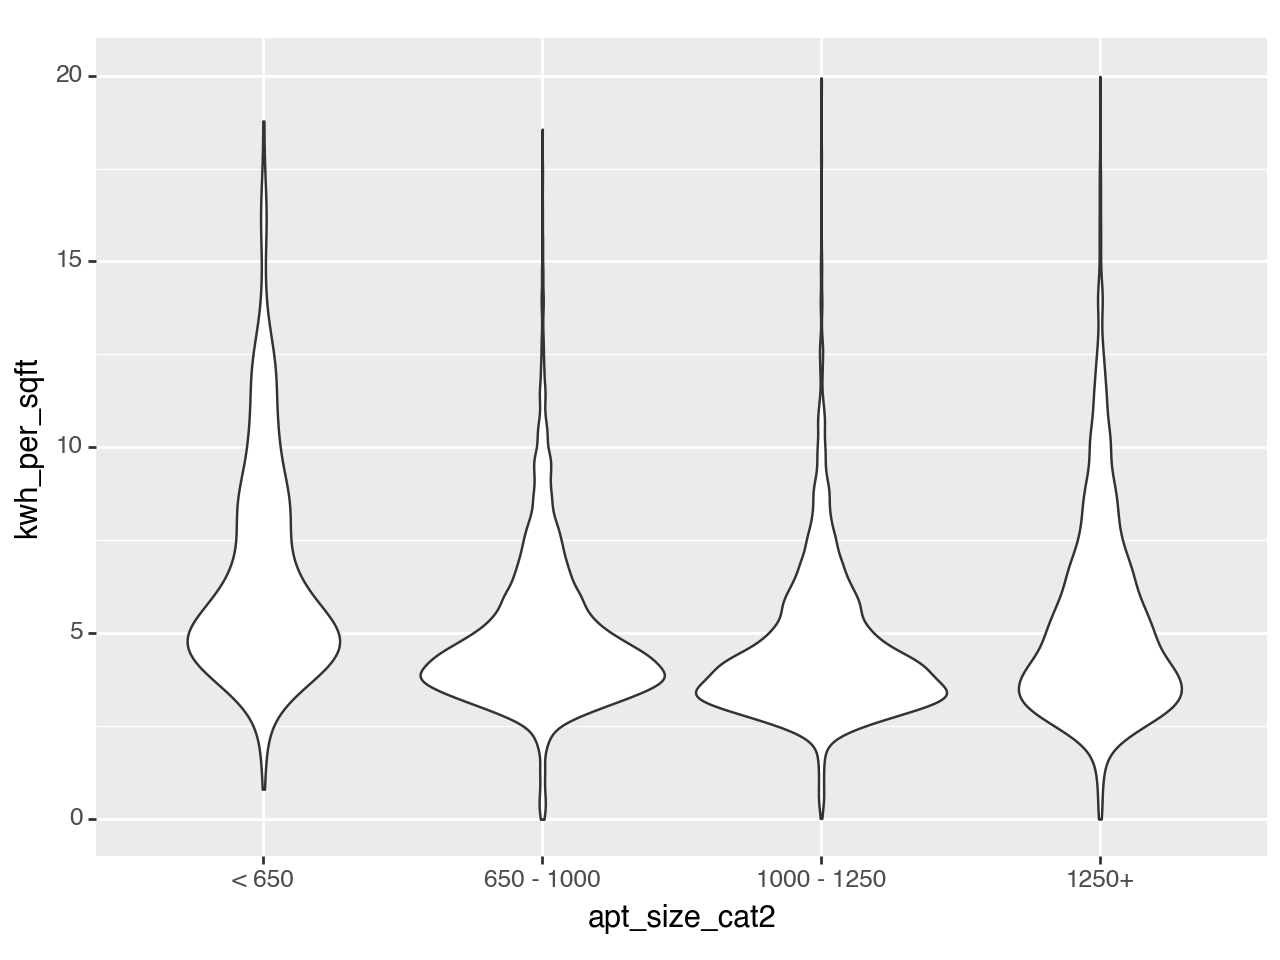

<Figure Size: (640 x 480)>

In [21]:
(ggplot(gas, aes(x = "apt_size_cat2", y = "kwh_per_sqft")) + geom_violin() + ylim(0, 20))

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 18 rows containing non-finite values.


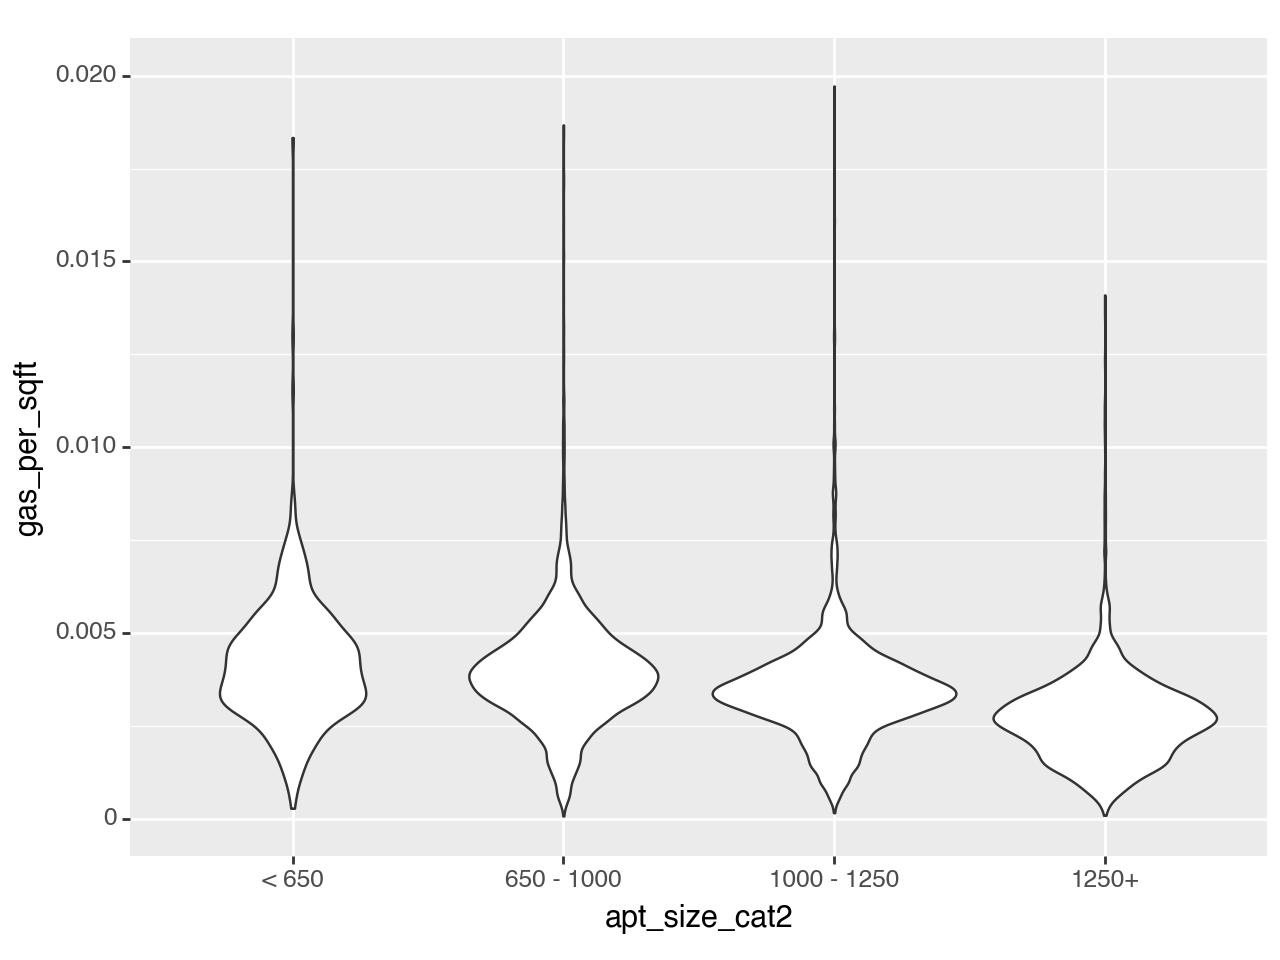

<Figure Size: (640 x 480)>

In [22]:
(ggplot(gas, aes(x = "apt_size_cat2", y = "gas_per_sqft")) + geom_violin() + ylim(0, 0.02))

In [23]:
ghg["water_per_sqft"].isna().sum()

4068

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 4298 rows containing non-finite values.


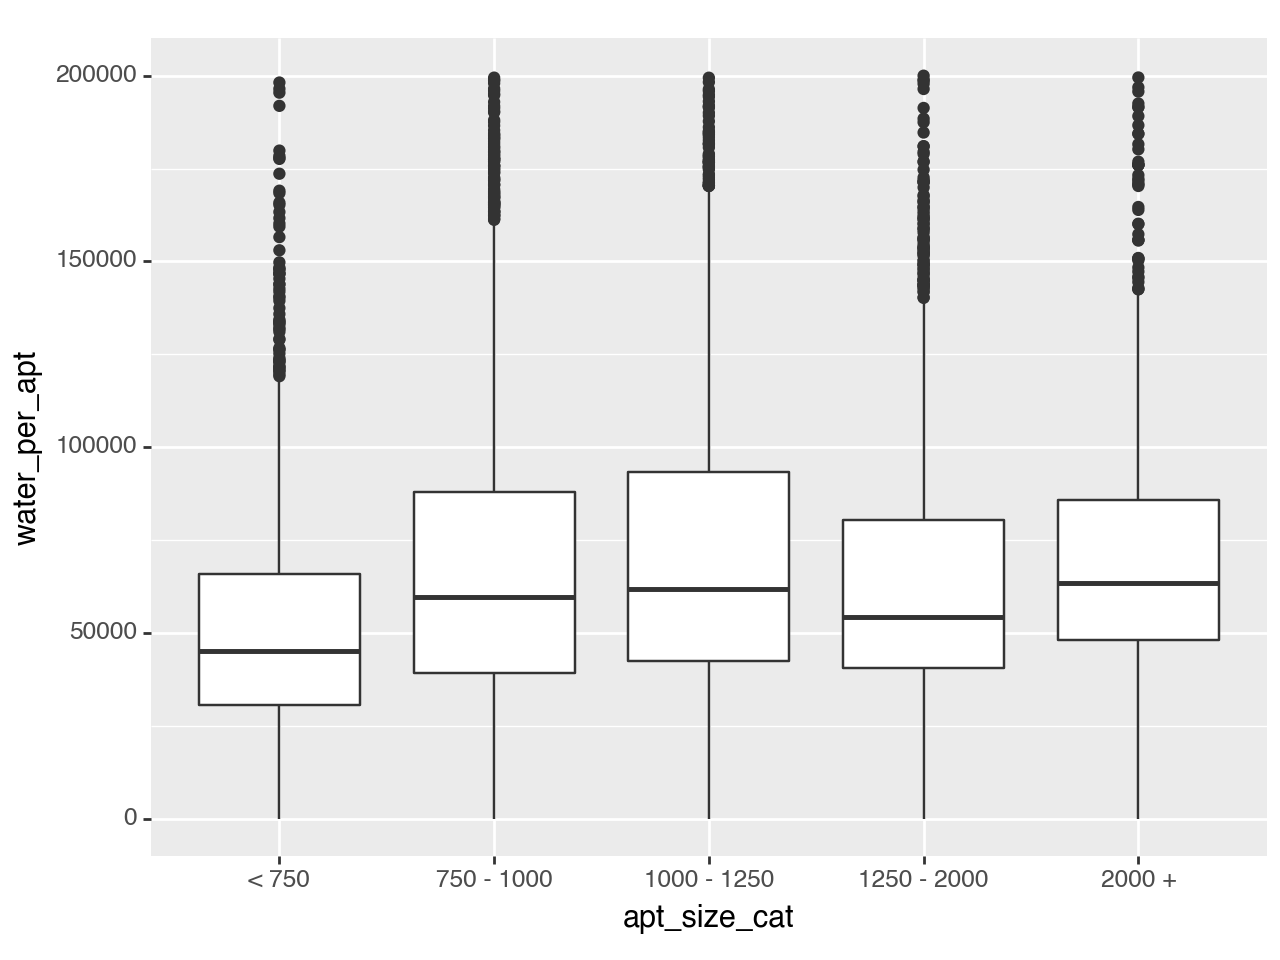

<Figure Size: (640 x 480)>

In [24]:
ggplot(ghg, aes(x = "apt_size_cat", y = "water_per_apt")) + geom_boxplot() + ylim(0, 200000)

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 4289 rows containing non-finite values.


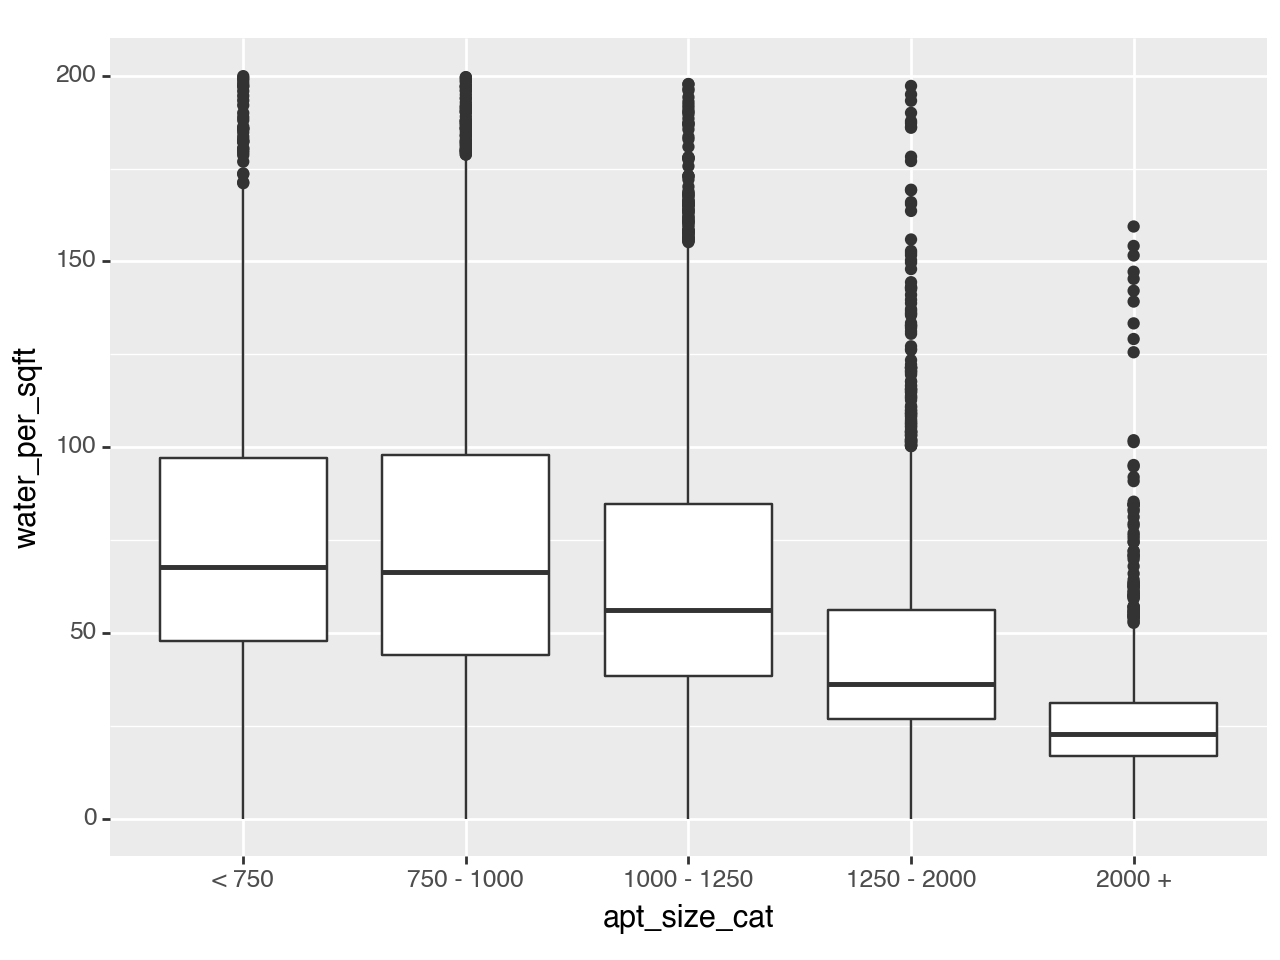

<Figure Size: (640 x 480)>

In [25]:
ggplot(ghg, aes(x = "apt_size_cat", y = "water_per_sqft")) + geom_boxplot() + ylim(0, 200)

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/3113642150.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


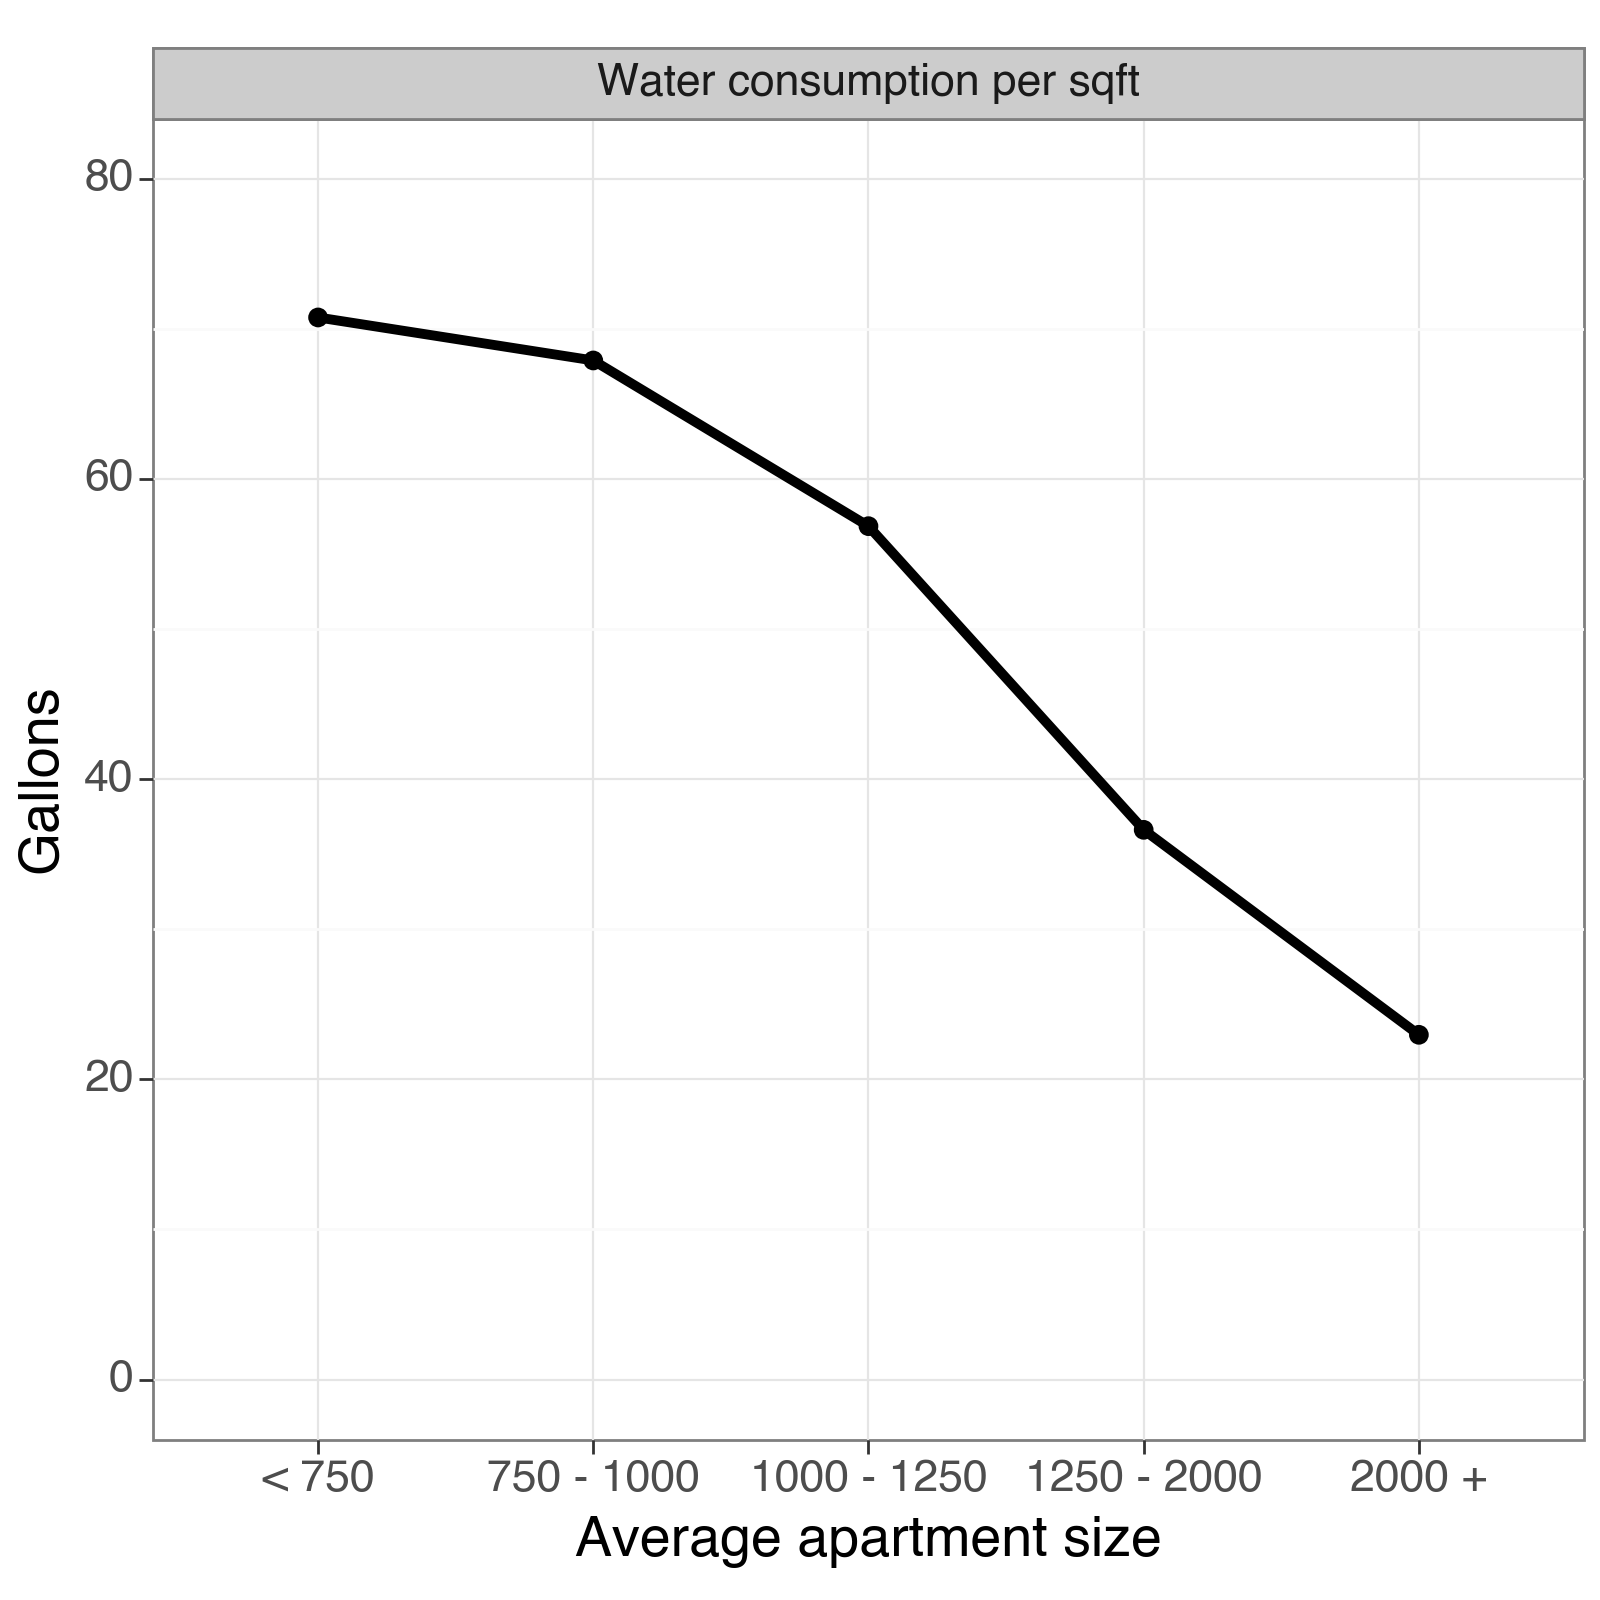

<Figure Size: (800 x 800)>

In [26]:
plot_dat = ghg.groupby("apt_size_cat")[["water_per_sqft", "water_per_apt"]].median().reset_index().rename({"water_per_sqft" : "Water consumption per sqft", "water_per_apt" : "Water consumption per apartment"}, axis =1).melt("apt_size_cat")
(ggplot(plot_dat.query("variable == 'Water consumption per sqft'"), aes(x = "apt_size_cat", y = "value", group = "variable")) + 
 geom_point(size = 3) + 
 geom_line(size = 2) +
 facet_wrap("~variable") +
theme_bw(base_size= 20) + 
ylim(0, 80) +
labs(x = "Average apartment size", y = "Gallons") +
 theme(figure_size=(8,8), legend_position="top") )

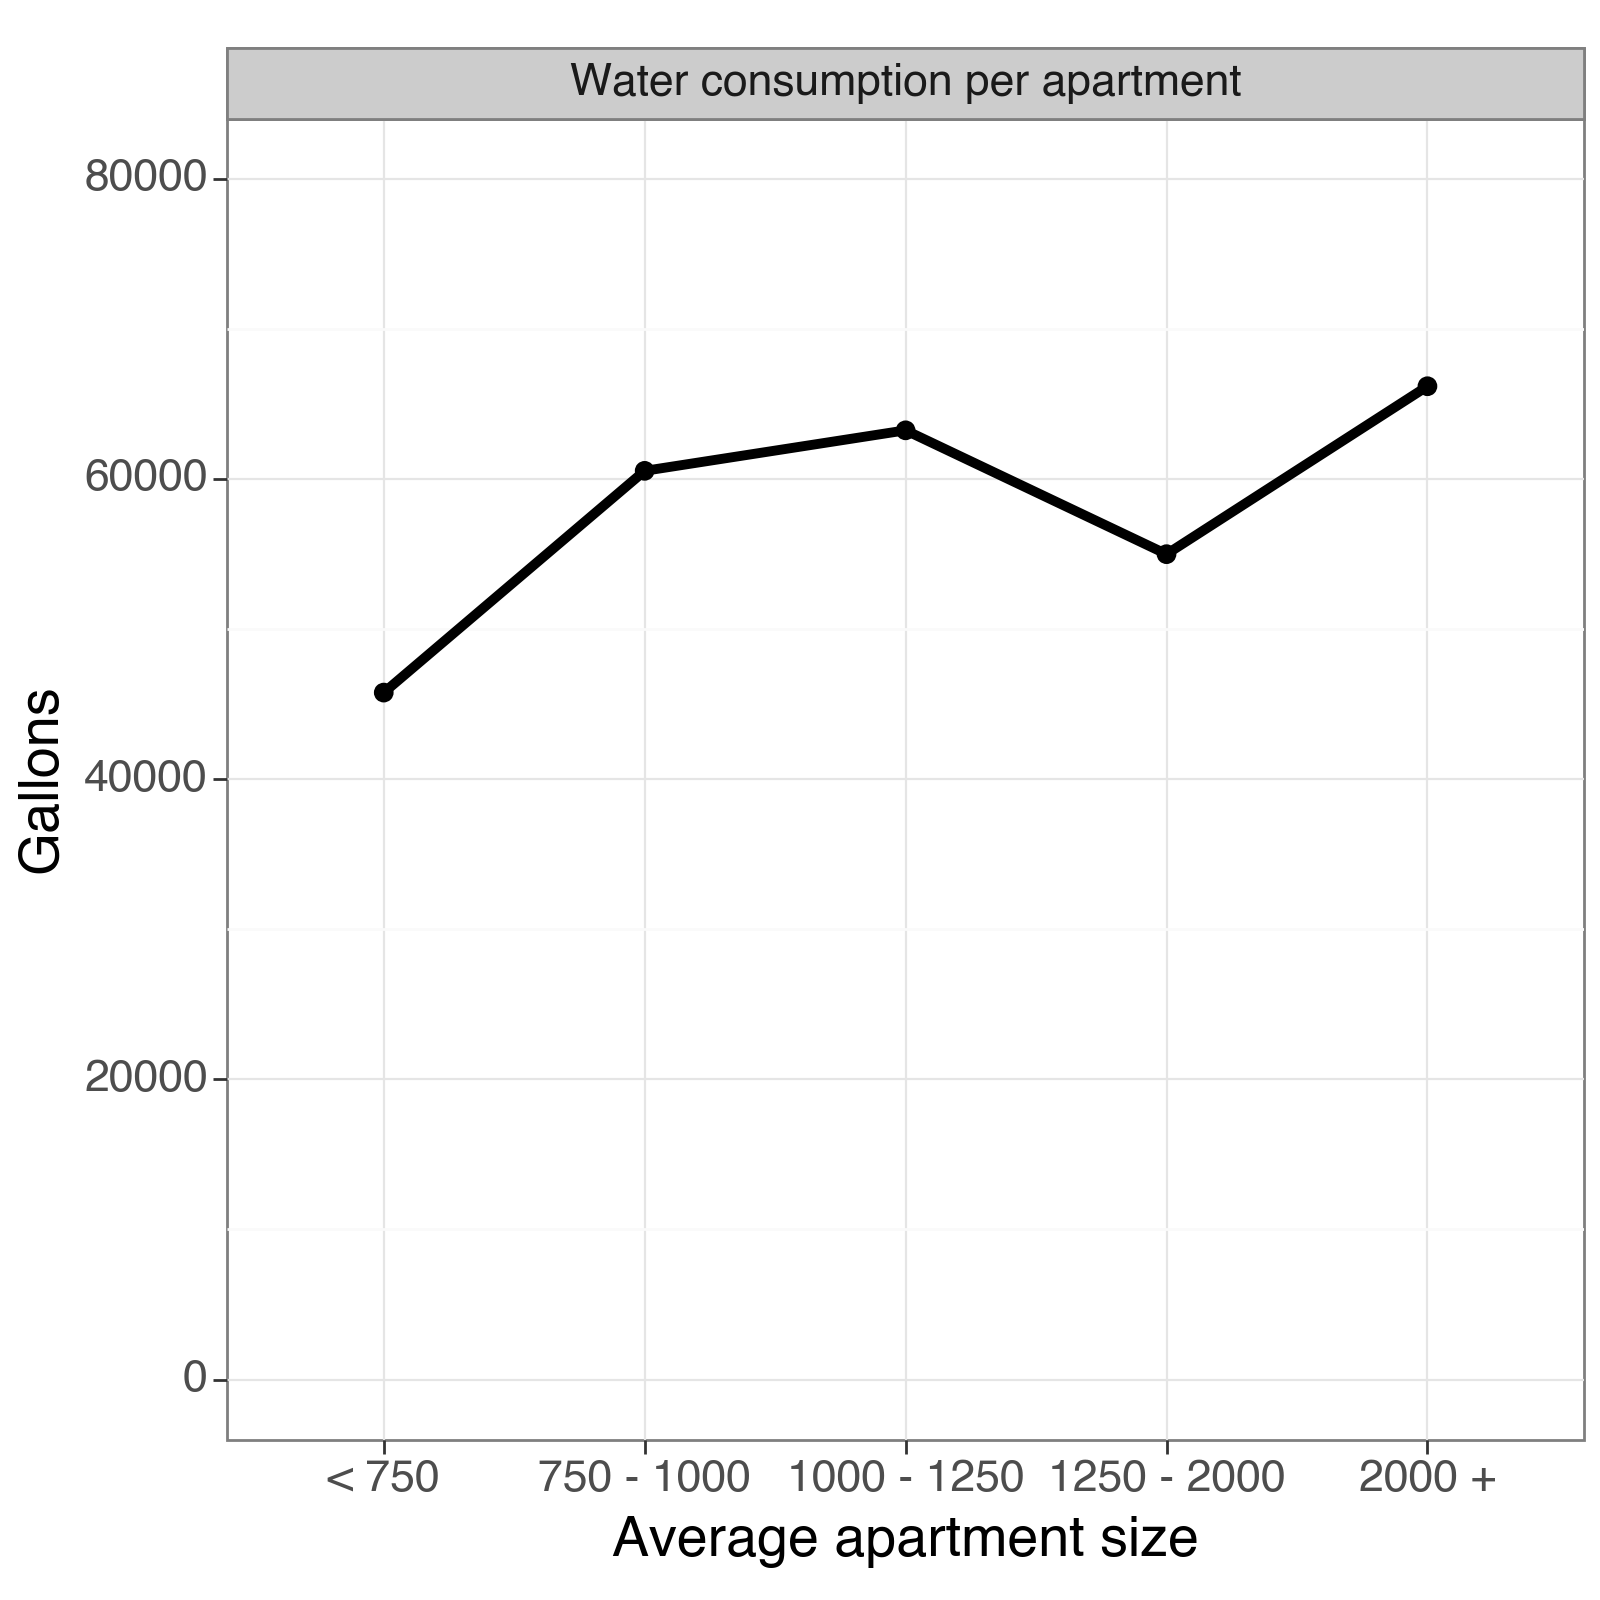

<Figure Size: (800 x 800)>

In [27]:
(ggplot(plot_dat.query("variable == 'Water consumption per apartment'"), aes(x = "apt_size_cat", y = "value", group = "variable")) + 
 geom_point(size = 3) + 
 geom_line(size = 2) +
 facet_wrap("~variable") +
theme_bw(base_size= 20) + 
ylim(0, 80000) +
labs(x = "Average apartment size", y = "Gallons") +
 theme(figure_size=(8,8), legend_position="top"))

In [28]:
ghg

bbl                         name  property id  total_units  \
0      2042500026    1870 Pelham Parkway South      9793770         57.0   
1      2042470057     MMD: 2015 ST PAUL AVENUE      5866223         67.0   
2      2042380018        Hamdi: 3110 Wilkinson      9147200         32.0   
4      2042510041         2965 East 196 Street      6297534         52.0   
5      2042460020      2025 Continental Avenue     26085736         55.0   
...           ...                          ...          ...          ...   
17153  3084290036            Plaza Owners Inc.      3076623        127.0   
17154  3017960001  Elijah Smith Senior Citizen      4398445         91.0   
17155  4036310001             6901 62nd Street     21646051         81.0   
17156  4036280017             6930 62nd Street     21646052         56.0   
17157  3016620012              666 Hancock St.      6699459         39.0   

         eui  bedrooms  housing_fa  total_fa  co2_intensity  total_co2  \
0       58.5      74.0     52941.0   52941.0            4.1      216.1   
1       64.0      79.0     62702.0   62702.0            3.7      234.6   
2       97.2      38.0     29960.0   29960.0            7.2      216.3   
4       93.0      75.0     42000.0   42000.0            7.0      295.7   
5       67.0      81.0     57840.0   57840.0            4.0      231.3   
...      ...       ...         ...       ...            ...        ...   
17153   86.1     210.0    125852.0  133852.0            4.9      661.4   
17154   71.2      91.0     73220.0   73220.0            4.2      310.2   
17155  123.3      81.0     57716.0   57716.0            6.9      400.1   
17156  114.1      64.0     45352.0   45352.0            6.5      293.5   
17157  103.7      58.0     34010.0   34010.0            5.9      201.7   

            kwh  gallons_water   latitude  longitude  year_built  occupancy  \
0      481527.0      5965000.0  40.855488 -73.830726        1960         75   
1      199423.0      4935900.0  40.852914 -73.829023        1964        100   
2      108040.0      2953300.0  40.851651 -73.828726        1928        100   
4      157443.0      3853500.0  40.854306 -73.829290        1928        100   
5      239130.0      4193400.0  40.852646 -73.829905        1963        100   
...         ...            ...        ...        ...         ...        ...   
17153  457625.9      3768700.0  40.618981 -73.908752        1965        100   
17154  310658.0      3922000.0  40.689980 -73.942323        1997        100   
17155  206795.0      5709100.0  40.703934 -73.894693        1928        100   
17156  173534.0      4453100.0  40.703571 -73.894563        1929        100   
17157  134338.0            NaN  40.685004 -73.928500        1930        100   

       unit_laundry_hookups  common_laundry_hookups  direct_emissions  \
0                       NaN                     NaN              77.2   
1                       6.0                     0.0             177.1   
2                       NaN                     NaN             185.1   
4                       NaN                     NaN             250.3   
5                       NaN                     NaN             162.4   
...                     ...                     ...               ...   
17153                   0.0                     0.0             529.4   
17154                   0.0                     4.0             220.6   
17155                   0.0                     0.0             340.5   
17156                   0.0                     0.0             243.5   
17157                   0.0                     0.0             162.9   

       indirect_emissions     total_e  kwh_per_sqft  avg_apt_size  \
0                   138.9   3097048.5      9.095540    928.789474   
1                    57.5   4012928.0      3.180489    935.850746   
2                    31.2   2912112.0      3.606142    936.250000   
4                    45.4   3906000.0      3.748643    807.692308   
5                    69.0   3875280.0    

In [29]:
ghg.inferred_heating_method.isna().sum()

0

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/1188588919.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


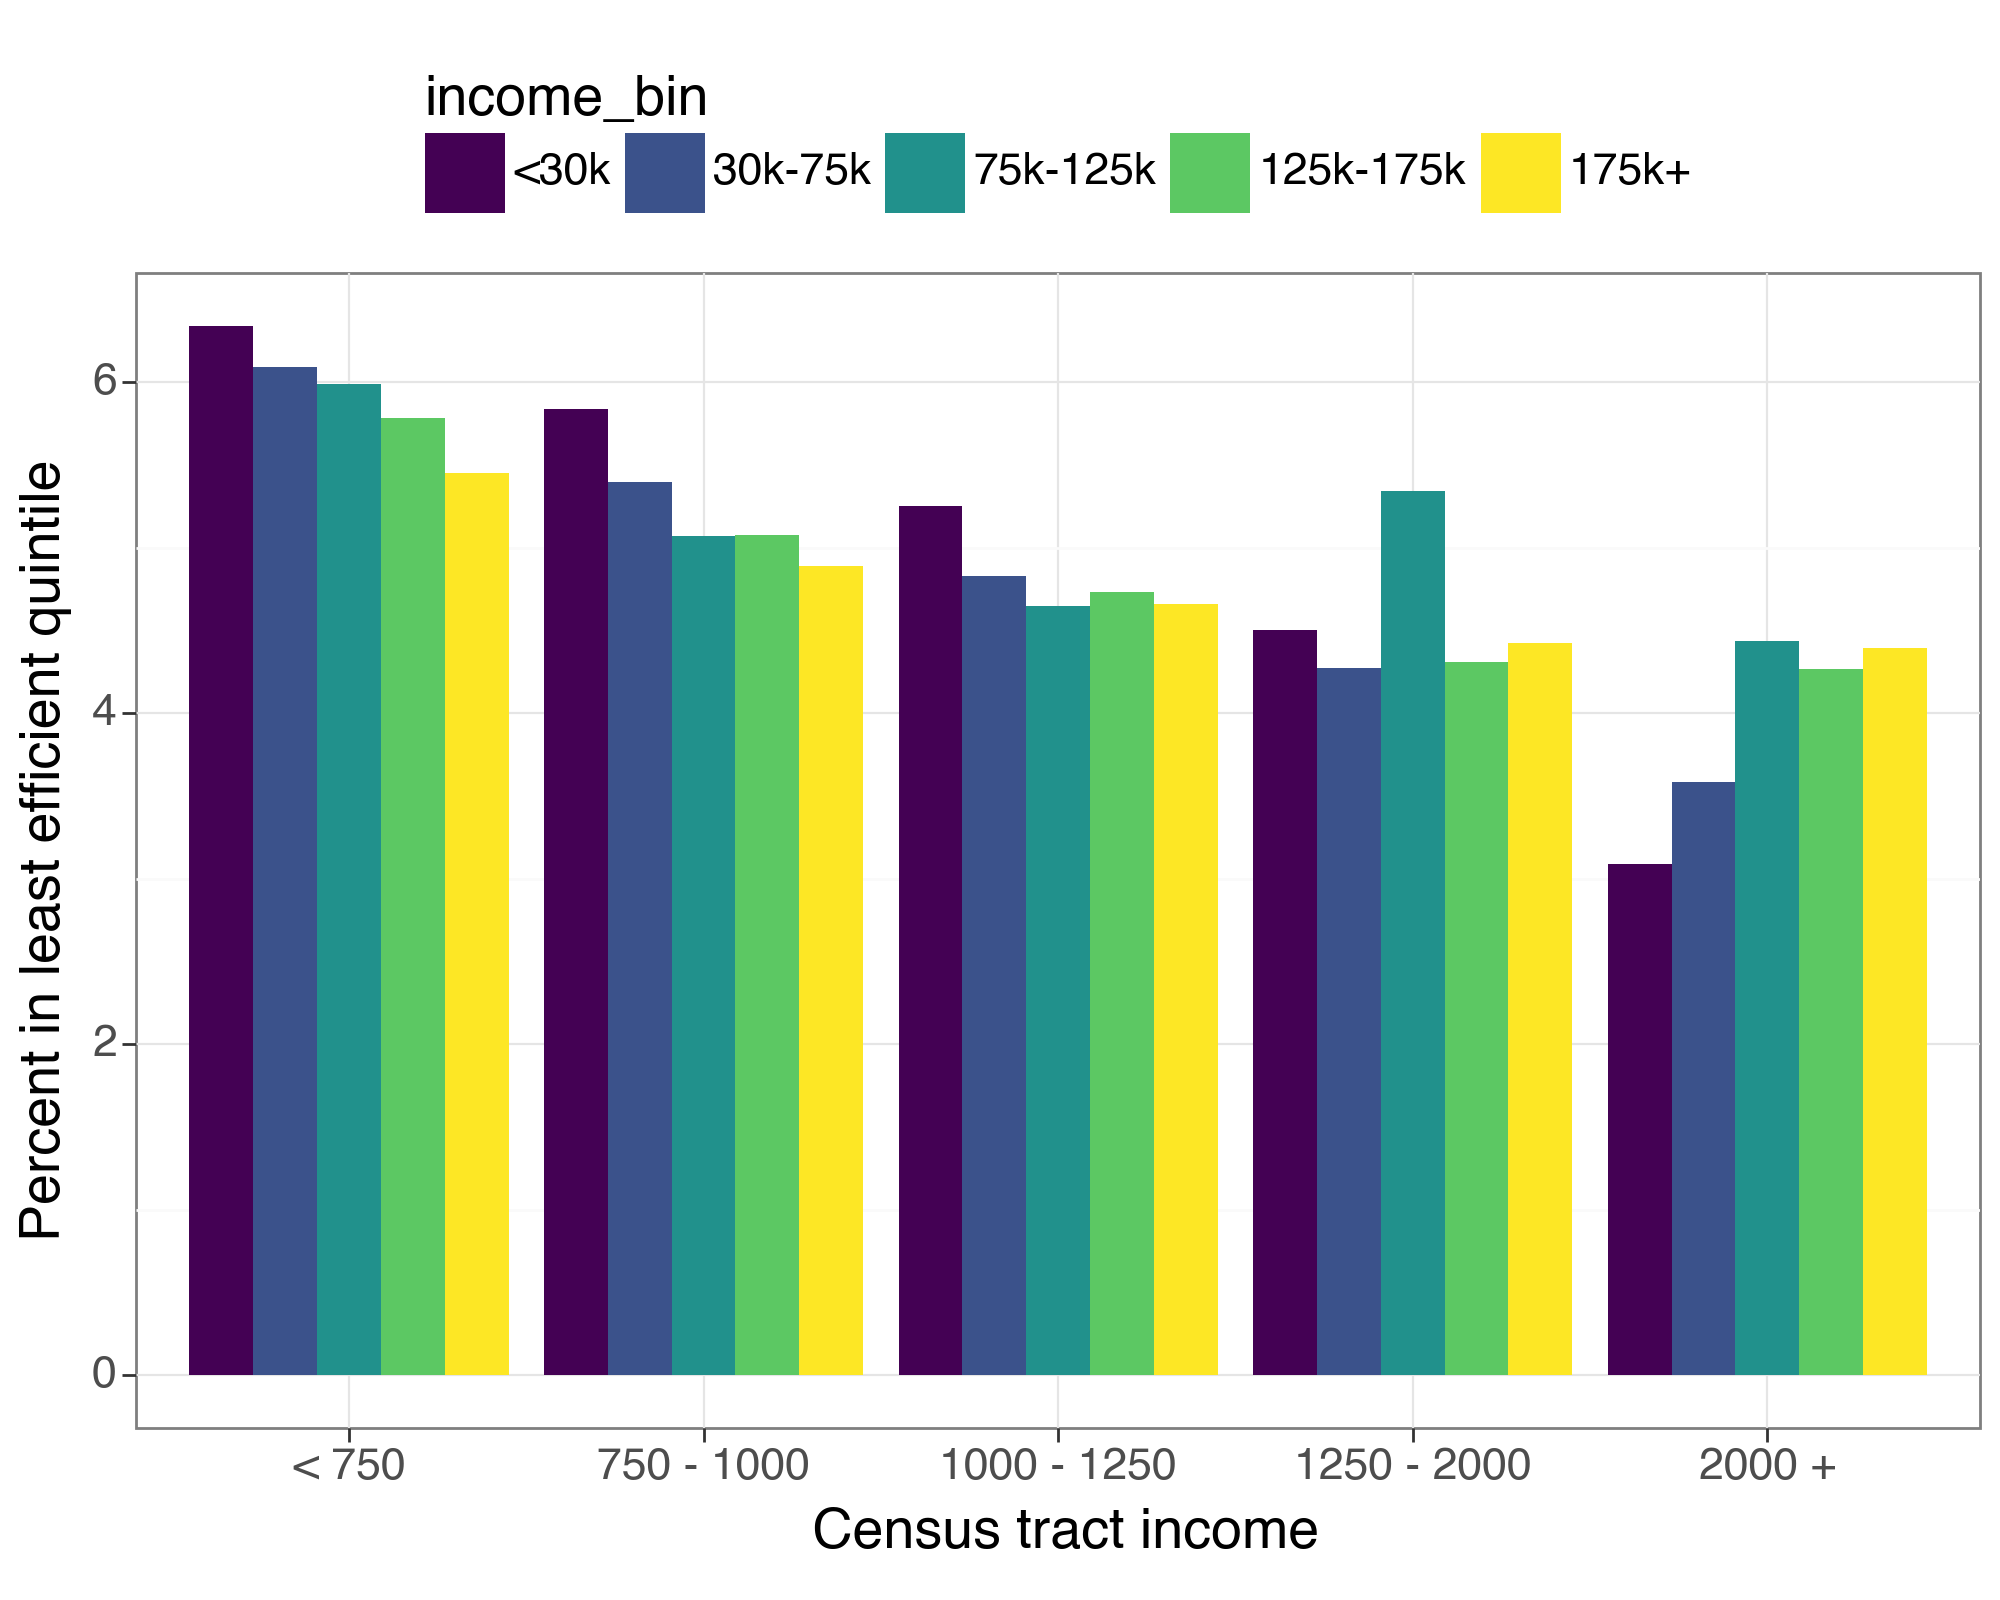

<Figure Size: (1000 x 800)>

In [30]:
(ggplot(ghg.groupby(["income_bin", "apt_size_cat"])["co2_intensity"].mean().reset_index(), aes(x = "apt_size_cat", y = "co2_intensity", fill = "income_bin")) +
 geom_bar(stat = "identity", position = "dodge") + 
 labs(y = "Percent in least efficient quintile", x = " Census tract income") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/3081271545.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


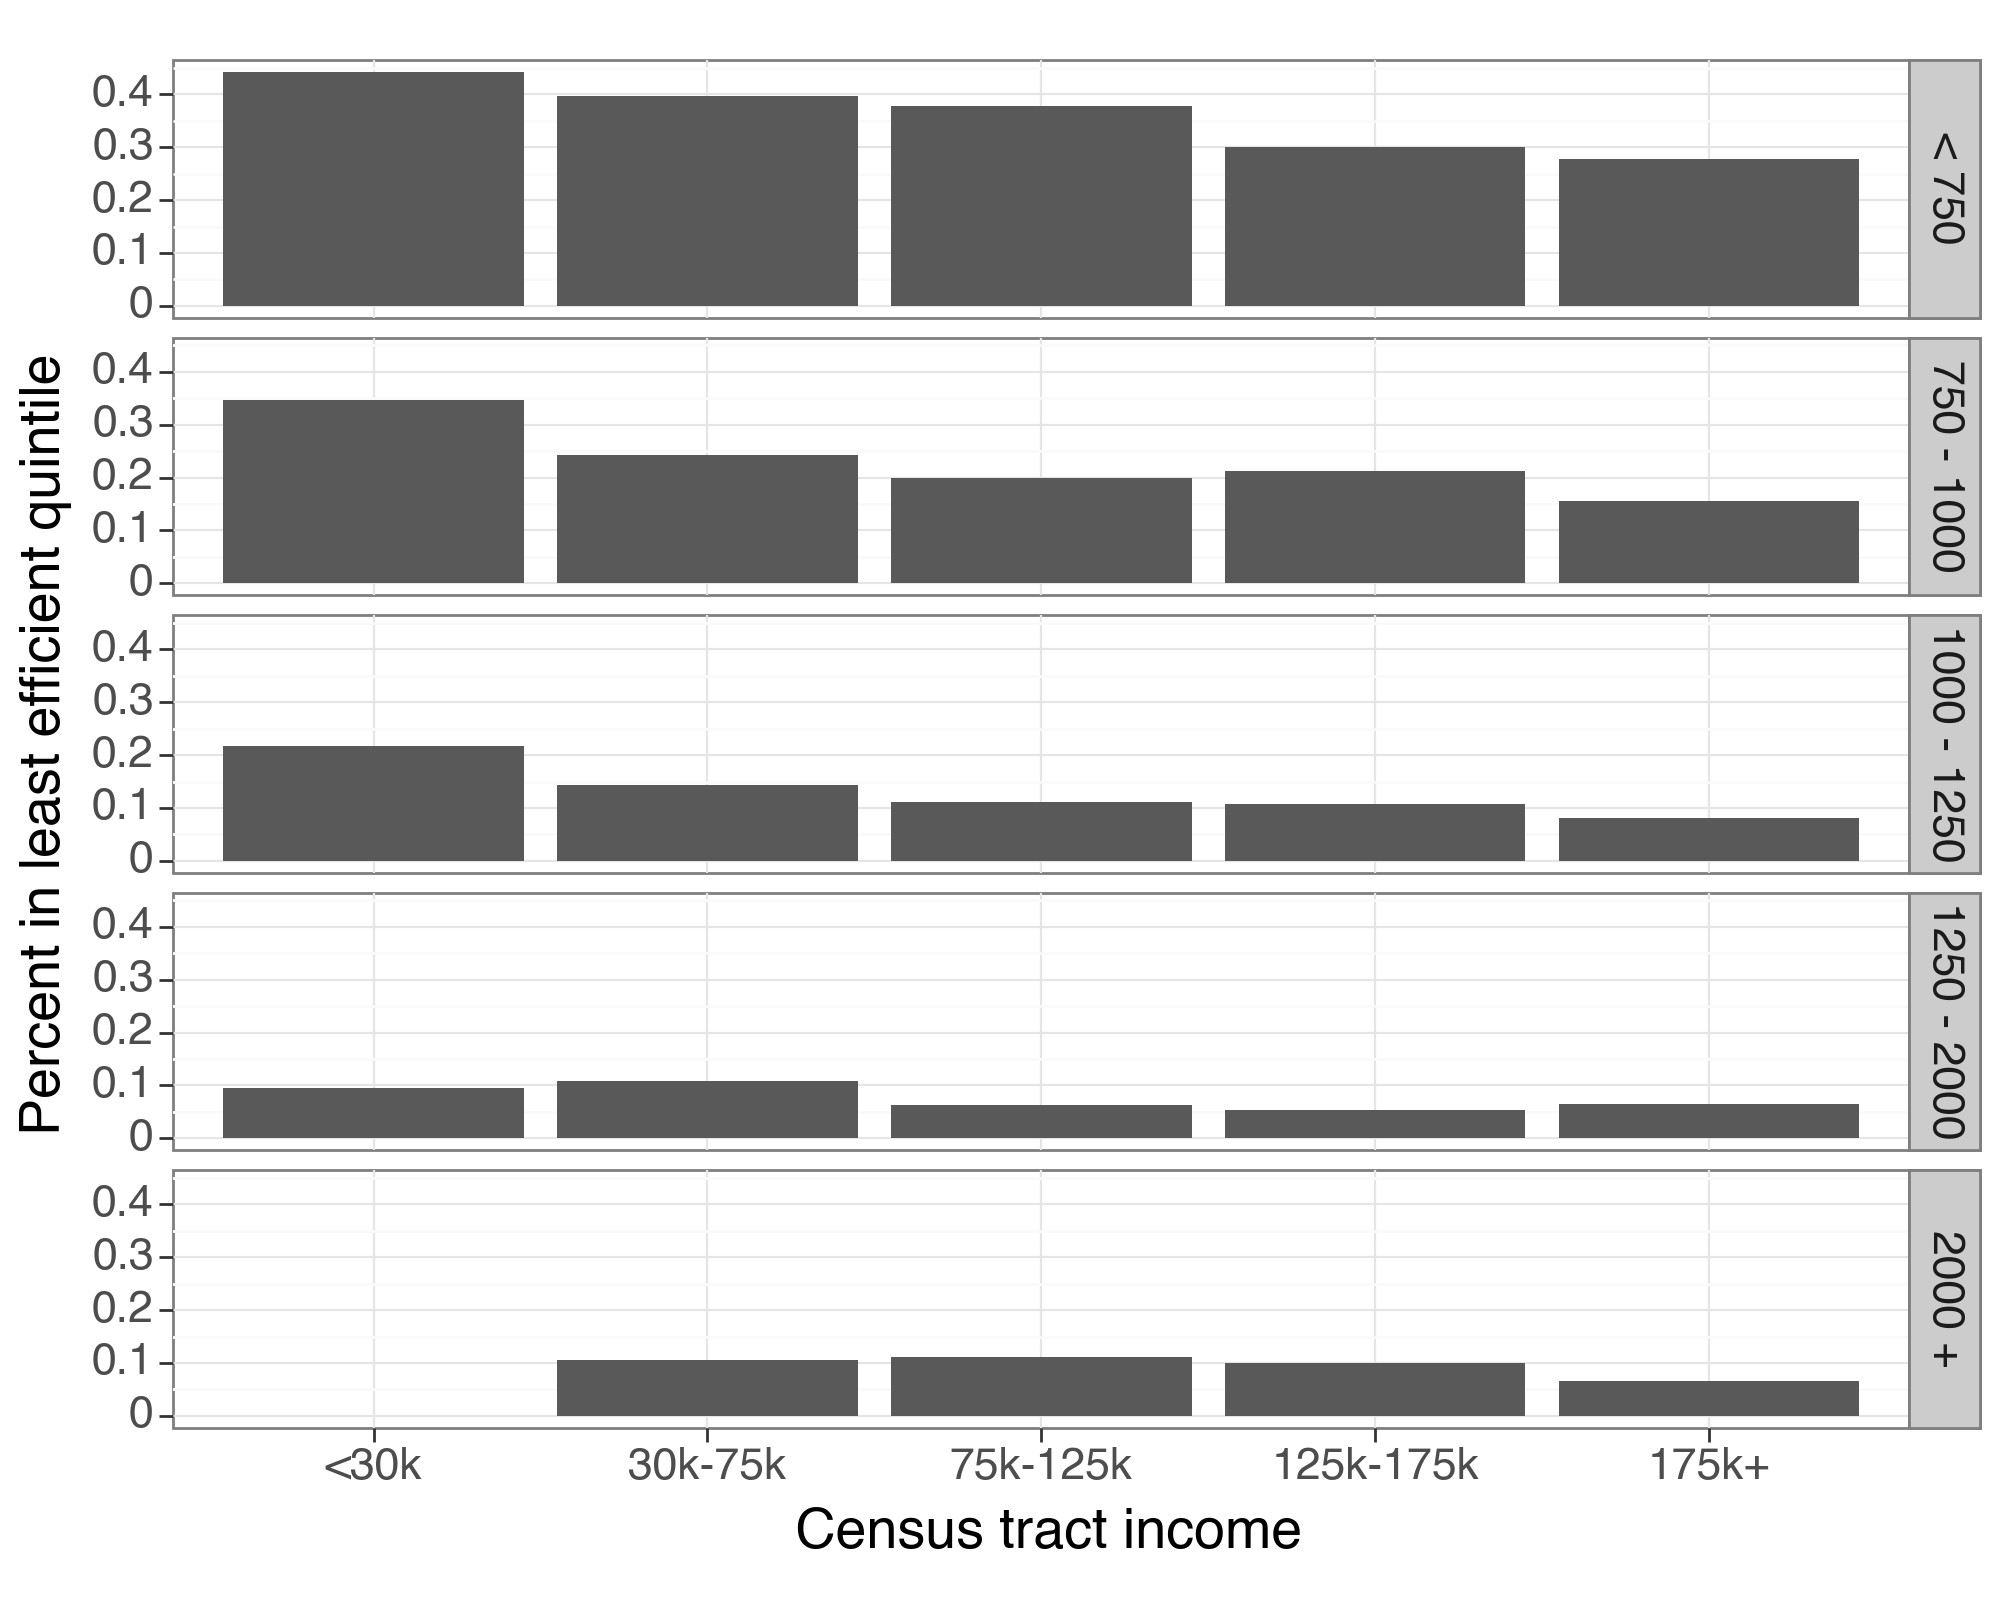

<Figure Size: (1000 x 800)>

In [31]:
(ggplot(ghg.groupby(["income_bin", 'apt_size_cat'])["bottom_quint"].mean().reset_index(), aes(x = "income_bin", y = "bottom_quint")) + geom_bar(stat = "identity") + 
 labs(y = "Percent in least efficient quintile", x = " Census tract income") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top") + 
 facet_grid("apt_size_cat~"))

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/2399221458.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


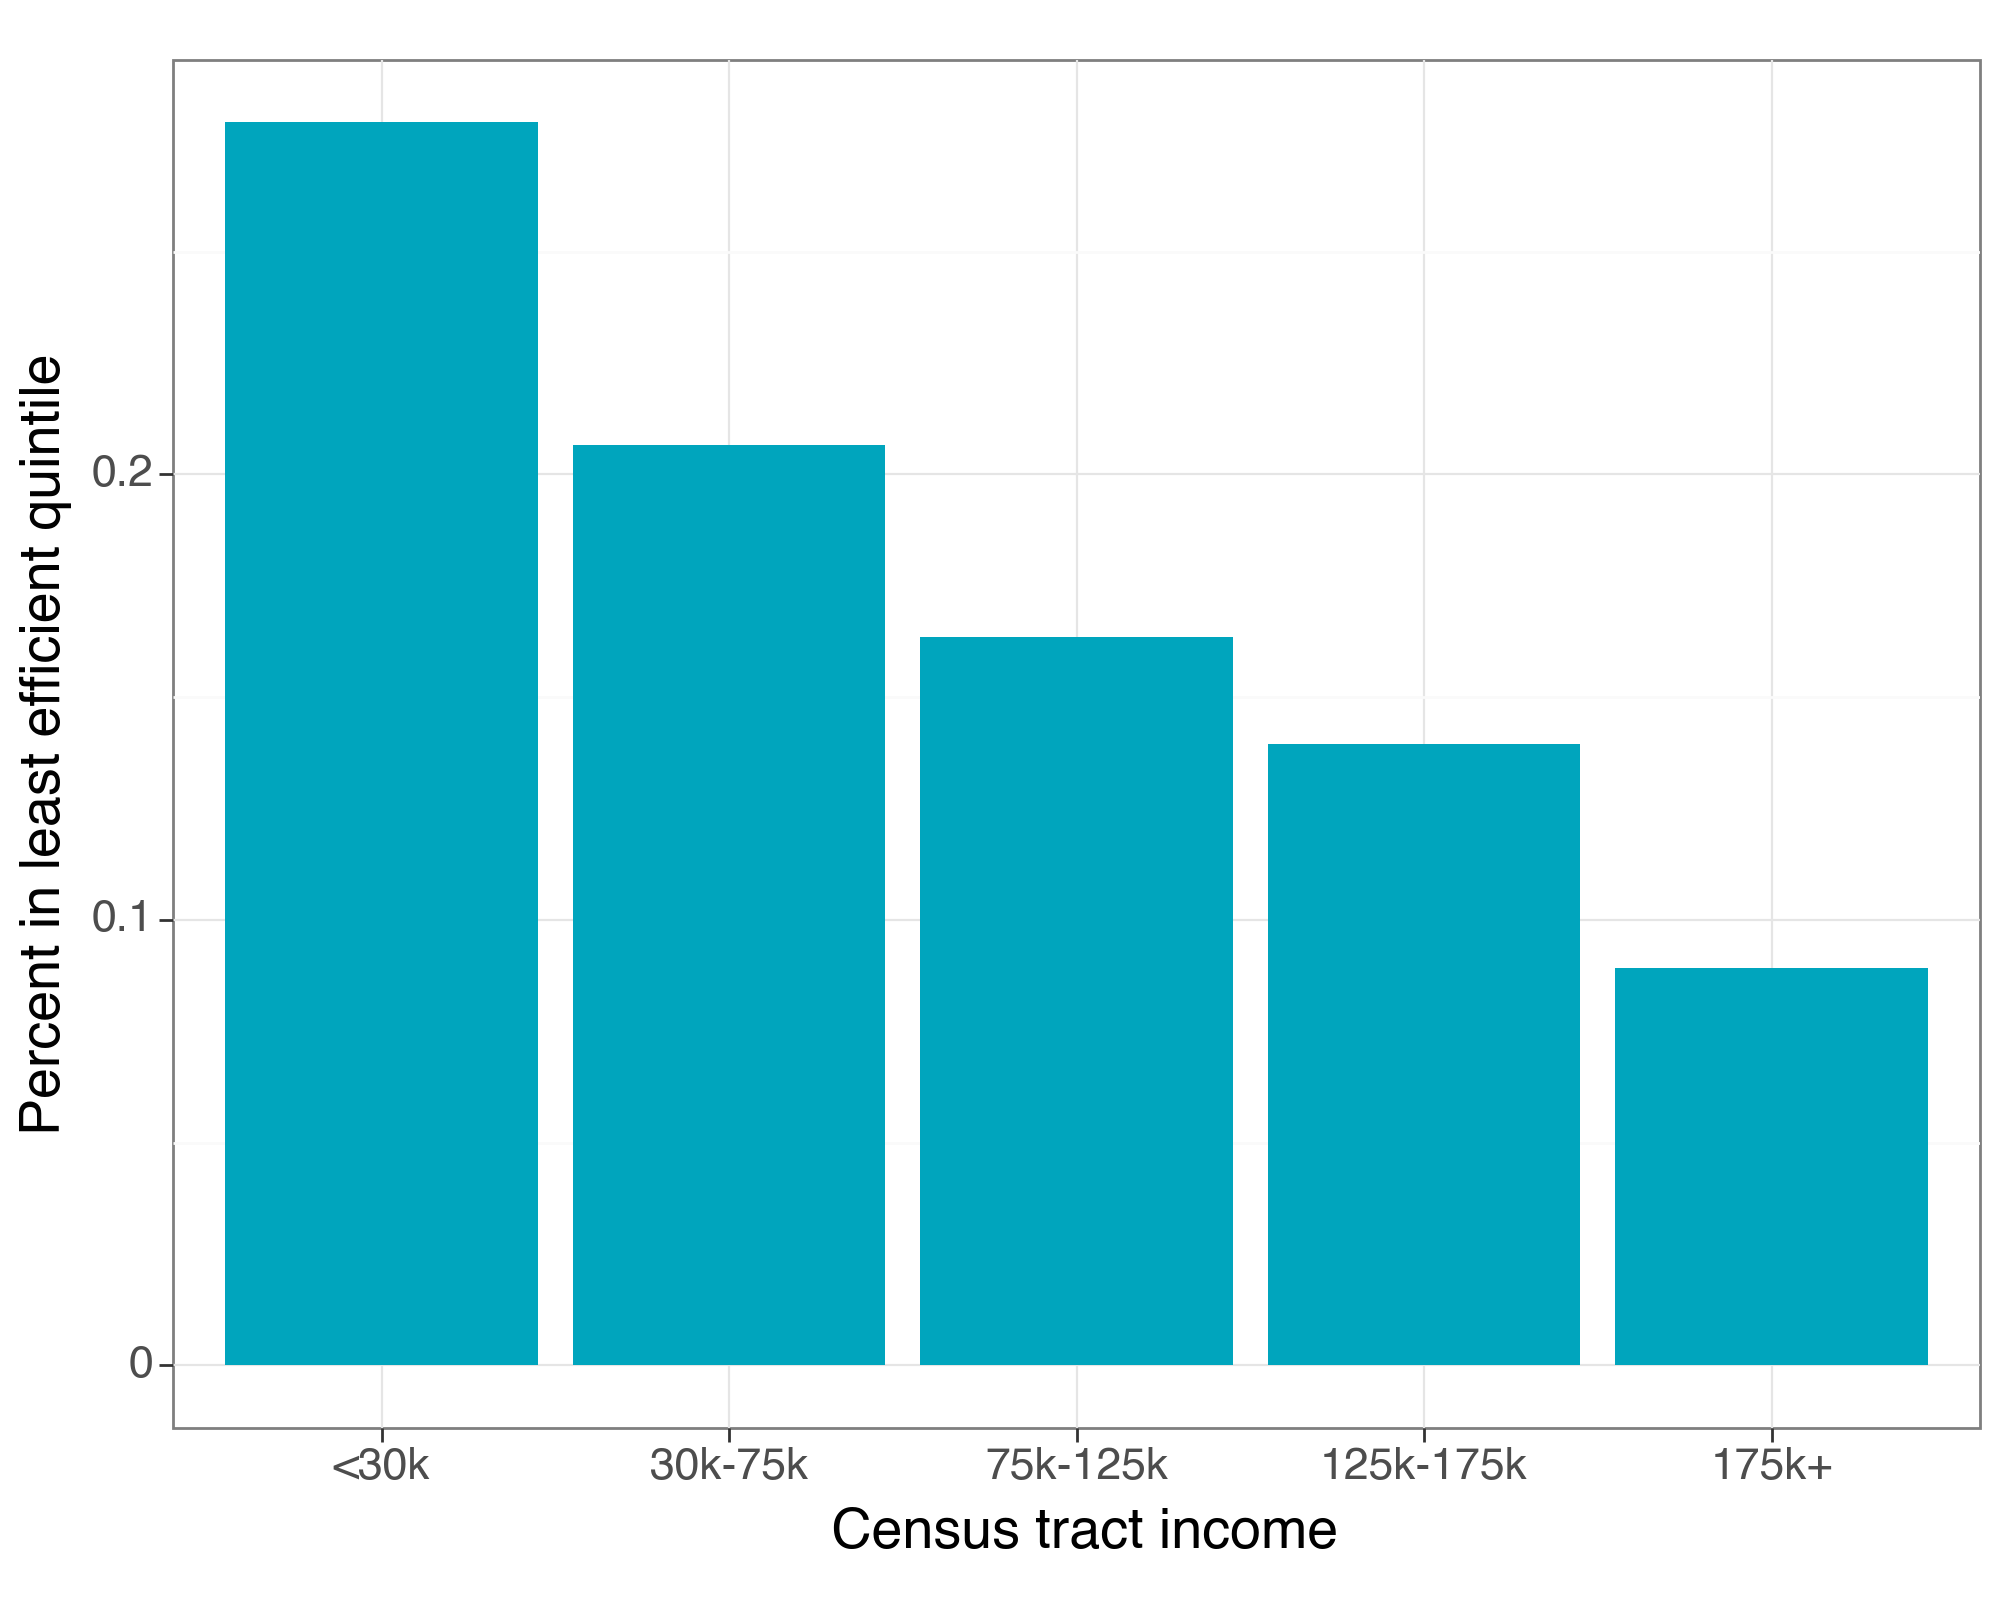

<Figure Size: (1000 x 800)>

In [32]:
(ggplot(ghg.groupby("income_bin")["bottom_quint"].mean().reset_index(), aes(x = "income_bin", y = "bottom_quint")) + geom_bar(fill = colors[0],stat = "identity") + 
 labs(y = "Percent in least efficient quintile", x = " Census tract income") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/367706869.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


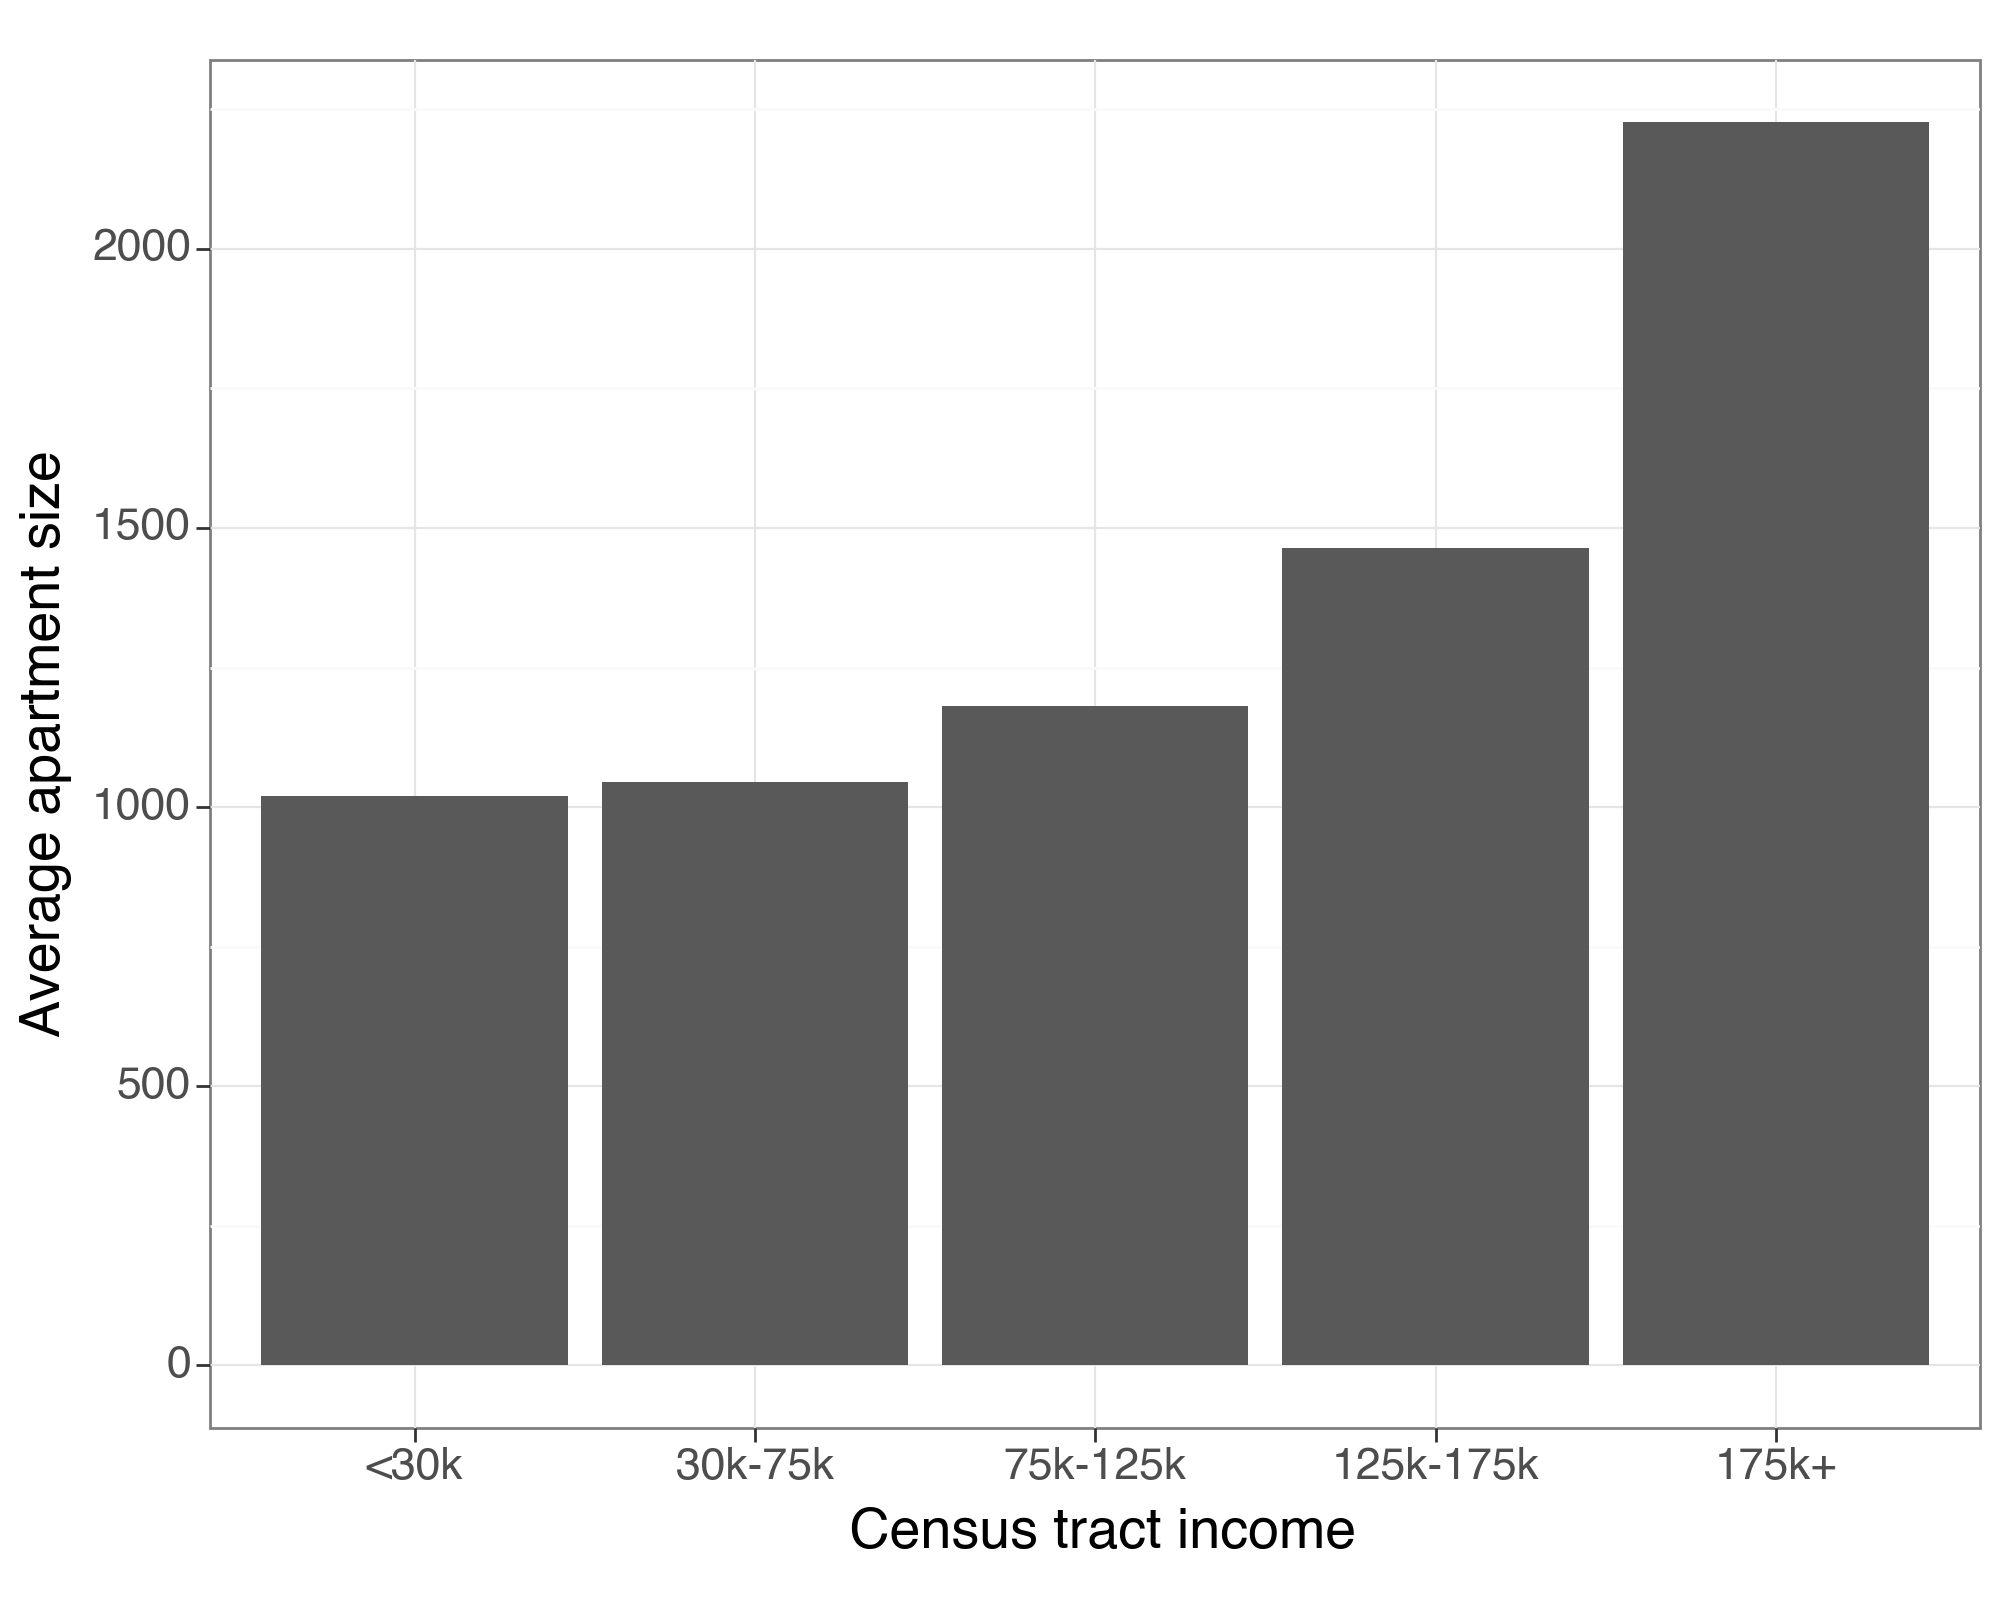

<Figure Size: (1000 x 800)>

In [33]:
(ggplot(ghg.groupby("income_bin")["avg_apt_size"].mean().reset_index(), aes(x = "income_bin", y = "avg_apt_size")) + geom_bar(stat = "identity") + 
 labs(y = "Average apartment size", x = " Census tract income") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

In [34]:
ghg

bbl                         name  property id  total_units  \
0      2042500026    1870 Pelham Parkway South      9793770         57.0   
1      2042470057     MMD: 2015 ST PAUL AVENUE      5866223         67.0   
2      2042380018        Hamdi: 3110 Wilkinson      9147200         32.0   
4      2042510041         2965 East 196 Street      6297534         52.0   
5      2042460020      2025 Continental Avenue     26085736         55.0   
...           ...                          ...          ...          ...   
17153  3084290036            Plaza Owners Inc.      3076623        127.0   
17154  3017960001  Elijah Smith Senior Citizen      4398445         91.0   
17155  4036310001             6901 62nd Street     21646051         81.0   
17156  4036280017             6930 62nd Street     21646052         56.0   
17157  3016620012              666 Hancock St.      6699459         39.0   

         eui  bedrooms  housing_fa  total_fa  co2_intensity  total_co2  \
0       58.5      74.0     52941.0   52941.0            4.1      216.1   
1       64.0      79.0     62702.0   62702.0            3.7      234.6   
2       97.2      38.0     29960.0   29960.0            7.2      216.3   
4       93.0      75.0     42000.0   42000.0            7.0      295.7   
5       67.0      81.0     57840.0   57840.0            4.0      231.3   
...      ...       ...         ...       ...            ...        ...   
17153   86.1     210.0    125852.0  133852.0            4.9      661.4   
17154   71.2      91.0     73220.0   73220.0            4.2      310.2   
17155  123.3      81.0     57716.0   57716.0            6.9      400.1   
17156  114.1      64.0     45352.0   45352.0            6.5      293.5   
17157  103.7      58.0     34010.0   34010.0            5.9      201.7   

            kwh  gallons_water   latitude  longitude  year_built  occupancy  \
0      481527.0      5965000.0  40.855488 -73.830726        1960         75   
1      199423.0      4935900.0  40.852914 -73.829023        1964        100   
2      108040.0      2953300.0  40.851651 -73.828726        1928        100   
4      157443.0      3853500.0  40.854306 -73.829290        1928        100   
5      239130.0      4193400.0  40.852646 -73.829905        1963        100   
...         ...            ...        ...        ...         ...        ...   
17153  457625.9      3768700.0  40.618981 -73.908752        1965        100   
17154  310658.0      3922000.0  40.689980 -73.942323        1997        100   
17155  206795.0      5709100.0  40.703934 -73.894693        1928        100   
17156  173534.0      4453100.0  40.703571 -73.894563        1929        100   
17157  134338.0            NaN  40.685004 -73.928500        1930        100   

       unit_laundry_hookups  common_laundry_hookups  direct_emissions  \
0                       NaN                     NaN              77.2   
1                       6.0                     0.0             177.1   
2                       NaN                     NaN             185.1   
4                       NaN                     NaN             250.3   
5                       NaN                     NaN             162.4   
...                     ...                     ...               ...   
17153                   0.0                     0.0             529.4   
17154                   0.0                     4.0             220.6   
17155                   0.0                     0.0             340.5   
17156                   0.0                     0.0             243.5   
17157                   0.0                     0.0             162.9   

       indirect_emissions     total_e  kwh_per_sqft  avg_apt_size  \
0                   138.9   3097048.5      9.095540    928.789474   
1                    57.5   4012928.0      3.180489    935.850746   
2                    31.2   2912112.0      3.606142    936.250000   
4                    45.4   3906000.0      3.748643    807.692308   
5                    69.0   3875280.0    

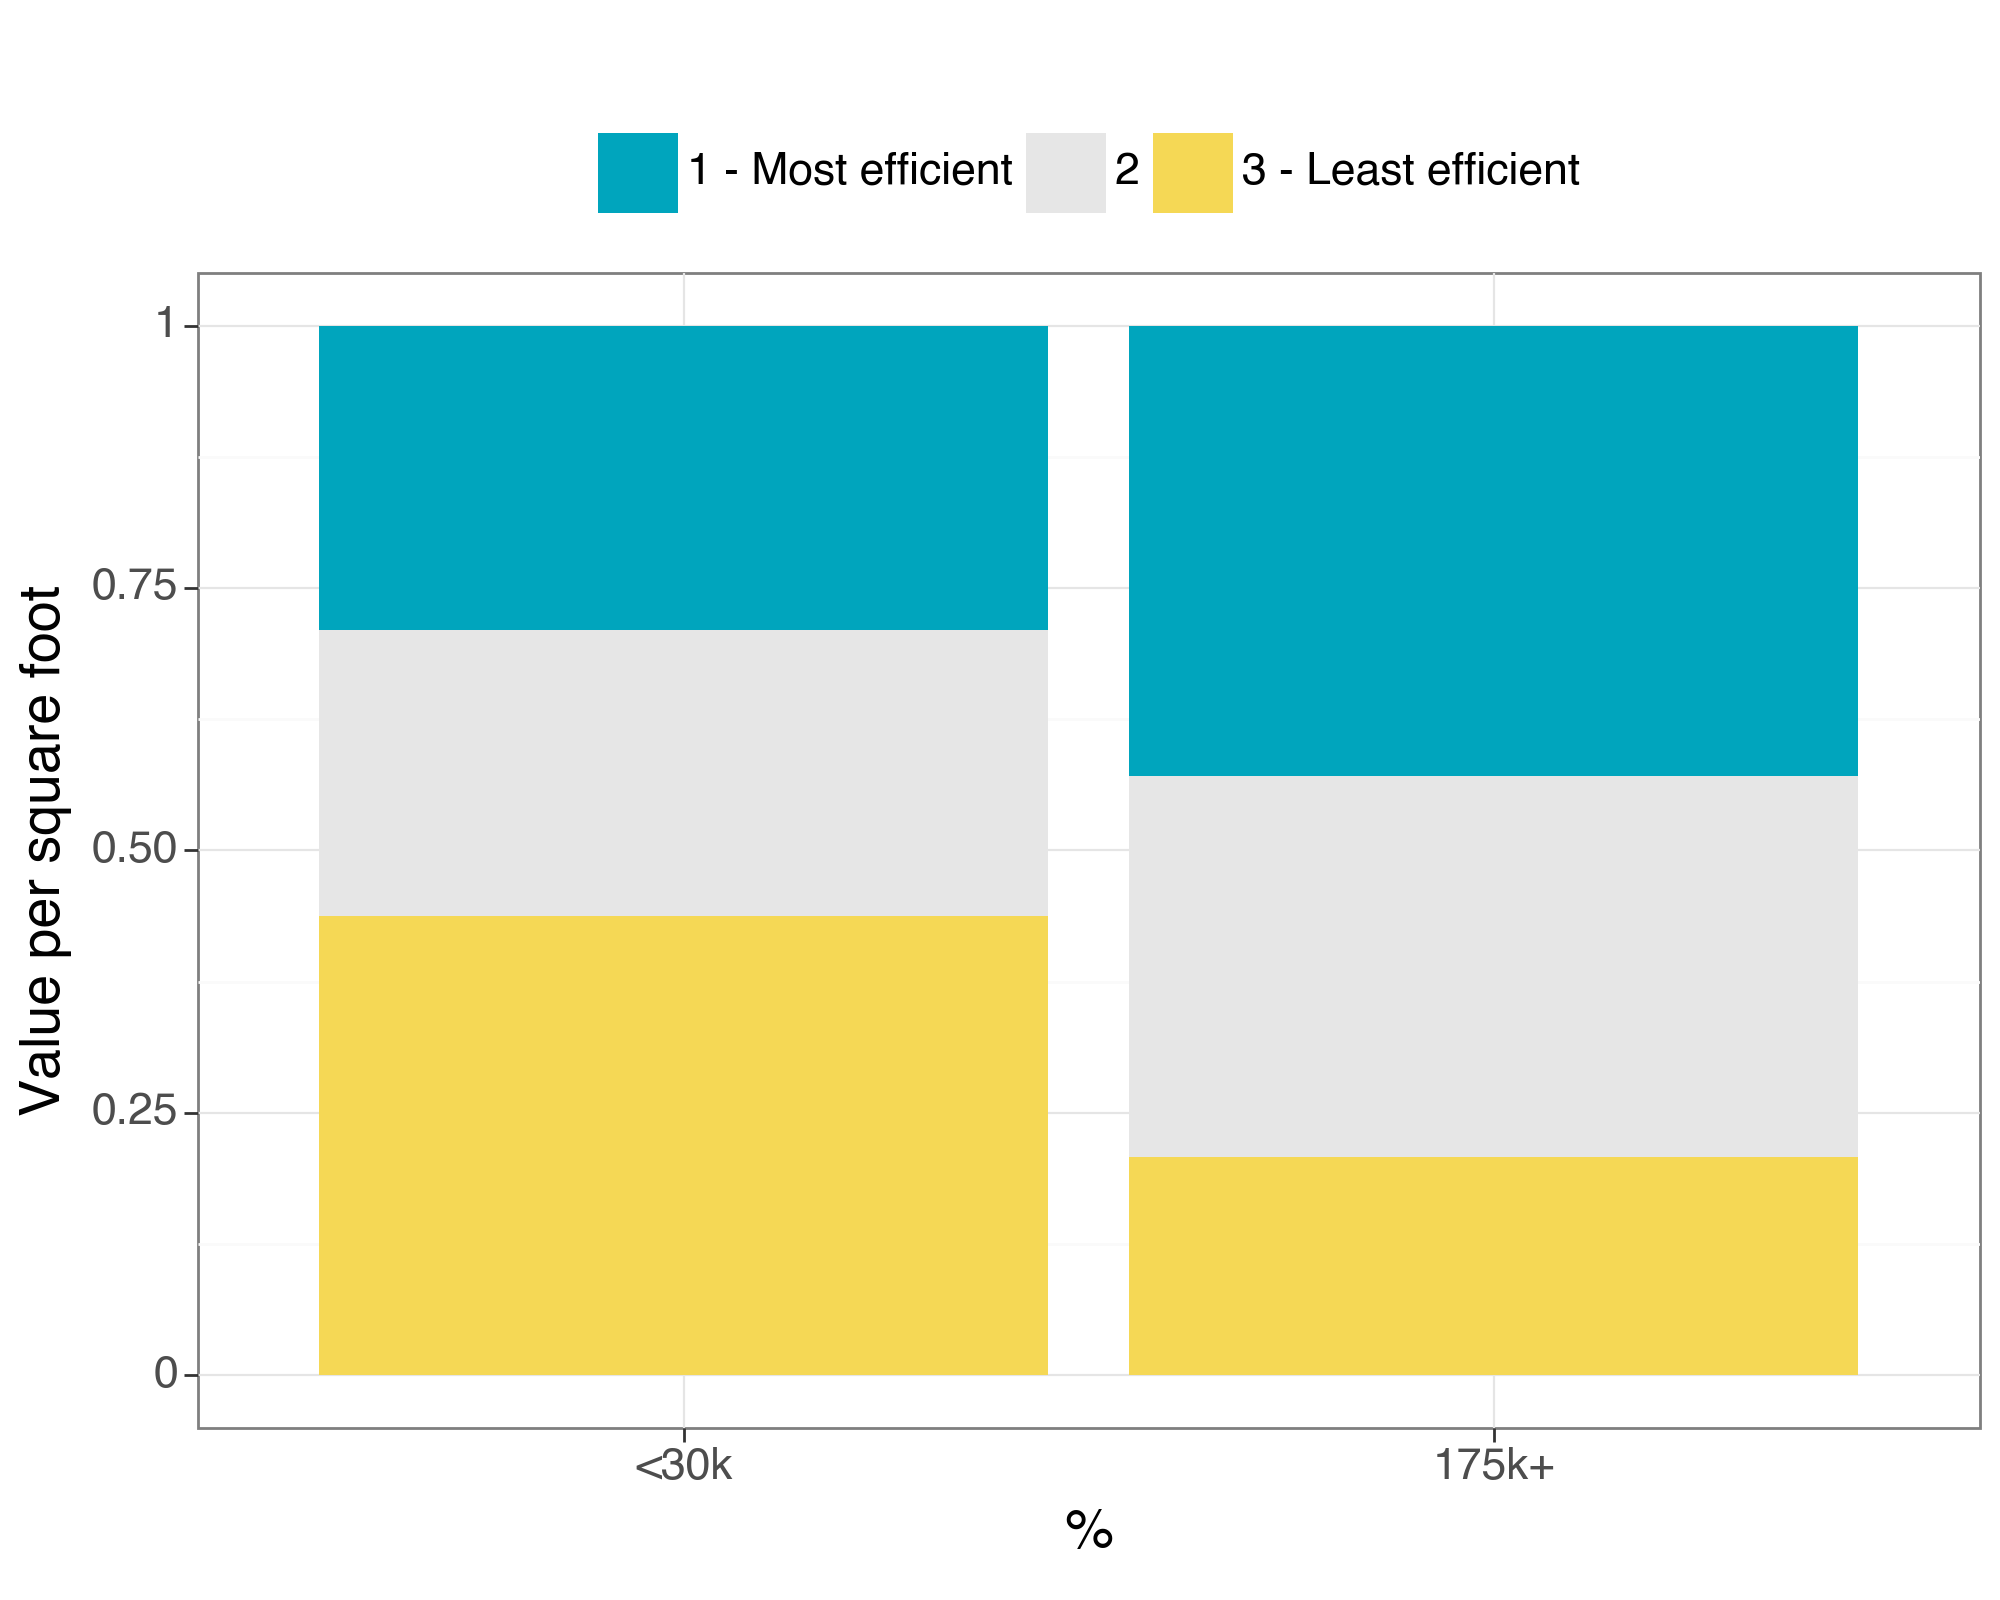

<Figure Size: (1000 x 800)>

In [35]:
(ggplot(ghg.query("income_bin.isin(['<30k', '175k+'])"), aes(x = "income_bin", fill = "efficiency_tertile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3 - Least efficient"]) +
 labs(y = "Value per square foot", x = "%") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/1825568153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


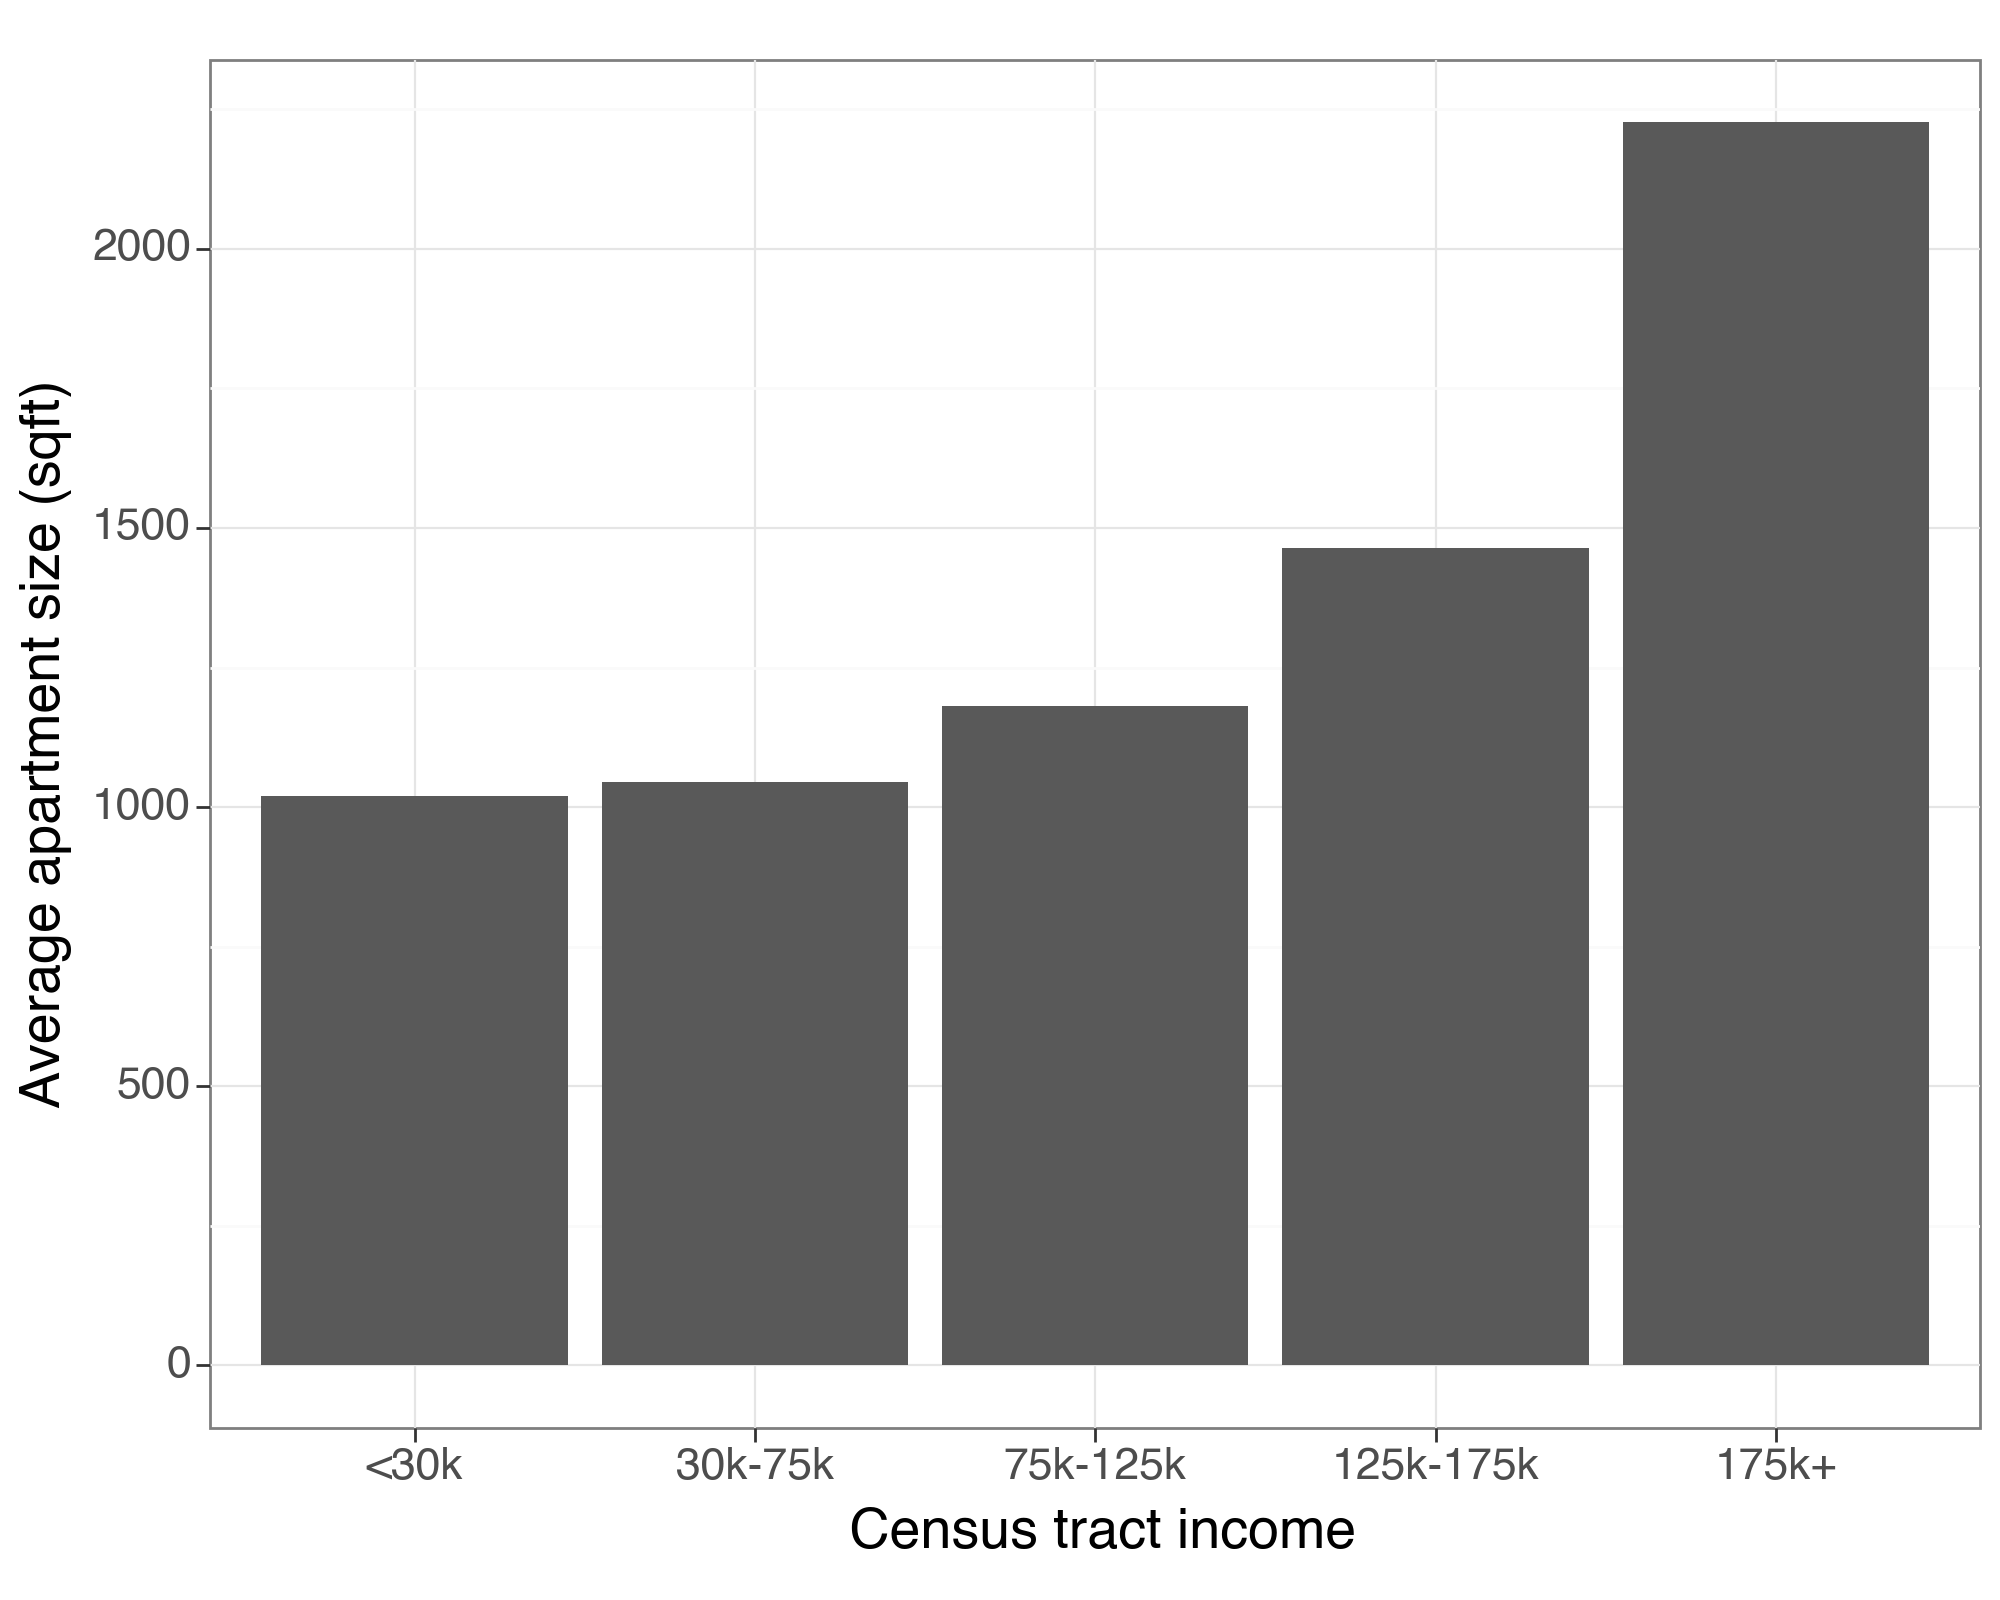

<Figure Size: (1000 x 800)>

In [36]:
(ggplot(ghg.groupby("income_bin")["avg_apt_size"].mean().reset_index(), aes(x = "income_bin", y = "avg_apt_size")) + geom_bar(stat = "identity") + 
 labs(y = "Average apartment size (sqft)", x = " Census tract income") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

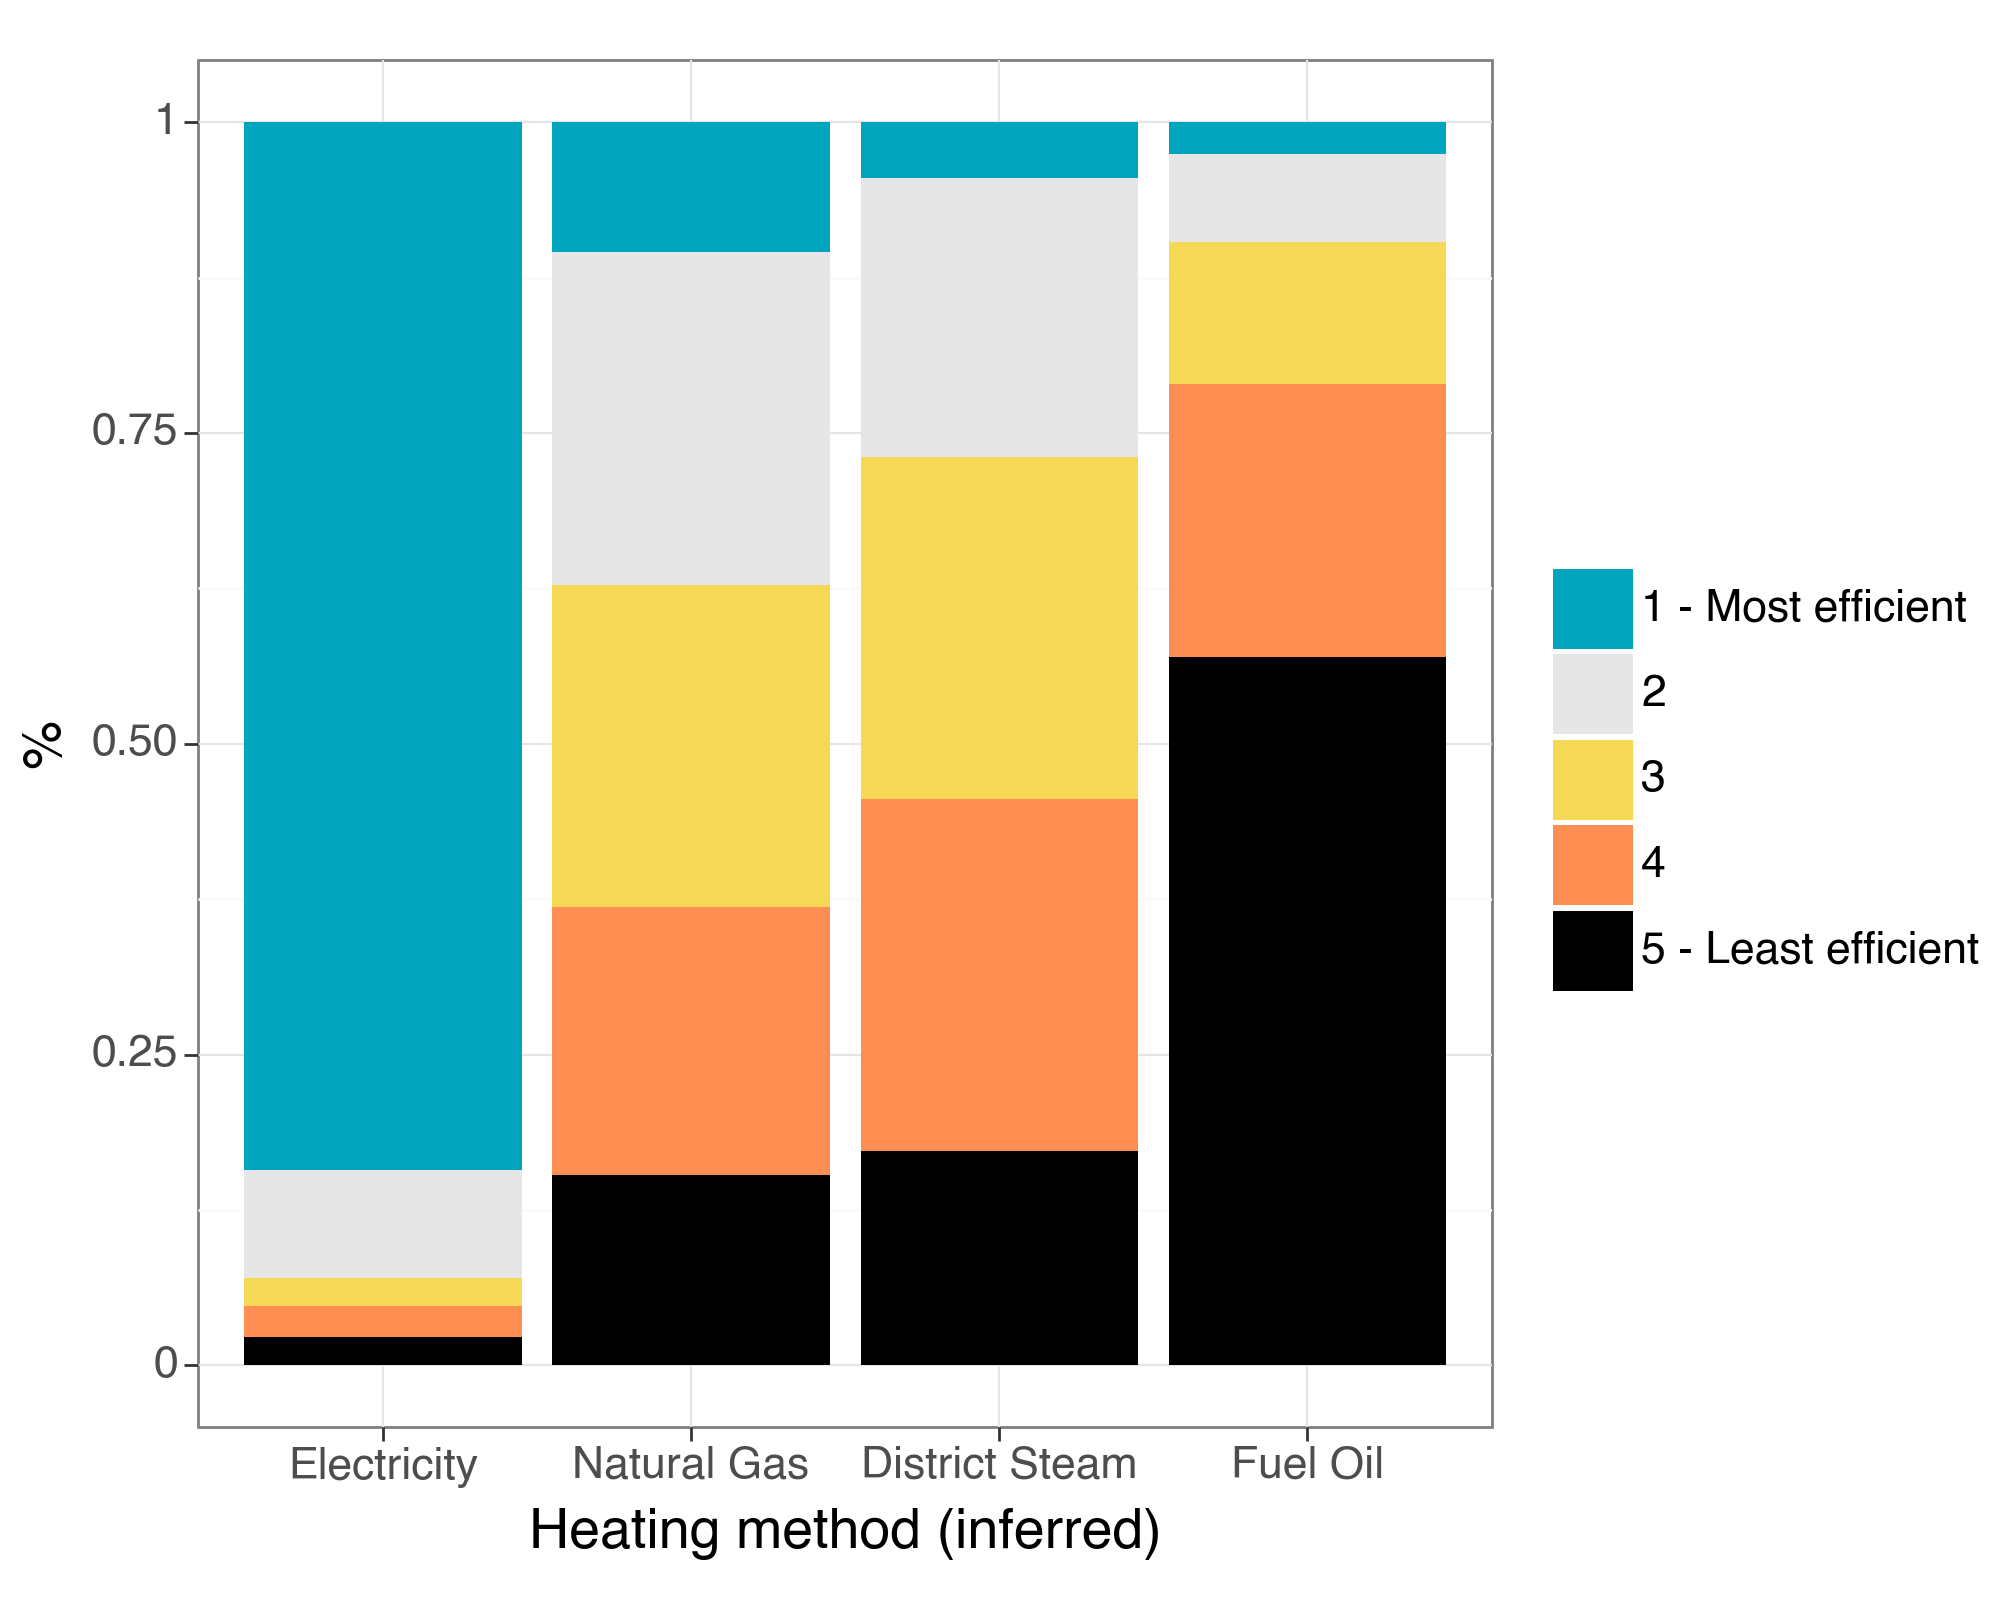

<Figure Size: (1000 x 800)>

In [37]:
(ggplot(ghg.query("inferred_heating_method != 'Unknown'"), aes(x = "inferred_heating_method", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(y = "%", x = "Heating method (inferred)") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8)))

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 4165 rows containing non-finite values.


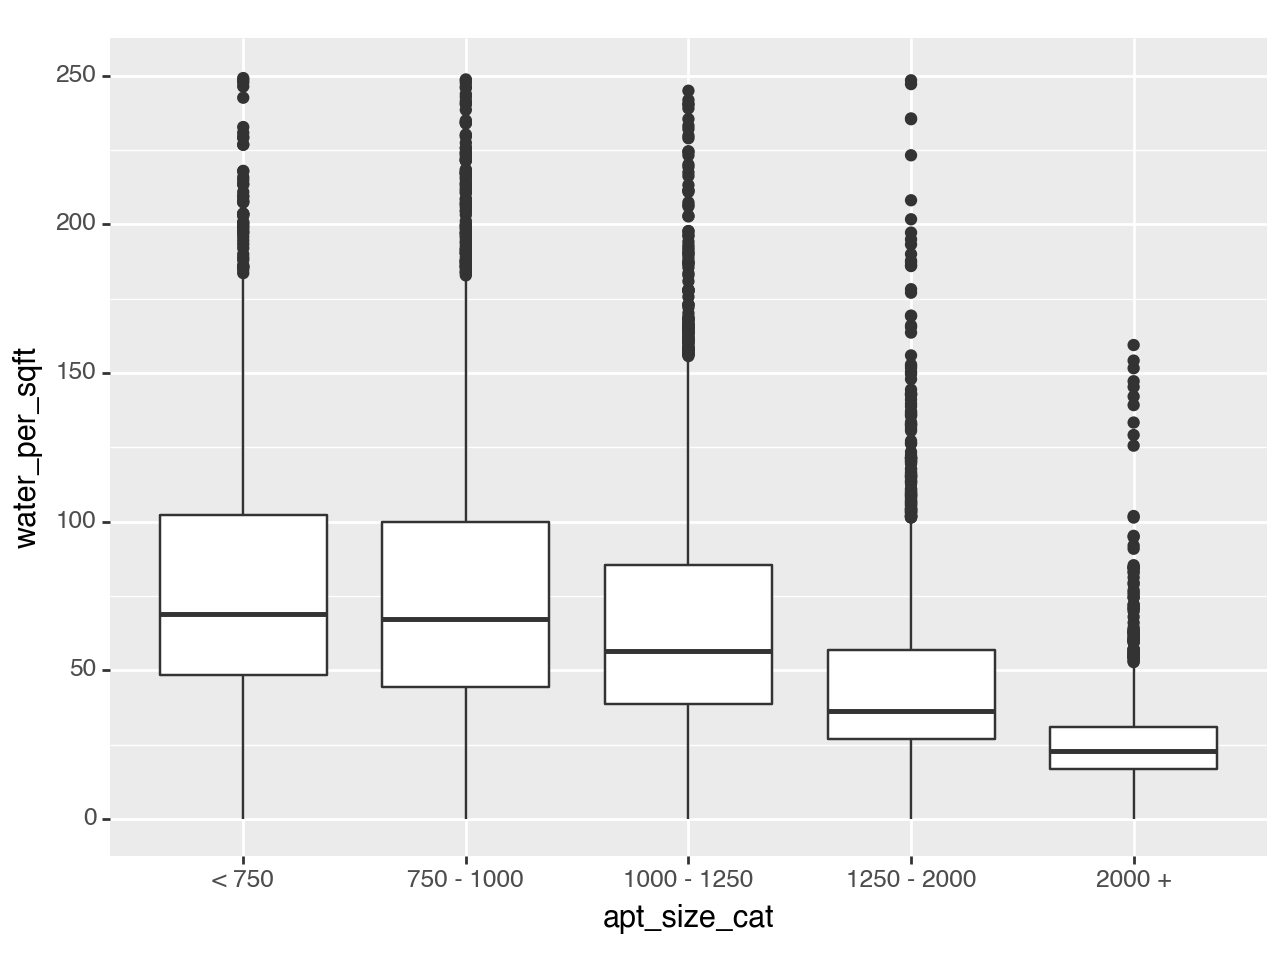

<Figure Size: (640 x 480)>

In [38]:
ggplot(ghg, aes(x = "apt_size_cat", y = "water_per_sqft")) + geom_boxplot() + ylim(0, 250)

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 2932 rows containing non-finite values.


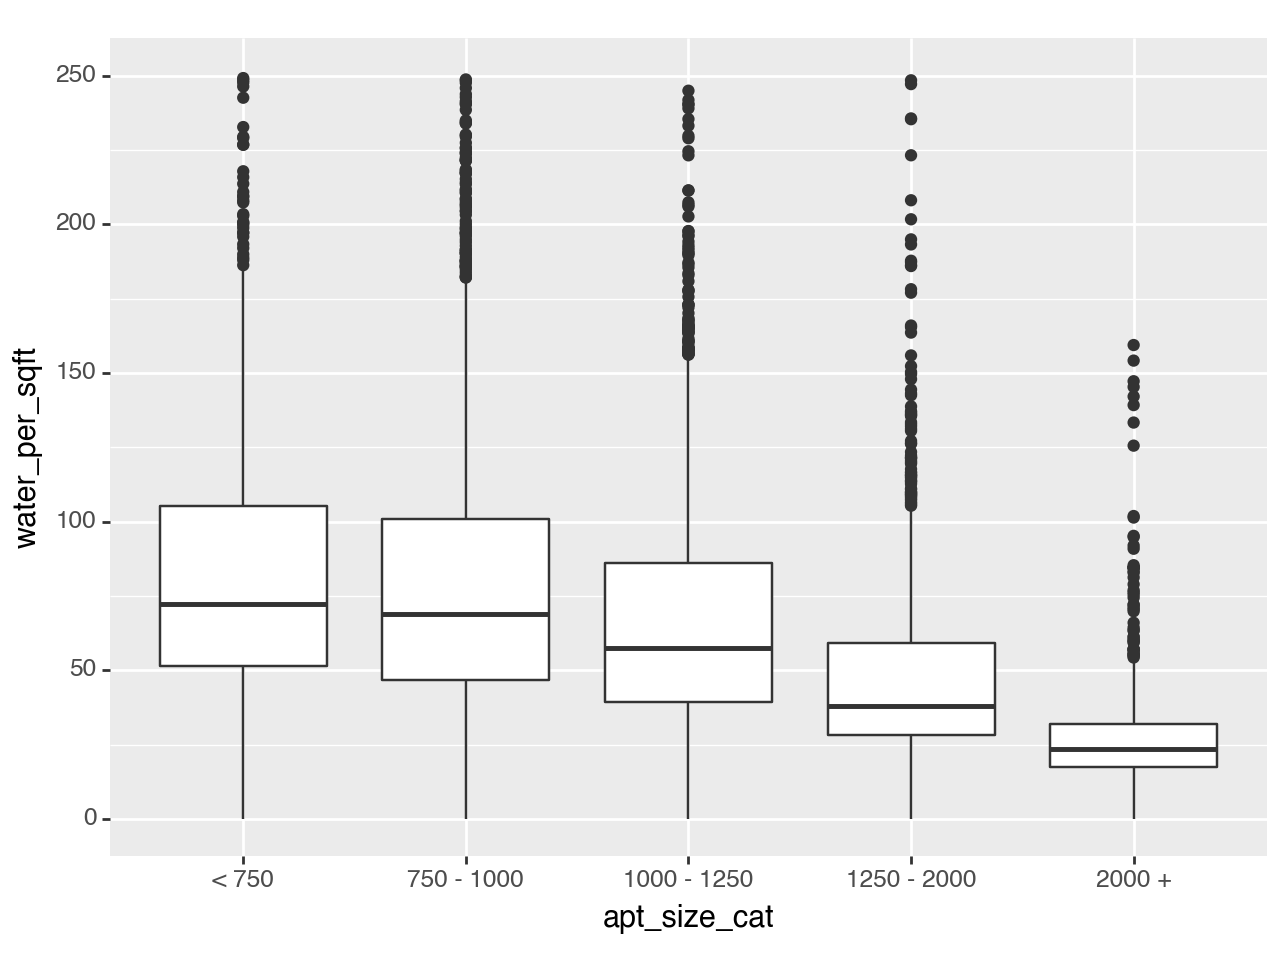

<Figure Size: (640 x 480)>

In [39]:
ggplot(gas, aes(x = "apt_size_cat", y = "water_per_sqft")) + geom_boxplot() + ylim(0, 250)

In [40]:
monthly_data = pd.read_csv("https://data.cityofnewyork.us/api/views/in83-58q5/rows.csv?accessType=DOWNLOAD") 
monthly_data.columns = monthly_data.columns.str.lower().str.replace(' ', '_')
monthly_data = monthly_data[["property_id", "month", "electricity_use__(kbtu)",	"natural_gas_use__(kbtu)"]]

In [41]:
monthly_data["electricity_use__(kbtu)"] = pd.to_numeric(monthly_data["electricity_use__(kbtu)"], errors="coerce")
monthly_data["natural_gas_use__(kbtu)"] = pd.to_numeric(monthly_data["natural_gas_use__(kbtu)"], errors="coerce")
monthly_data["electricity_emissions"] = monthly_data["electricity_use__(kbtu)"]  * 0.293071 * 0.000288962
monthly_data["natural_gas_emissions"] = monthly_data["natural_gas_use__(kbtu)"]  * 0.00005311 


monthly_data = monthly_data.dropna()
monthly_data['month'] = pd.to_datetime(monthly_data['month'], format='%b-%y')

In [42]:
monthly_ghg = ghg[["property id", "name", "inferred_heating_method", "apt_size_cat", "apt_size_cat2", "total_fa", "laundry_cat", "unit_laundry_hookups", "common_laundry_hookups"]].merge(monthly_data, left_on = "property id", right_on = "property_id")

In [43]:
monthly_ghg["season"] = monthly_ghg.month.apply(get_season)

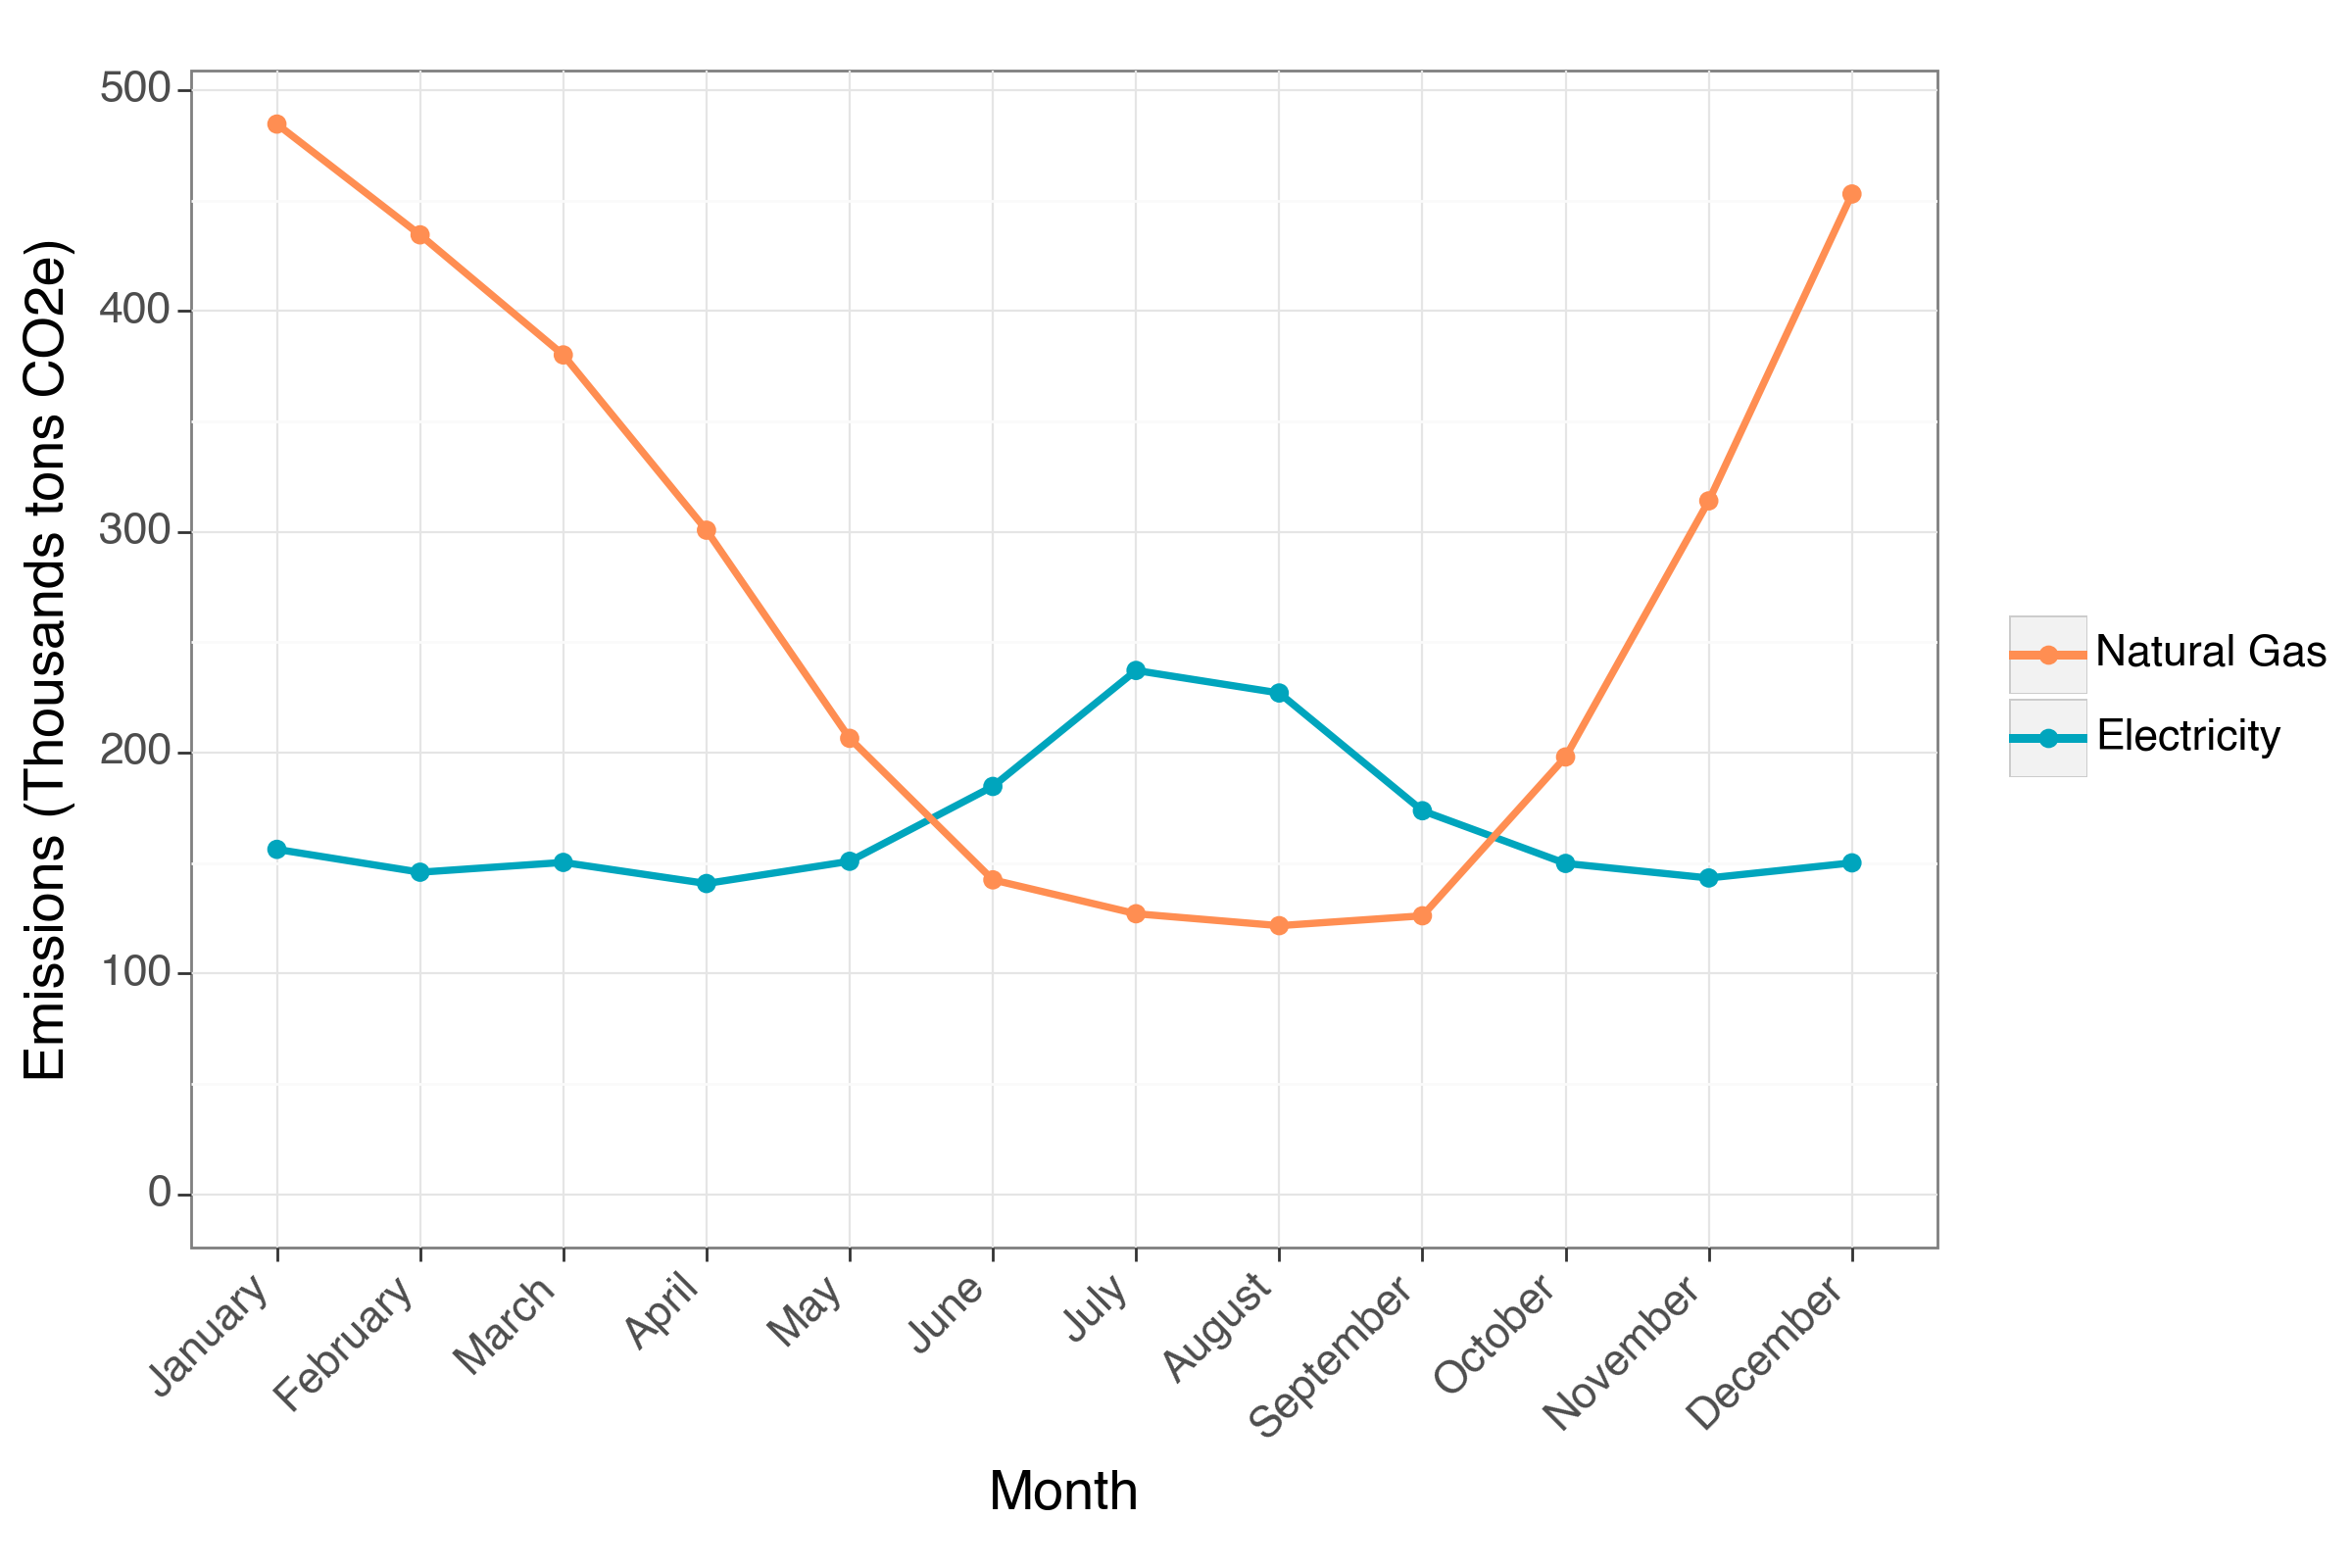

<Figure Size: (1200 x 800)>

In [44]:
plot_dat = monthly_ghg.groupby("month")[["electricity_emissions", "natural_gas_emissions"]].sum().reset_index().melt("month")
plot_dat["value"] = plot_dat["value"] / 1000

plot_dat['month_name'] = plot_dat['month'].dt.month_name()
plot_dat['month_name'] = pd.Categorical(plot_dat['month_name'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True)


(ggplot(plot_dat, aes(x = "month_name", y = "value", color = "variable", group = "variable")) + 
 geom_point(size = 3) + 
 geom_line(size = 1.5) + 
 labs(x = "Month", y = "Emissions (Thousands tons CO2e)") +
 ylim(0, max(plot_dat.value)) +
 theme_bw(base_size= 20) +
 scale_color_manual(name = " ", values = [colors[0], colors[3]], labels = ["Electricity", "Natural Gas"]) +
 theme(figure_size=(12,8))  +
 theme(axis_text_x=element_text(rotation=45, hjust=1)) +
 guides(color=guide_legend(reverse=True))
)

In [101]:
monthly_ghg["elec_sqft"] = monthly_ghg["electricity_emissions"] / monthly_ghg["total_fa"]
monthly_ghg["gas_sqft"] = monthly_ghg["natural_gas_emissions"] / monthly_ghg["total_fa"]

In [102]:
small_gas_values = monthly_ghg.query("apt_size_cat == '< 750' & inferred_heating_method == 'Natural Gas'").groupby("season")["gas_sqft"].median().reset_index().rename({"gas_sqft" : "small_gas_avg"}, axis = 1)

In [103]:
small_gas_values

season  small_gas_avg
0    Fall       0.000231
1  Spring       0.000360
2  Summer       0.000131
3  Winter       0.000593

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/4104048501.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


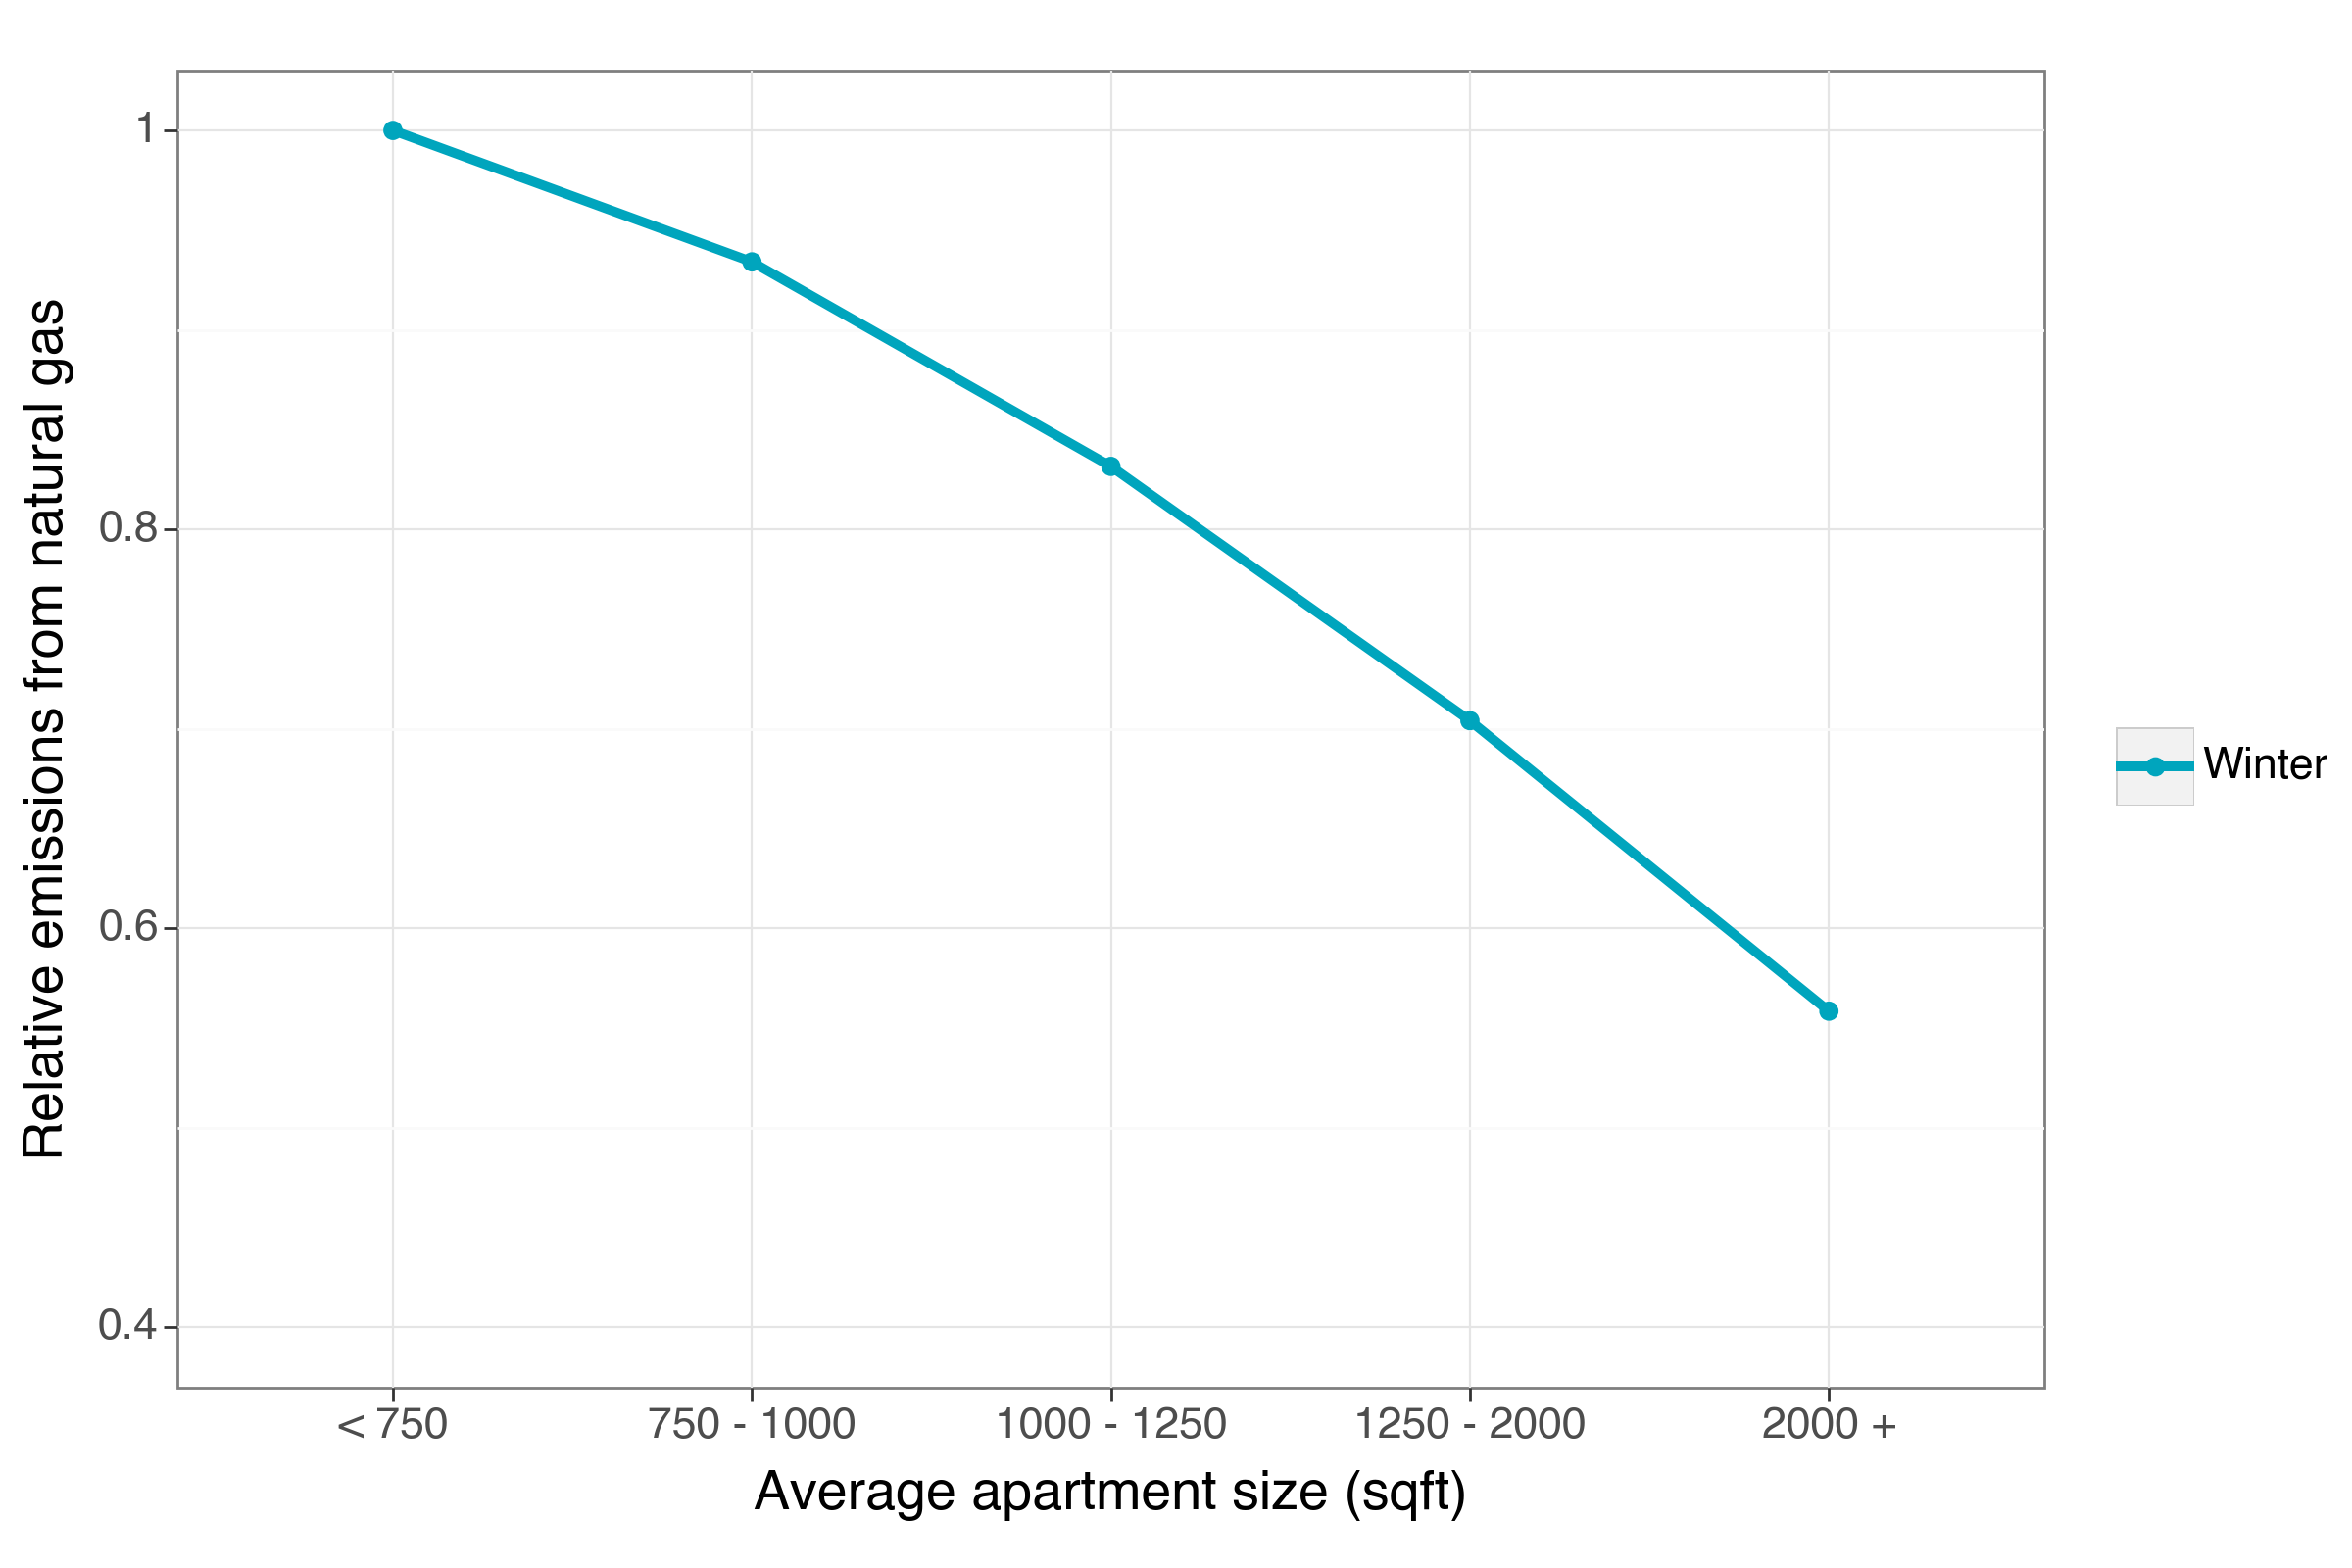

<Figure Size: (1200 x 800)>

In [104]:
plot_dat = monthly_ghg.query("inferred_heating_method == 'Natural Gas'").groupby(["apt_size_cat", "season"])["gas_sqft"].median().reset_index().merge(small_gas_values)
plot_dat["gas_ratio"] = plot_dat["gas_sqft"] / plot_dat["small_gas_avg"]
plot_dat["gas_ratio2"] =  plot_dat["small_gas_avg"] /plot_dat["gas_sqft"]

(ggplot(plot_dat.query("season.isin(['Winter'])"), aes(x = "apt_size_cat", y = "gas_ratio", color = "season", group = "season")) + 
 geom_line(size = 2) + 
 geom_point(size = 3) + 
 labs(y = "Relative emissions from natural gas", x = "Average apartment size (sqft)") + 
 theme_bw(base_size= 20) +
 scale_color_manual(name = " ", values = [colors[0]]) +
 theme(figure_size=(12,8)) +
 ylim(.4, 1)
 )

In [105]:
plot_dat

apt_size_cat  season  gas_sqft  small_gas_avg  gas_ratio  gas_ratio2
0         < 750    Fall  0.000231       0.000231   1.000000    1.000000
1    750 - 1000    Fall  0.000215       0.000231   0.929118    1.076289
2   1000 - 1250    Fall  0.000186       0.000231   0.804618    1.242825
3   1250 - 2000    Fall  0.000150       0.000231   0.649146    1.540486
4        2000 +    Fall  0.000118       0.000231   0.508697    1.965806
5         < 750  Spring  0.000360       0.000360   1.000000    1.000000
6    750 - 1000  Spring  0.000343       0.000360   0.953358    1.048924
7   1000 - 1250  Spring  0.000304       0.000360   0.843194    1.185967
8   1250 - 2000  Spring  0.000233       0.000360   0.646493    1.546806
9        2000 +  Spring  0.000166       0.000360   0.460187    2.173029
10        < 750  Summer  0.000131       0.000131   1.000000    1.000000
11   750 - 1000  Summer  0.000125       0.000131   0.951750    1.050696
12  1000 - 1250  Summer  0.000107       0.000131   0.813809    1.228790
13  1250 - 2000  Summer  0.000078       0.000131   0.591393    1.690922
14       2000 +  Summer  0.000054       0.000131   0.413025    2.421160
15        < 750  Winter  0.000593       0.000593   1.000000    1.000000
16   750 - 1000  Winter  0.000554       0.000593   0.934108    1.070541
17  1000 - 1250  Winter  0.000493       0.000593   0.831581    1.202529
18  1250 - 2000  Winter  0.000417       0.000593   0.704145    1.420163
19       2000 +  Winter  0.000331       0.000593   0.558510    1.790478

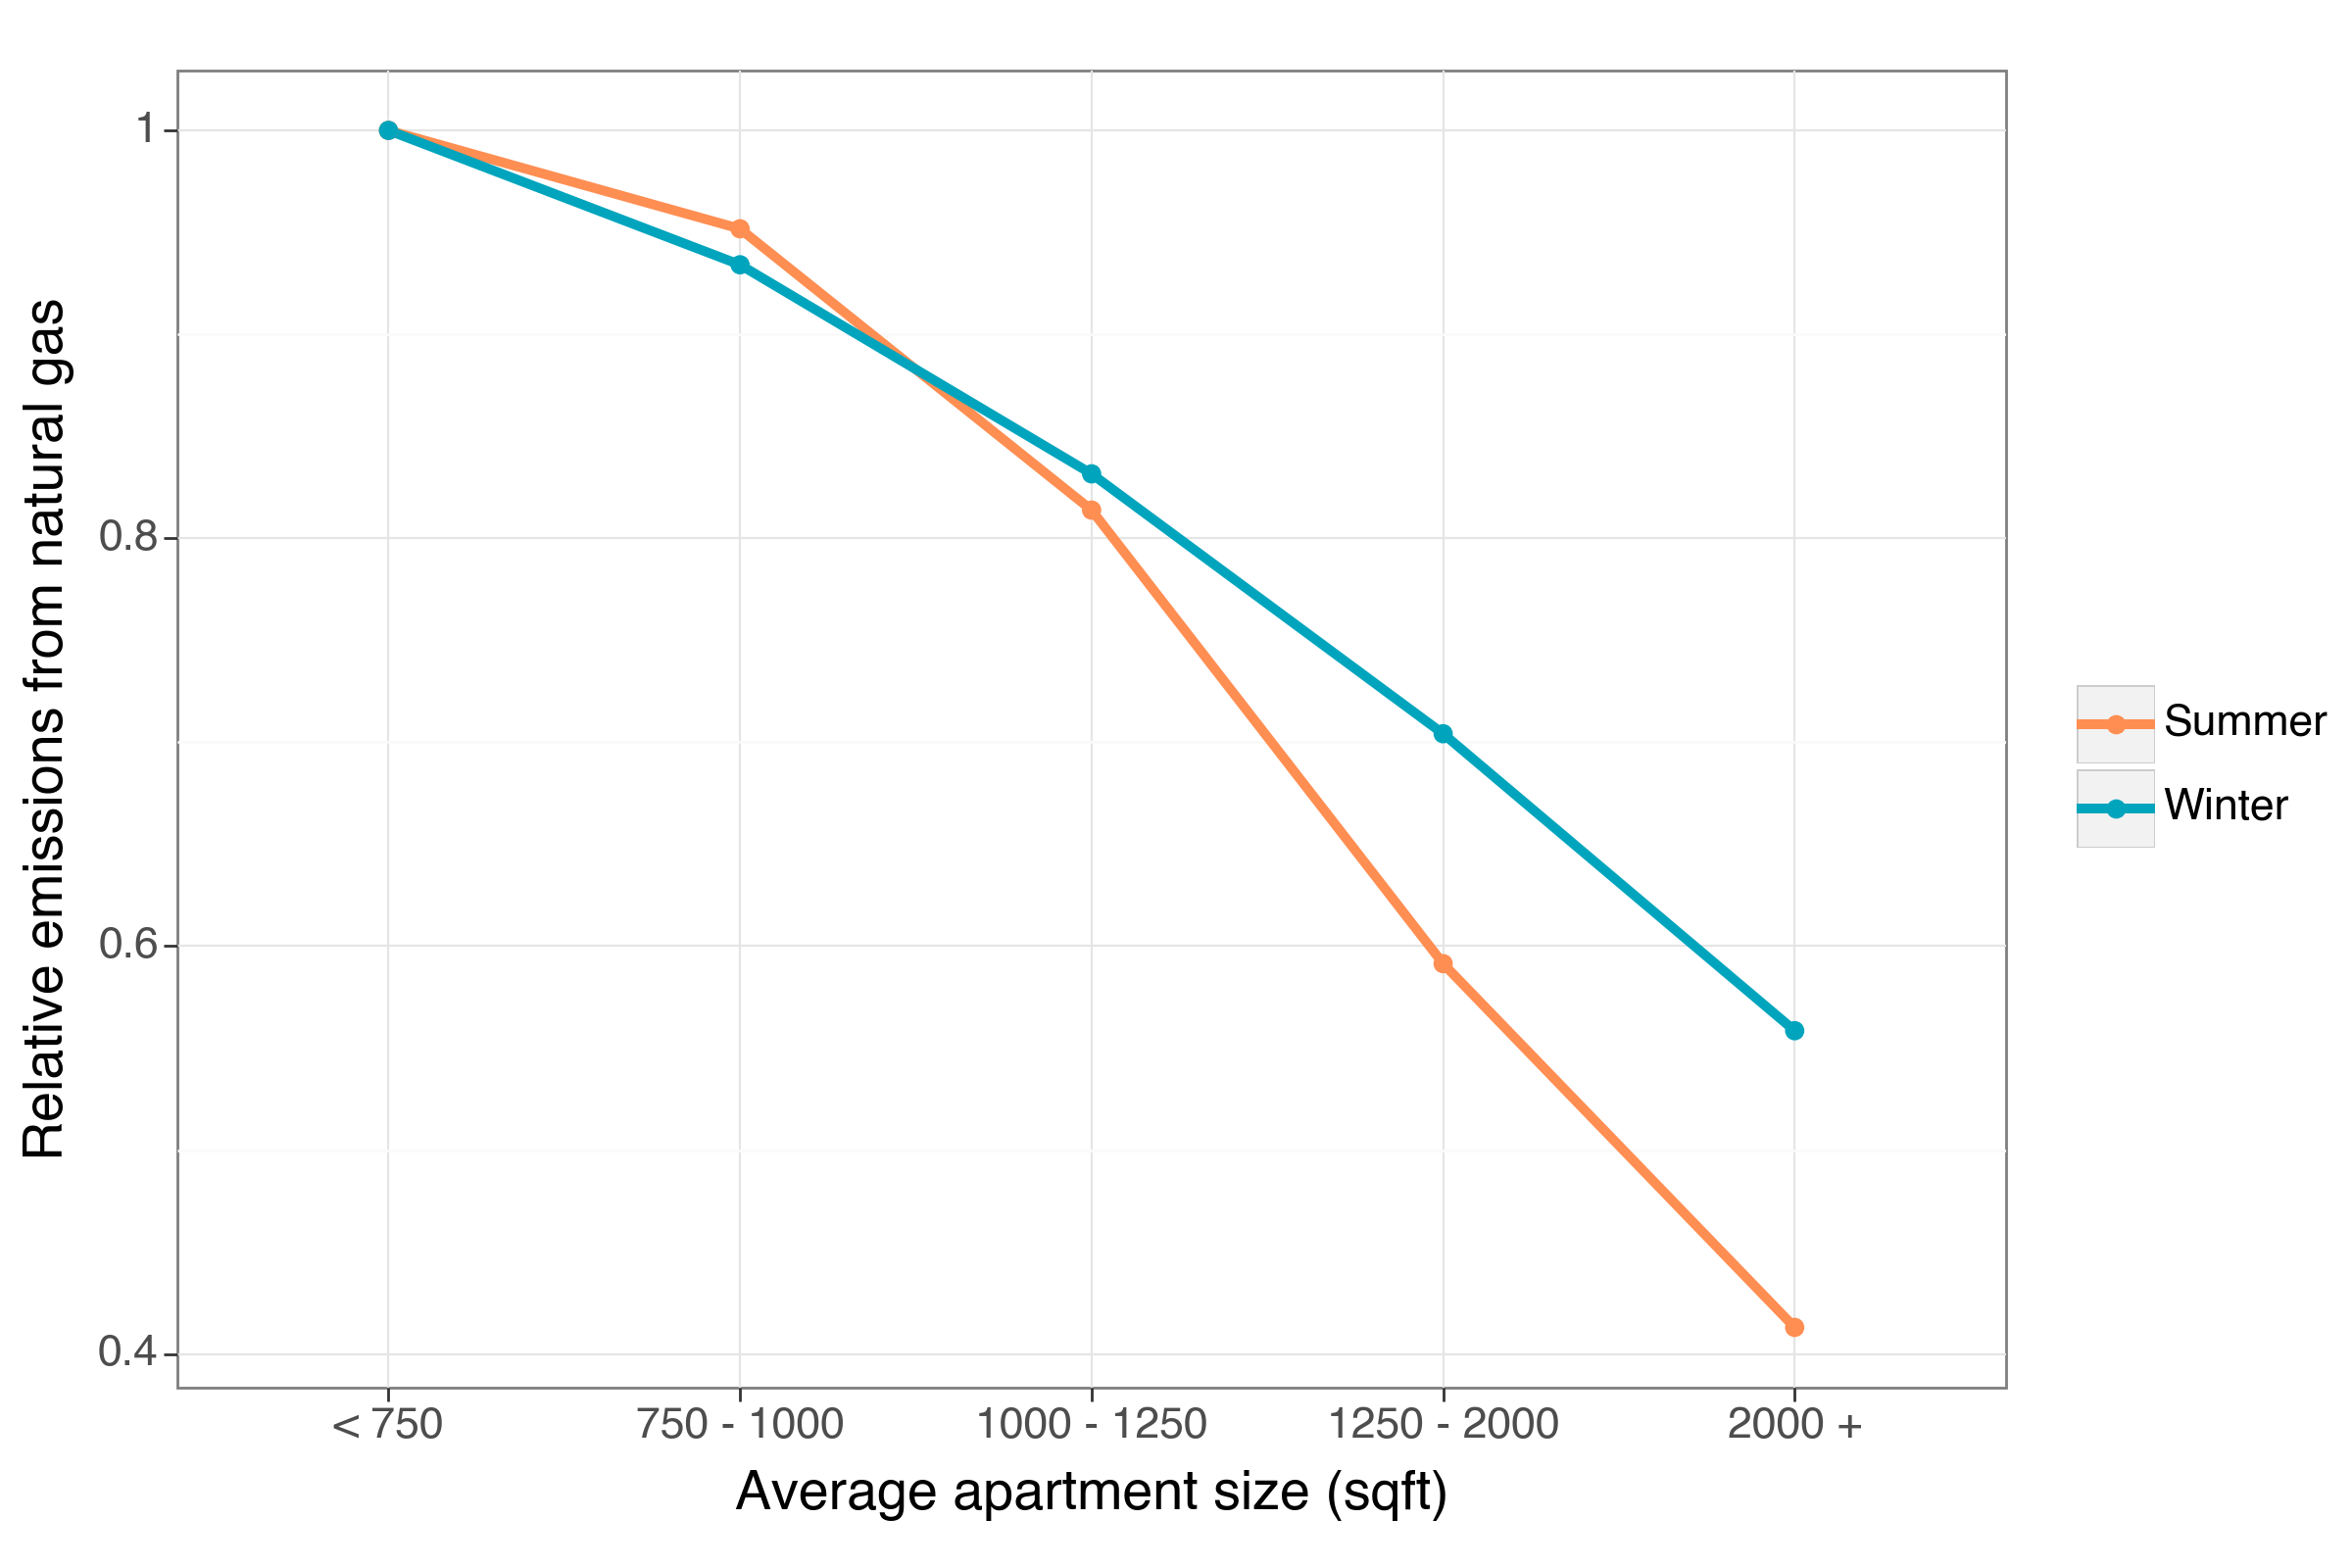

<Figure Size: (1200 x 800)>

In [106]:
(ggplot(plot_dat.query("season.isin(['Winter', 'Summer'])"), aes(x = "apt_size_cat", y = "gas_ratio", color = "season", group = "season")) + 
 geom_line(size = 2) + 
 geom_point(size = 3) + 
 labs(y = "Relative emissions from natural gas", x = "Average apartment size (sqft)") + 
 theme_bw(base_size= 20) +
 scale_color_manual(name = " ", values = [colors[3], colors[0]]) +
 theme(figure_size=(12,8)))

In [95]:
plot_dat

apt_size_cat  season  gas_sqft  small_gas_avg  gas_ratio  gas_ratio2
0         < 750    Fall  0.000231       0.000231   1.000000    1.000000
1    750 - 1000    Fall  0.000215       0.000231   0.929118    1.076289
2   1000 - 1250    Fall  0.000186       0.000231   0.804618    1.242825
3   1250 - 2000    Fall  0.000150       0.000231   0.649146    1.540486
4        2000 +    Fall  0.000118       0.000231   0.508697    1.965806
5         < 750  Spring  0.000360       0.000360   1.000000    1.000000
6    750 - 1000  Spring  0.000343       0.000360   0.953358    1.048924
7   1000 - 1250  Spring  0.000304       0.000360   0.843194    1.185967
8   1250 - 2000  Spring  0.000233       0.000360   0.646493    1.546806
9        2000 +  Spring  0.000166       0.000360   0.460187    2.173029
10        < 750  Summer  0.000131       0.000131   1.000000    1.000000
11   750 - 1000  Summer  0.000125       0.000131   0.951750    1.050696
12  1000 - 1250  Summer  0.000107       0.000131   0.813809    1.228790
13  1250 - 2000  Summer  0.000078       0.000131   0.591393    1.690922
14       2000 +  Summer  0.000054       0.000131   0.413025    2.421160
15        < 750  Winter  0.000593       0.000593   1.000000    1.000000
16   750 - 1000  Winter  0.000554       0.000593   0.934108    1.070541
17  1000 - 1250  Winter  0.000493       0.000593   0.831581    1.202529
18  1250 - 2000  Winter  0.000417       0.000593   0.704145    1.420163
19       2000 +  Winter  0.000331       0.000593   0.558510    1.790478

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/1507126511.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


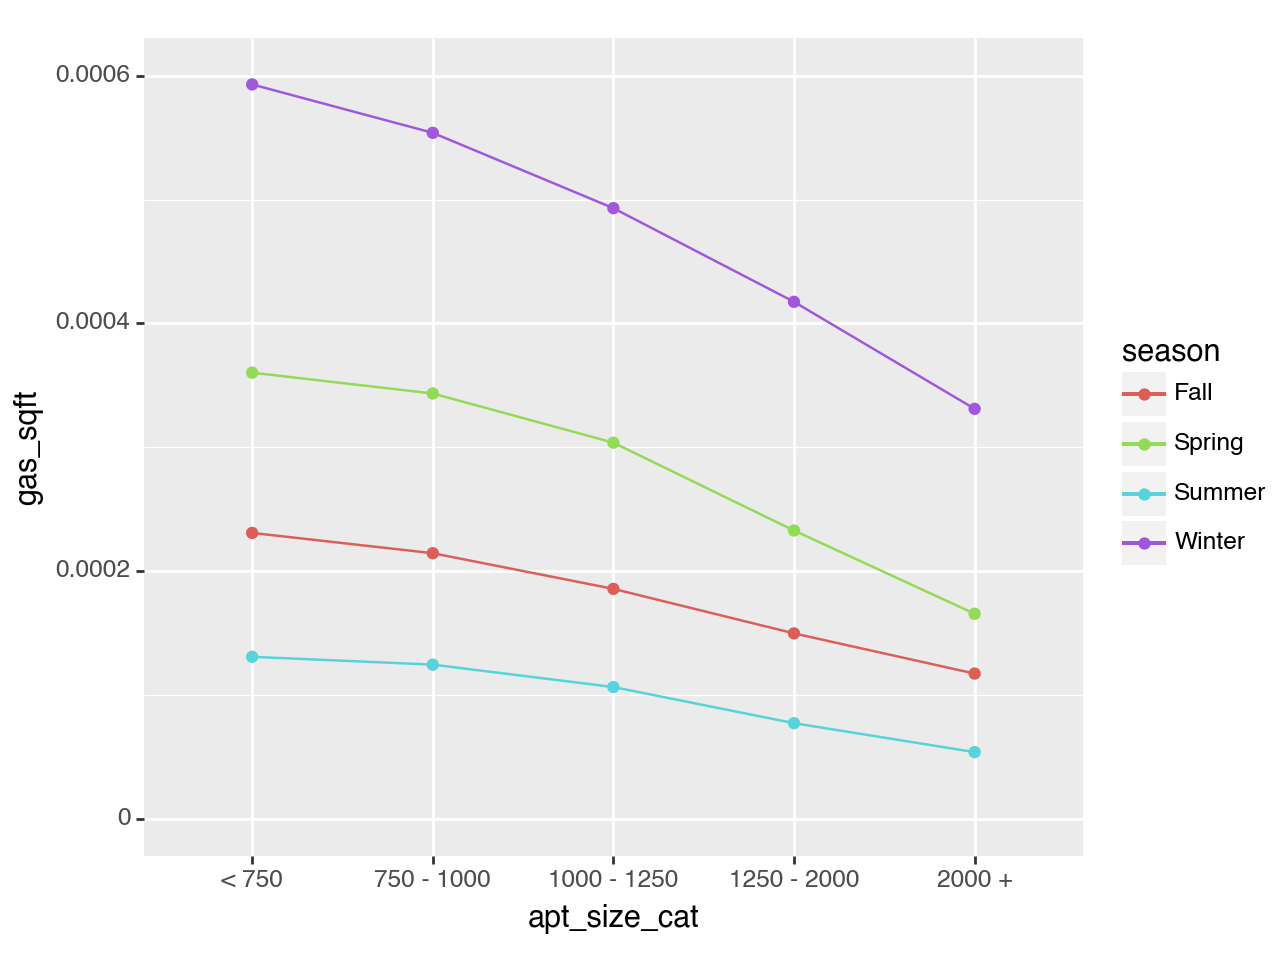

<Figure Size: (640 x 480)>

In [107]:
plot_dat = monthly_ghg.query("inferred_heating_method == 'Natural Gas'").groupby(["apt_size_cat", "season"])["gas_sqft"].median().reset_index()
ggplot(plot_dat, aes(x = "apt_size_cat", y = "gas_sqft", color = "season", group = "season")) + geom_line() + geom_point() + ylim(0, .0006)

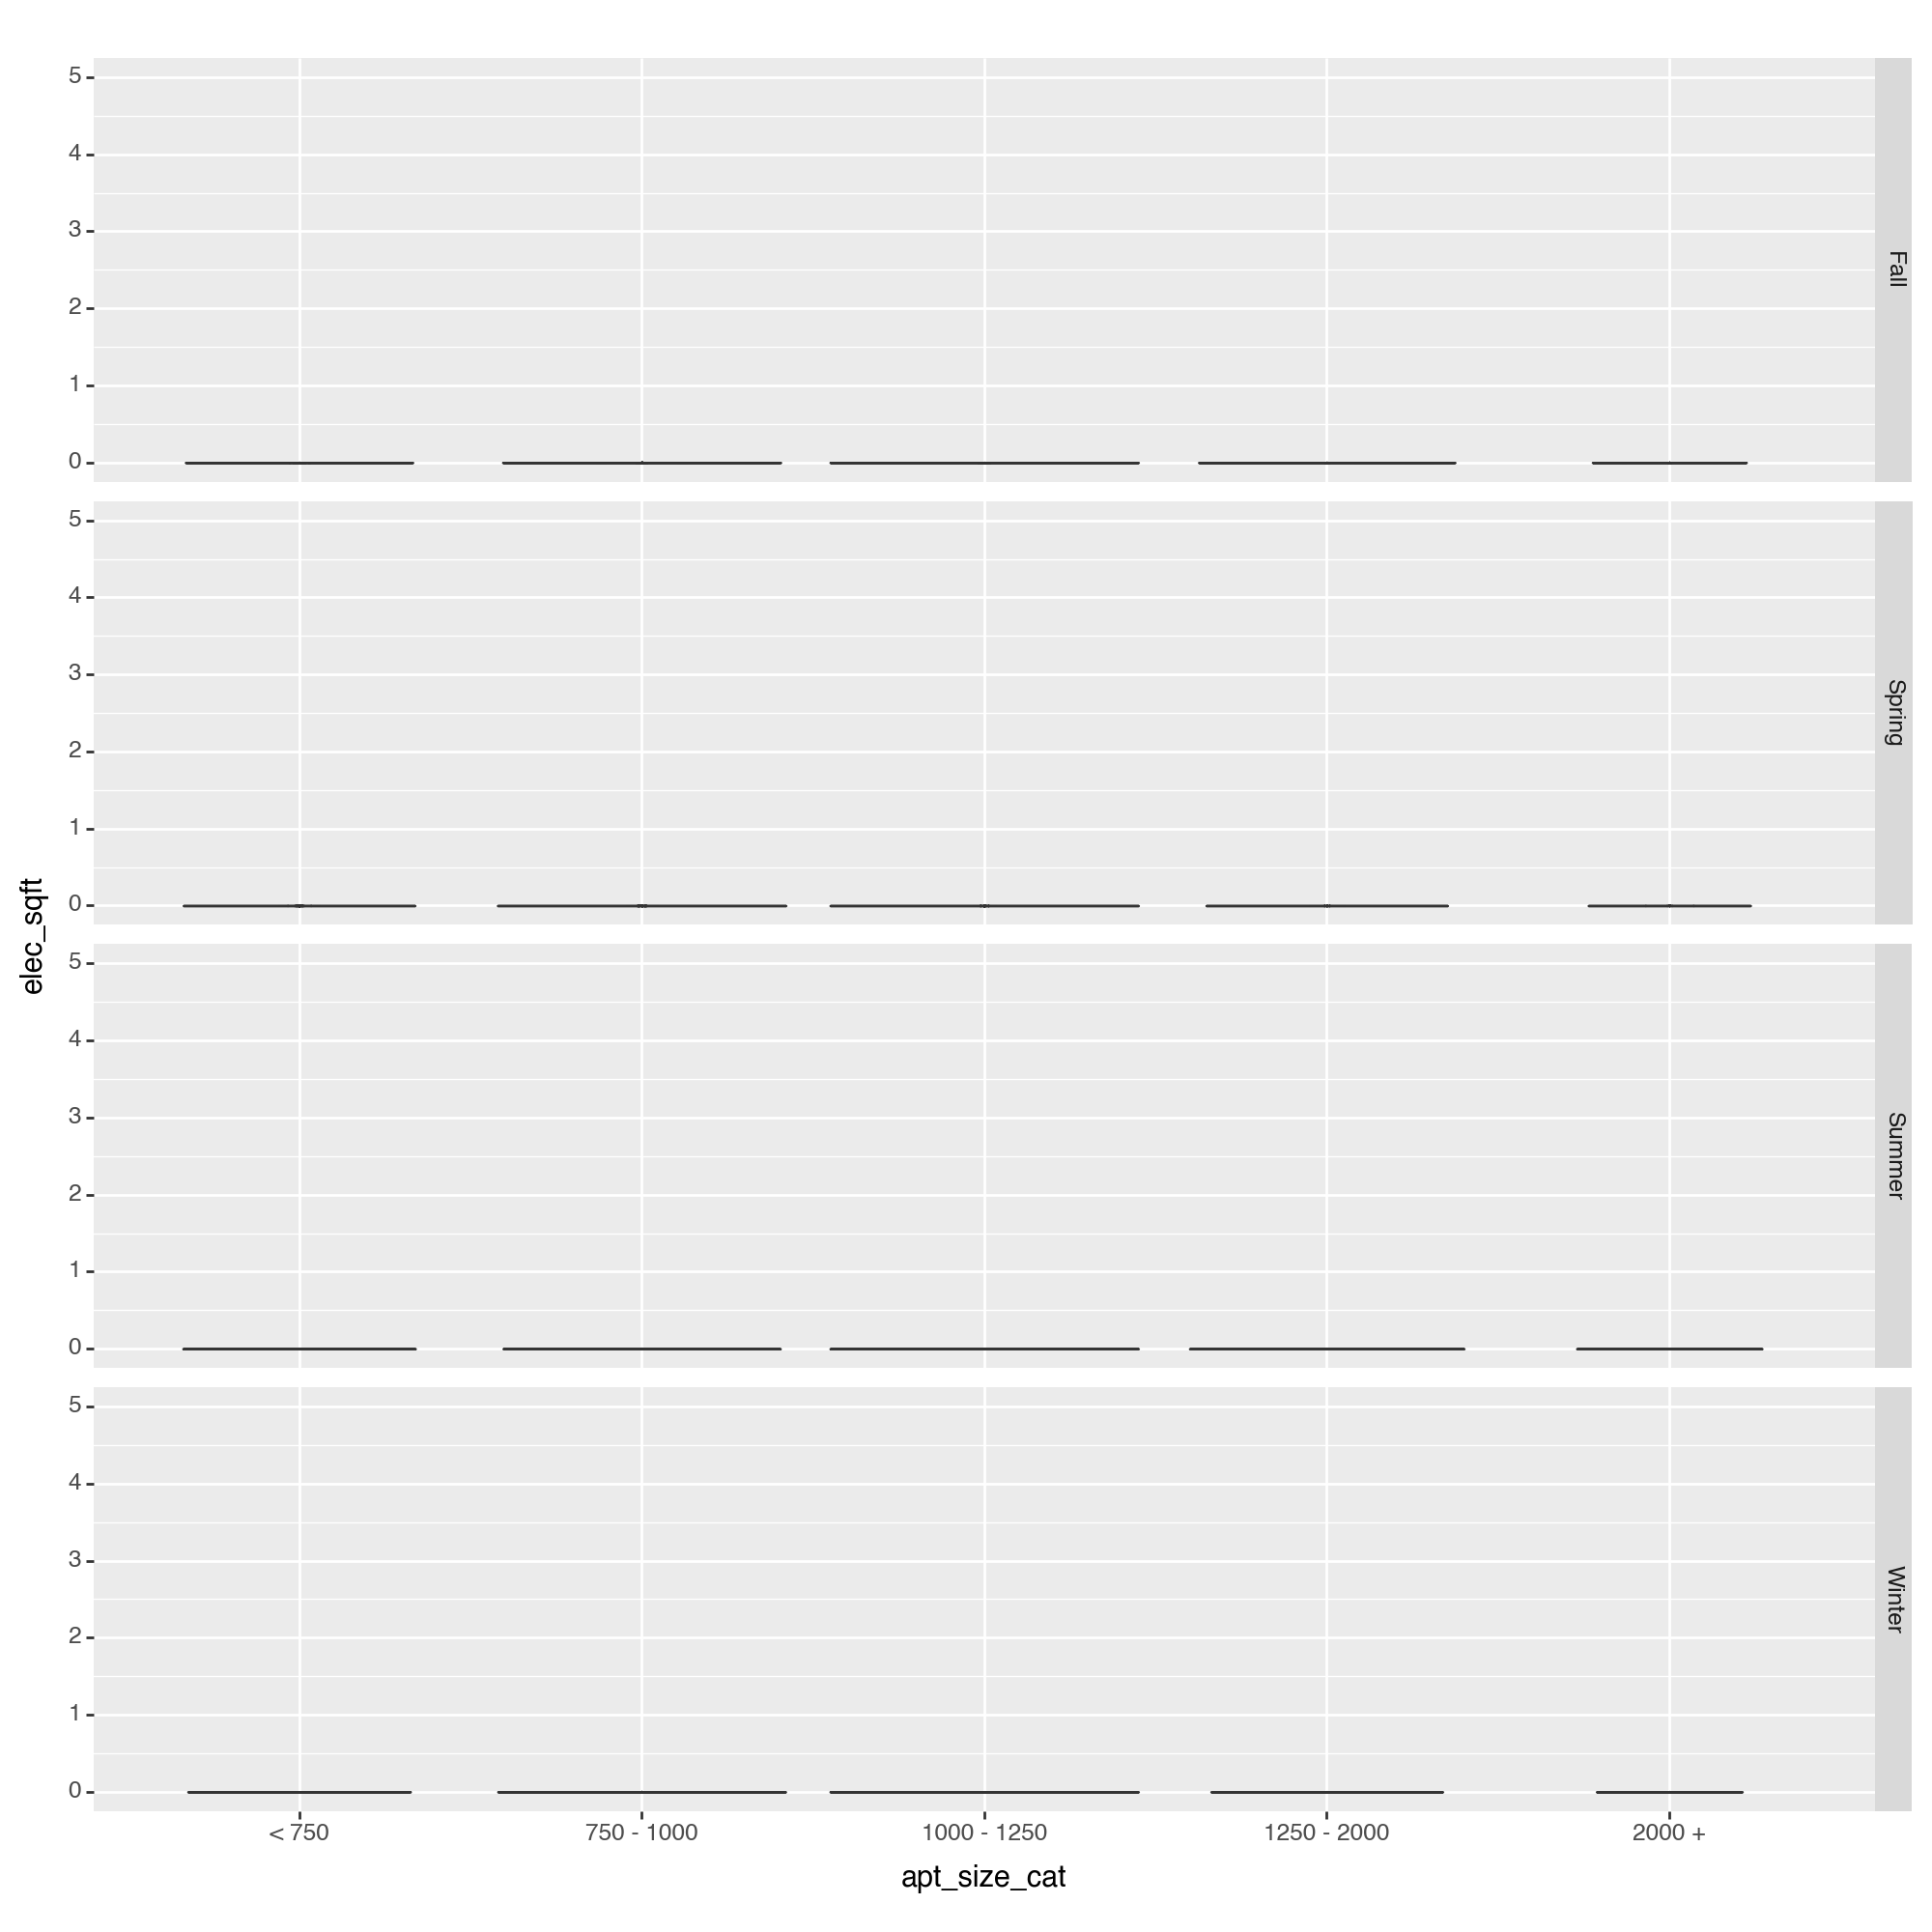

<Figure Size: (1000 x 1000)>

In [53]:
ggplot(monthly_ghg.query("inferred_heating_method == 'Natural Gas'"), aes(x = "apt_size_cat", y = "elec_sqft")) + geom_violin() + ylim(0, 5) + facet_grid("season~") + theme(figure_size=(10,10))

In [54]:
monthly_ghg["apt_size_cat"]

0         750 - 1000
1         750 - 1000
2         750 - 1000
3         750 - 1000
4         750 - 1000
             ...    
155203    750 - 1000
155204    750 - 1000
155205    750 - 1000
155206    750 - 1000
155207    750 - 1000
Name: apt_size_cat, Length: 155208, dtype: category
Categories (5, object): ['< 750' < '750 - 1000' < '1000 - 1250' < '1250 - 2000' < '2000 +']

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/2038612576.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


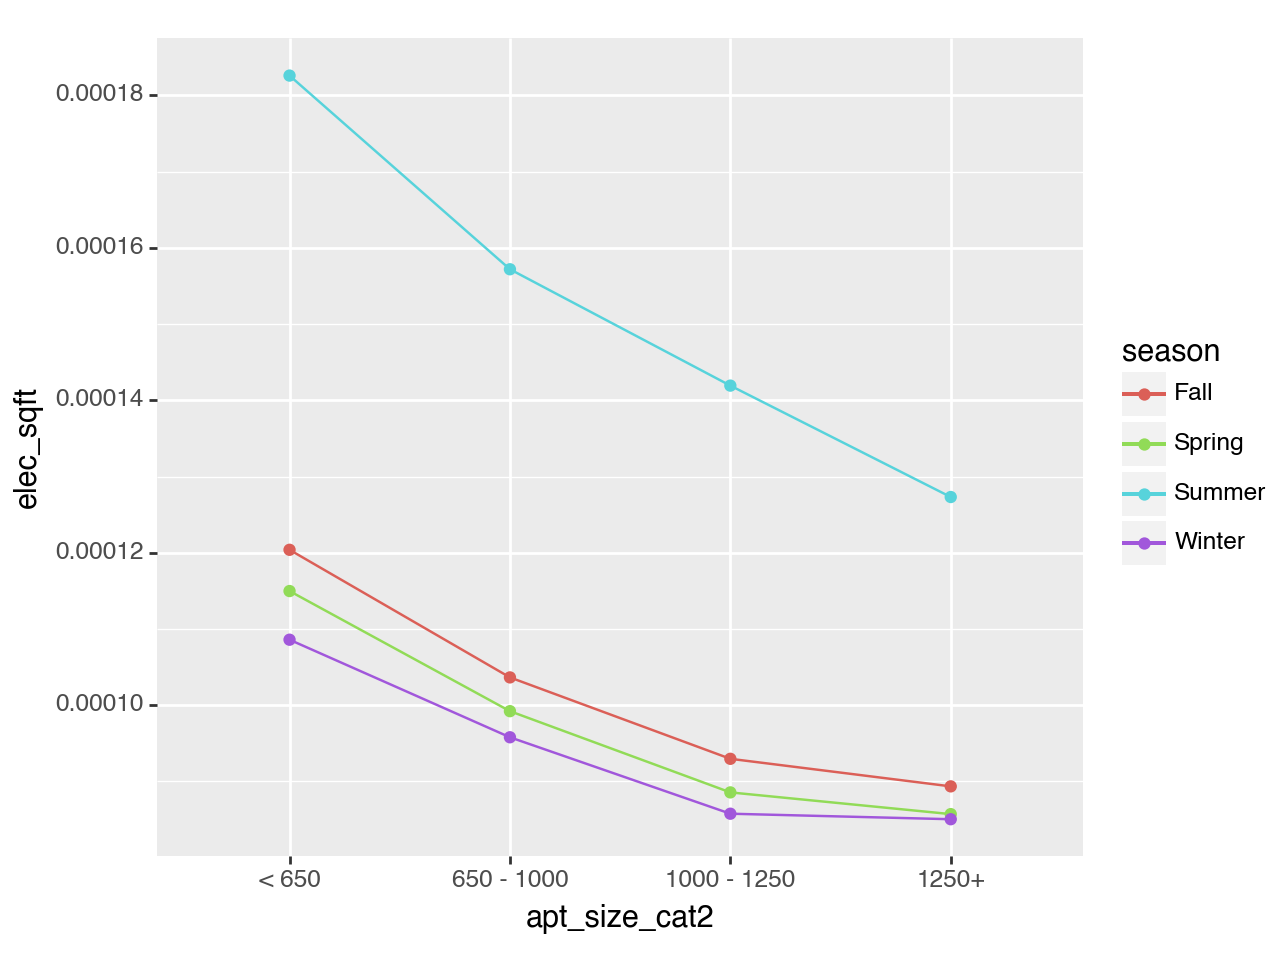

<Figure Size: (640 x 480)>

In [55]:
plot_dat = monthly_ghg.query("inferred_heating_method == 'Natural Gas' & laundry_cat == 'In-building'").groupby(["apt_size_cat2", "season"])["elec_sqft"].median().reset_index()
ggplot(plot_dat, aes(x = "apt_size_cat2", y = "elec_sqft", color = "season", group = "season")) + geom_line() + geom_point()

In [130]:
monthly_ghg.query("inferred_heating_method == 'Natural Gas' & laundry_cat == 'In-building'").groupby(["season", "apt_size_cat"])[["elec_sqft"]].mean().reset_index().query("~elec_sqft.isna() & season.isin(['Summer', 'Winter'])")

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/734513911.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


season apt_size_cat  elec_sqft
10  Summer        < 750   0.000187
11  Summer   750 - 1000   0.000166
12  Summer  1000 - 1250   0.000152
13  Summer  1250 - 2000   0.000140
14  Summer       2000 +   0.000142
15  Winter        < 750   0.000122
16  Winter   750 - 1000   0.000107
17  Winter  1000 - 1250   0.000096
18  Winter  1250 - 2000   0.000095
19  Winter       2000 +   0.000107

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16445/2184548133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


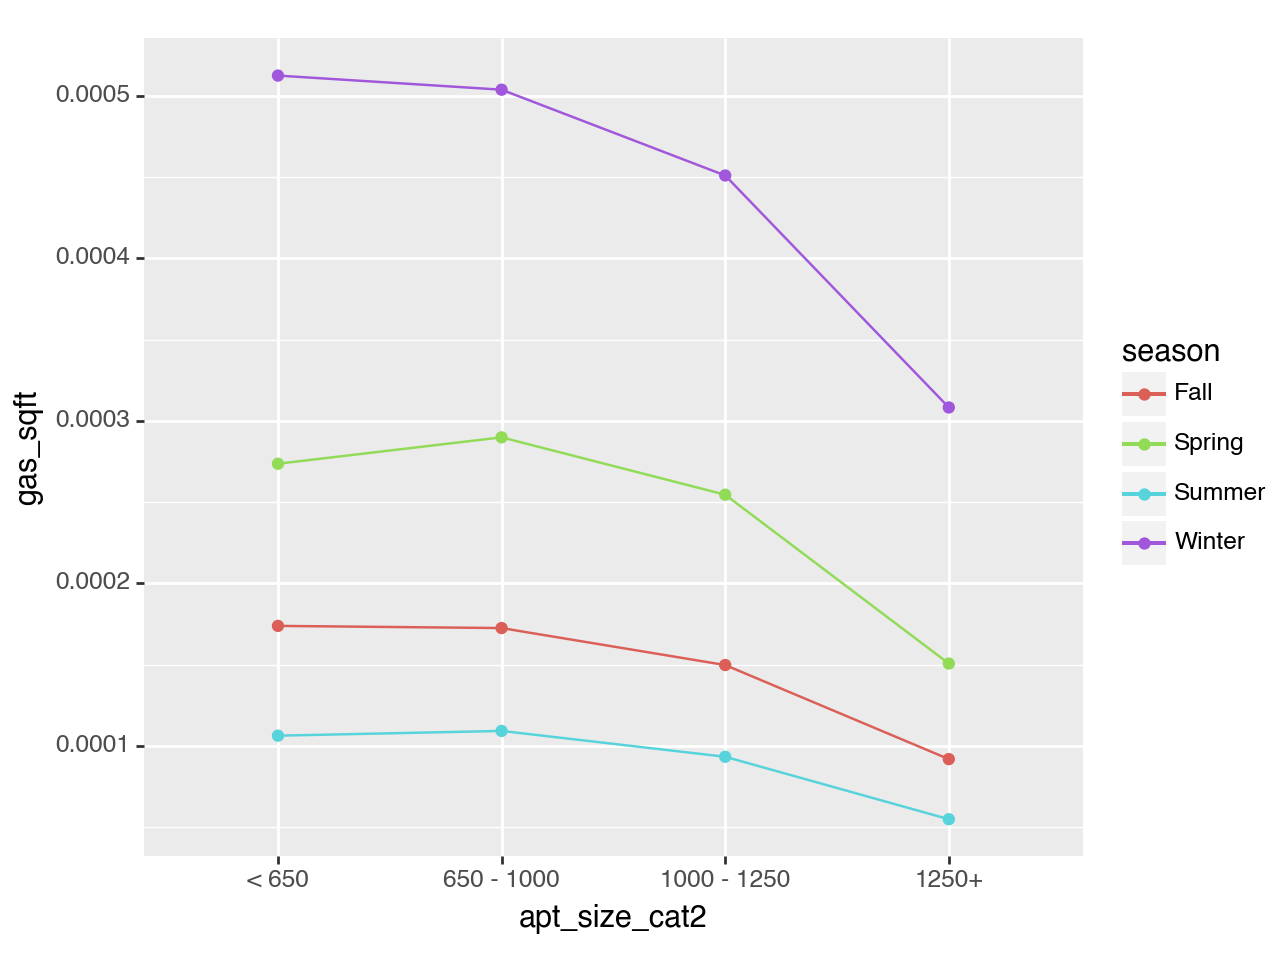

<Figure Size: (640 x 480)>

In [57]:
plot_dat = monthly_ghg.groupby(["apt_size_cat2", "season"])["gas_sqft"].median().reset_index()
ggplot(plot_dat, aes(x = "apt_size_cat2", y = "gas_sqft", color = "season", group = "season")) + geom_line() + geom_point()

In [58]:
monthly_ghg.query("apt_size_cat == '2000 +' & laundry_cat == 'None'").drop_duplicates("property_id")

property id                              name inferred_heating_method  \
1272        2812924                     1010 Faile St             Natural Gas   
1284        2813145                     1043 Faile St             Natural Gas   
3984        6282556         Cornerstone: 104 Charlton             Natural Gas   
3996        6282900     Sandra Greer: 288 West Street             Natural Gas   
4008        6301477            Andrews: 22 Renwick St             Natural Gas   
...             ...                               ...                     ...   
141204     14848338  252 East 57th Street Condominium             Natural Gas   
141252      3538962       Halstead - 212 East 57th St          District Steam   
141948      4952430       DEPM 1528 - 565 Park Avenue                Fuel Oil   
152904      8704851                 19-73 38th Street             Natural Gas   
153516      6742640                     14-34 110 St.             Natural Gas   

       apt_size_cat apt_size_cat2  total_fa laundry_cat  unit_laundry_hookups  \
1272         2000 +         1250+   93600.0        None                   0.0   
1284         2000 +         1250+   93600.0        None                   0.0   
3984         2000 +         1250+   37424.0        None                   0.0   
3996         2000 +         1250+   40747.0        None                   0.0   
4008         2000 +         1250+   35578.0        None                   0.0   
...             ...           ...       ...         ...                   ...   
141204       2000 +         1250+  647343.0        None                   0.0   
141252       2000 +         1250+   80160.0        None                   0.0   
141948       2000 +         1250+   72307.0        None                   0.0   
152904       2000 +         1250+  181274.0        None                   0.0   
153516       2000 +         1250+   79370.0        None                   0.0   

        common_laundry_hookups  property_id      month  \
1272                       0.0      2812924 2020-01-01   
1284                       0.0      2813145 2020-01-01   
3984                       0.0      6282556 2020-01-01   
3996                       0.0      6282900 2020-01-01   
4008                       0.0      6301477 2020-01-01   
...                        ...          ...        ...   
141204                     0.0     14848338 2020-01-01   
141252                     0.0      3538962 2020-01-01   
141948                     0.0      4952430 2020-01-01   
152904                     0.0      8704851 2020-01-01   
153516                     0.0      6742640 2020-01-01   

        electricity_use__(kbtu)  natural_gas_use__(kbtu)  \
1272                    73646.8                 517948.0   
1284                    92526.8                 699174.5   
3984                    57774.3                 242812.9   
3996                    58608.1                 157692.1   
4008                   106803.0                 208365.8   
...                         ...                      ...   
141204                1763981.3                2472655.0   
141252                 197156.7                 192931.7   
141948                  93458.4                   6336.7   
152904                 182130.9                1182731.3   
153516                 164242.1                 700728.9   

        electricity_emissions  natural_gas_emissions  season  elec_sqft  \
1272                 6.236881              27.508218  Winter   0.000067   
1284                 7.835760              37.133158  Winter   0.000084   
3984                 4.892696              12.895793  Winter   0.000131   
3996                 4.963308               8.375027  Winter   0.000122   
4008                 9.044760              11.066308  Winter   0.000254   
...                       ...                    ...     ...        ...   
141204             149.385195             131.322707  Winter   0.000231   
141252              16.696488              1

In [59]:
import statsmodels.formula.api as smf

In [60]:
mod = smf.ols("elec_sqft ~ apt_size_cat + laundry_cat + season", data = monthly_ghg.query("laundry_cat != 'Unkownn'")).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              elec_sqft   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1409.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:45:21   Log-Likelihood:             1.2261e+06
No. Observations:              155208   AIC:                        -2.452e+06
Df Residuals:                  155197   BIC:                        -2.452e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0001   8.97e-07    148.606      0.000       0.000       0.000
apt_size_cat[T.750 - 1000]  -2.198e-05   8.26e-07    -26.600      0.000   -2.36e-05   -2.04e-05
apt_size_cat[T.1000 - 1250] -3.141e-05    8.5e-07    -36.960      0.000   -3.31e-05   -2.97e-05
apt_size_cat[T.1250 - 2000] -2.667e-05   9.44e-07    -28.245      0.000   -2.85e-05   -2.48e-05
apt_size_cat[T.2000 +]      -3.228e-06    1.2e-06     -2.696      0.007   -5.58e-06   -8.81e-07
laundry_cat[T.In-unit]       3.066e-05   9.68e-07     31.659      0.000    2.88e-05    3.26e-05
laundry_cat[T.None]           2.12e-06   5.73e-07      3.696      0.000    9.96e-07    3.24e-06
laundry_cat[T.Unknown]       1.407e-05   5.84e-07     24.090      0.000    1.29e-05    1.52e-05
season[T.Spring]            -5.646e-06   6.44e-07     -8.766      0.000   -6.91e-06   -4.38e-06
season[T.Summer]             4.893e-05   6.44e-07     75.968      0.000    4.77e-05    5.02e-05
season[T.Winter]            -3.749e-06   6.44e-07     -5.821      0.000   -5.01e-06   -2.49e-06
==============================================================================
Omnibus:                   352753.549   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6822768468.325
Skew:                          21.422   Prob(JB):                         0.00
Kurtosis:                    1029.244   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
mod = smf.logit("bottom_quint ~  apt_size_cat", data = ghg).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.458952
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           bottom_quint   No. Observations:                16540
Model:                          Logit   Df Residuals:                    16535
Method:                           MLE   Df Model:                            4
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                 0.05221
Time:                        18:45:21   Log-Likelihood:                -7591.1
converged:                       True   LL-Null:                       -8009.3
Covariance Type:            nonrobust   LLR p-value:                1.006e-179
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.4912      0.052     -9.532      0.000      -0.592      -0.390
apt_size_cat[T.750 - 1000]     -0.6577      0.059    -11.082      0.000      -0.774      -0.541
apt_size_cat[T.1000 - 1250]    -1.3192      0.066    -19.928      0.000      -1.449      -1.189
apt_size_cat[T.1250 - 2000]    -1.9485      0.088    -22.051      0.000      -2.122      -1.775
apt_size_cat[T.2000 +]         -1.8234      0.113    -16.098      0.000      -2.045      -1.601
===============================================================================================
"""

In [62]:
mod = smf.ols("co2_intensity ~ med_hh_inc", data = ghg).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_intensity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     21.73
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           3.16e-06
Time:                        18:45:21   Log-Likelihood:                -54911.
No. Observations:               16540   AIC:                         1.098e+05
Df Residuals:                   16538   BIC:                         1.098e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4507      0.098     55.347      0.000       5.258       5.644
med_hh_inc -4.897e-06   1.05e-06     -4.662      0.000   -6.96e-06   -2.84e-06
==============================================================================
Omnibus:                    66545.449   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     105804331966.763
Skew:                         103.849   Prob(JB):                         0.00
Kurtosis:                   12391.781   Cond. No.                     1.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
mod = smf.ols("co2_intensity ~ med_hh_inc + apt_size_cat", data = ghg).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_intensity   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     17.45
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.82e-17
Time:                        18:45:21   Log-Likelihood:                -54879.
No. Observations:               16540   AIC:                         1.098e+05
Df Residuals:                   16534   BIC:                         1.098e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.2612      0.190     32.883      0.000       5.888       6.634
apt_size_cat[T.750 - 1000]     -0.7196      0.187     -3.840      0.000      -1.087      -0.352
apt_size_cat[T.1000 - 1250]    -1.2263      0.193     -6.347      0.000      -1.605      -0.848
apt_size_cat[T.1250 - 2000]    -1.3784      0.213     -6.470      0.000      -1.796      -0.961
apt_size_cat[T.2000 +]         -1.5581      0.269     -5.784      0.000      -2.086      -1.030
med_hh_inc                  -2.986e-06   1.18e-06     -2.535      0.011   -5.29e-06   -6.78e-07
==============================================================================
Omnibus:                    66700.941   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     107944313645.606
Skew:                         104.626   Prob(JB):                         0.00
Kurtosis:                   12516.449   Cond. No.                     7.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
tract_data = ghg.groupby("tract")[["bottom_quint", 'pop_in_poverty', 'pop_black', 'pop_hispanic',
       'med_hh_inc']].mean().reset_index()

In [65]:
tract_data

tract  bottom_quint  pop_in_poverty  pop_black  pop_hispanic  \
0     000100      0.176471        0.061003   0.147959      0.070319   
1     000101      0.100000        0.017467   0.014972      0.116448   
2     000102      0.142857        0.015634   0.007426      0.076607   
3     000200      0.000000        0.113697   0.065624      0.571156   
4     000201      1.000000        0.500368   0.047531      0.615328   
...      ...           ...             ...        ...           ...   
1131  155104      1.000000        0.103892   0.106599      0.194585   
1132  157101      1.000000        0.039265   0.015302      0.203084   
1133  157901      0.500000        0.112822   0.015773      0.114678   
1134  157903      0.000000        0.063132   0.036252      0.088039   
1135  162100      0.000000        0.099513   0.045990      0.251923   

      med_hh_inc  
0       107917.0  
1       150208.0  
2       186875.0  
3        72500.0  
4        30435.0  
...          ...  
1131    114208.0  
1132     97847.0  
1133    103238.0  
1134     94868.0  
1135     85063.0  

[1136 rows x 6 columns]

In [66]:
plot_dat = tract_data.rename({"pop_in_poverty" : "Poverty rate", "pop_black" : "% Black", "pop_hispanic" : "% Hispanic/Latino", "med_hh_inc" : "Median household income"} ,axis = 1).melt(["tract", "bottom_quint"])

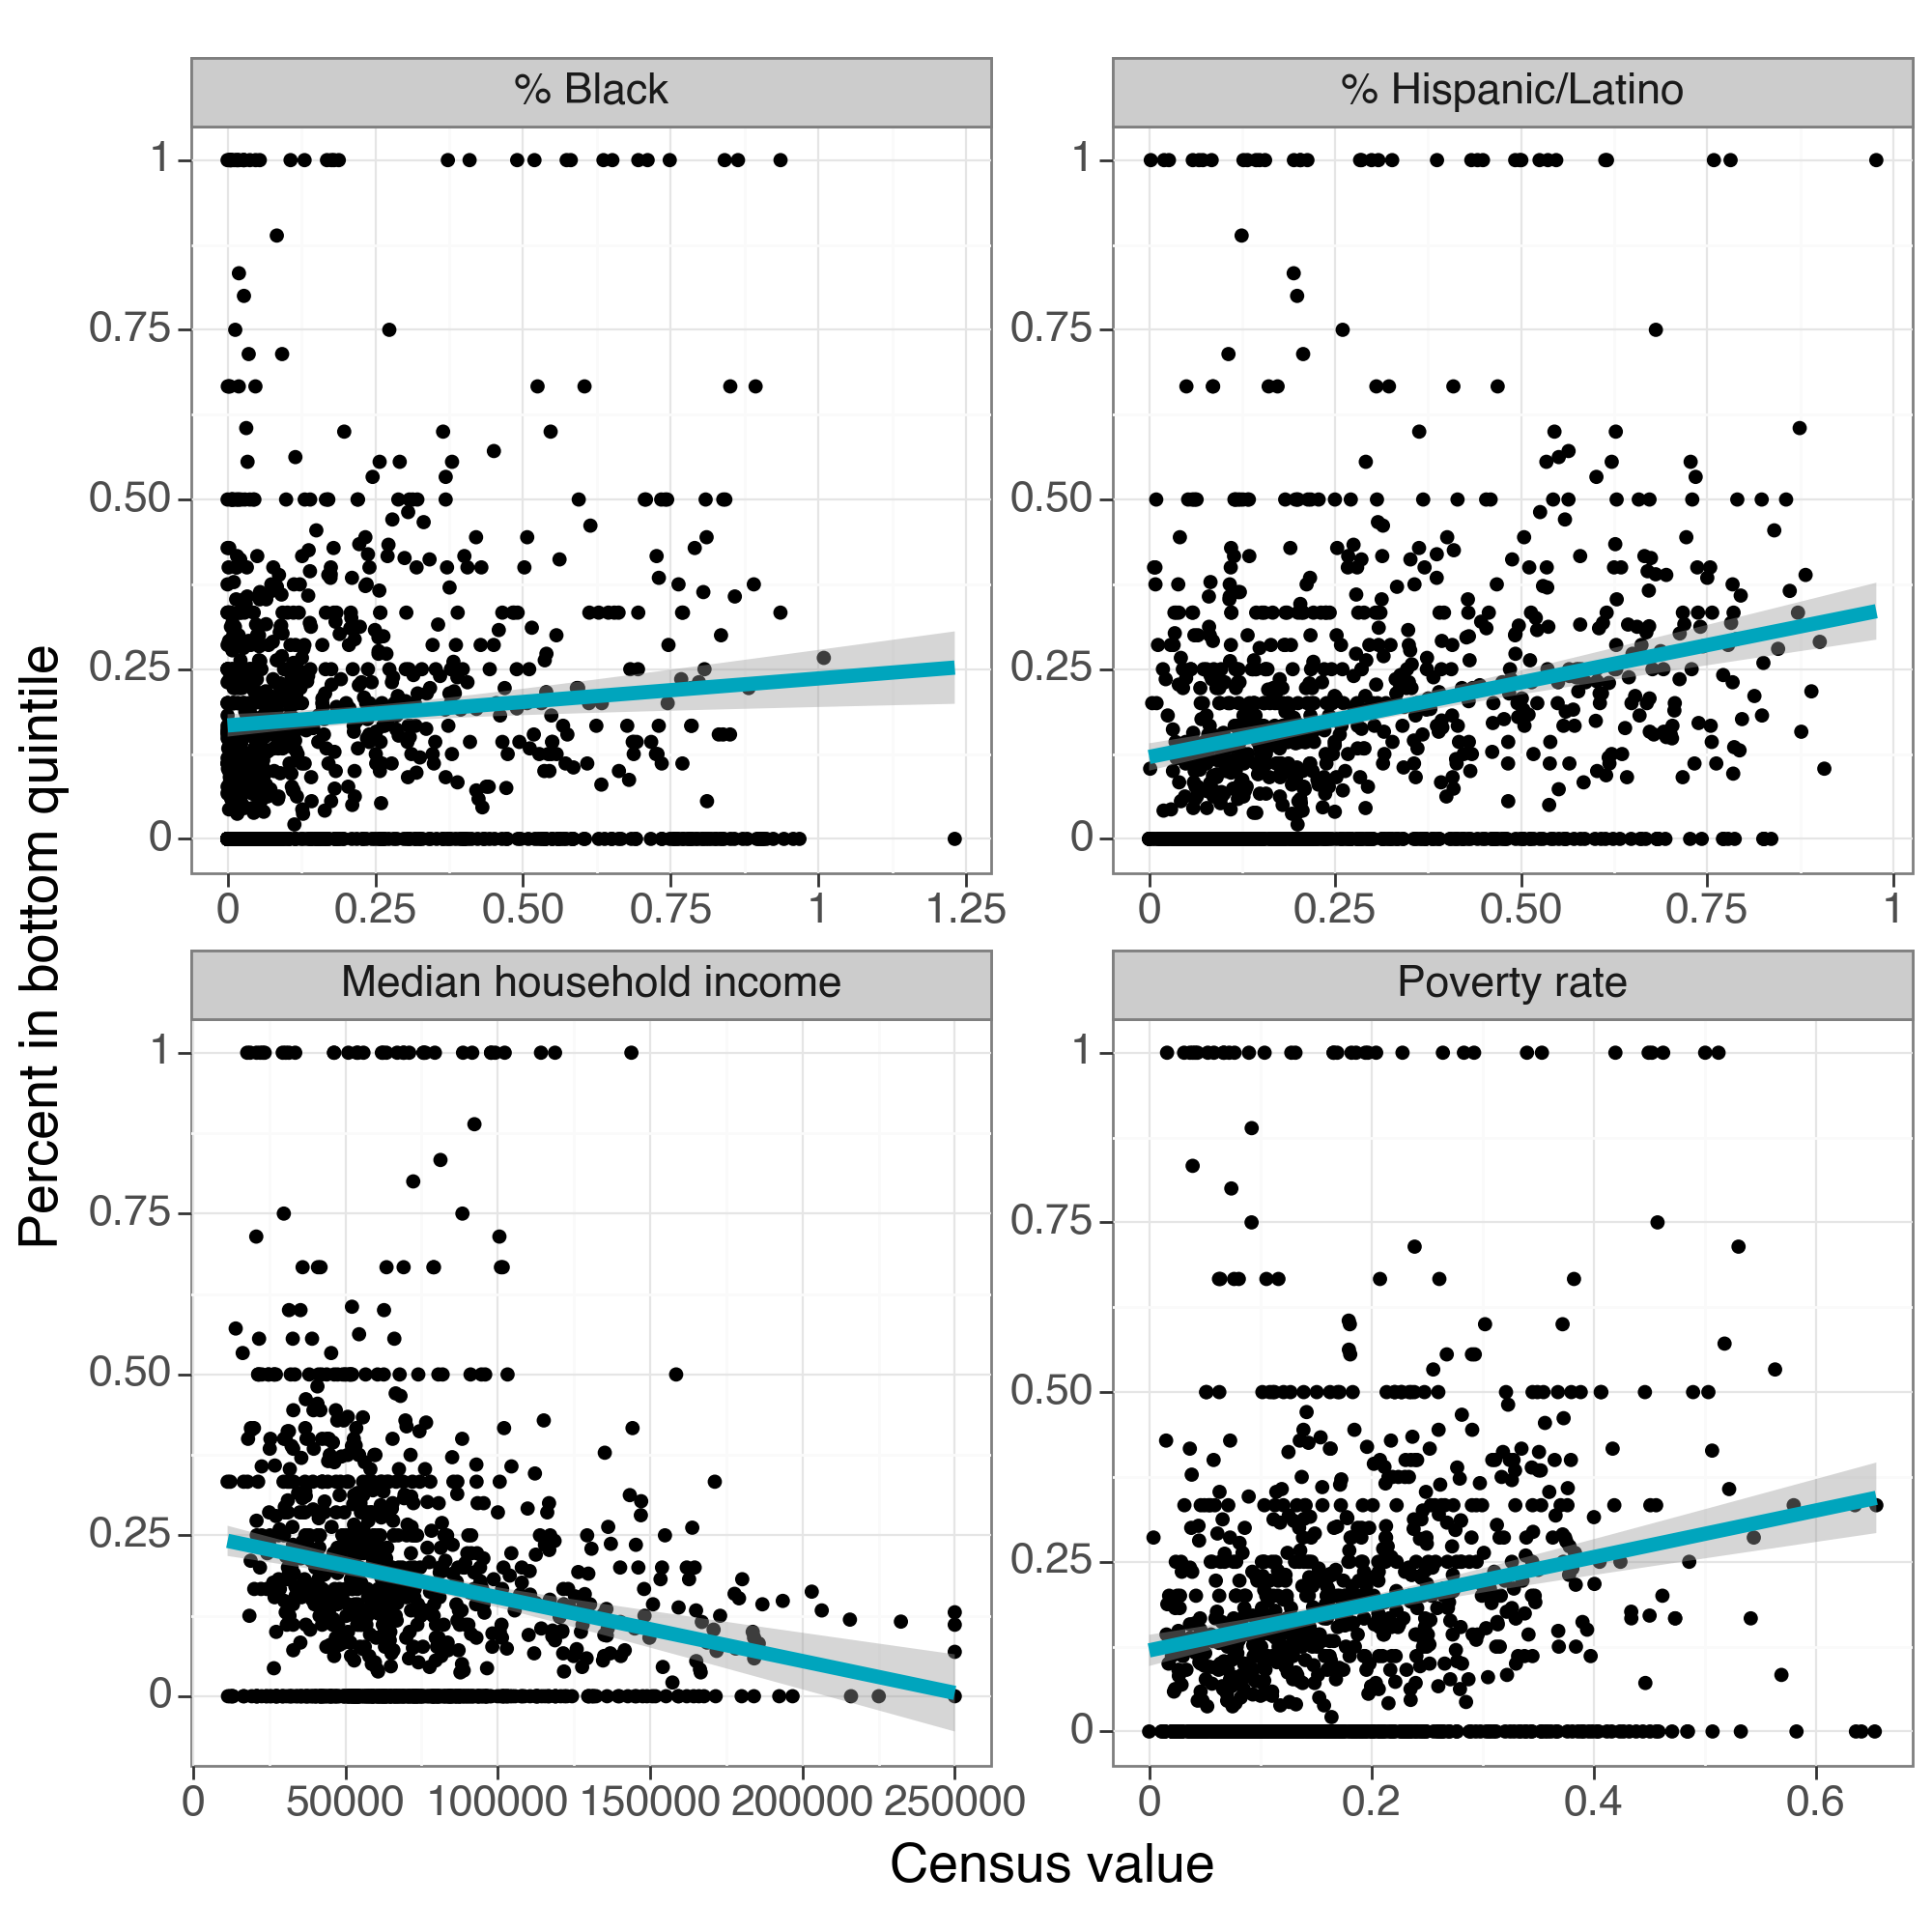

<Figure Size: (1000 x 1000)>

In [67]:
(ggplot(plot_dat, aes(x = "value", y = "bottom_quint")) + geom_point(size = 2) + geom_smooth(color =colors[0], size = 3) + facet_wrap("variable", scales = "free") + theme_bw(base_size=20) + theme(figure_size=(10,10)) + labs(y = "Percent in bottom quintile", x = "Census value"))

In [68]:
cds = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/yfnk-k7r4?method=export&format=GeoJSON")
ghg_cds = ghg.overlay(cds)
ghg_cds.query("boro_cd == '305'")["co2_intensity"].describe()
cd_plot_dat = ghg_cds.groupby("boro_cd").agg({"co2_intensity" : "median", "bbl" : "nunique", "bottom_quint" : "mean"}).reset_index().merge(cds).query("bbl > 50")
cd_plot_dat = gpd.GeoDataFrame(cd_plot_dat)

In [86]:
import folium

cds = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/yfnk-k7r4?method=export&format=GeoJSON")
ghg_cds = ghg.overlay(cds)
ghg_cds.query("boro_cd == '305'")["co2_intensity"].describe()
cd_plot_dat = ghg_cds.groupby("boro_cd").agg({"co2_intensity" : "median", "bbl" : "nunique", "bottom_quint" : "mean"}).reset_index().merge(cds).query("bbl > 50")
cd_plot_dat = gpd.GeoDataFrame(cd_plot_dat)

base_map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

folium.Choropleth(
    geo_data=cd_plot_dat,
    data=cd_plot_dat,
    columns=["boro_cd", "co2_intensity"],
    key_on="feature.properties.boro_cd",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="co2_intensity",
    reset=True,
).add_to(base_map)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;">

&nbsp; Legend <br>
&nbsp; Item 1: Value 1 <br>
&nbsp; Item 2: Value 2 <br>
</div>
'''

base_map.get_root().html.add_child(folium.Element(legend_html))





folium.LayerControl().add_to(base_map)
base_map

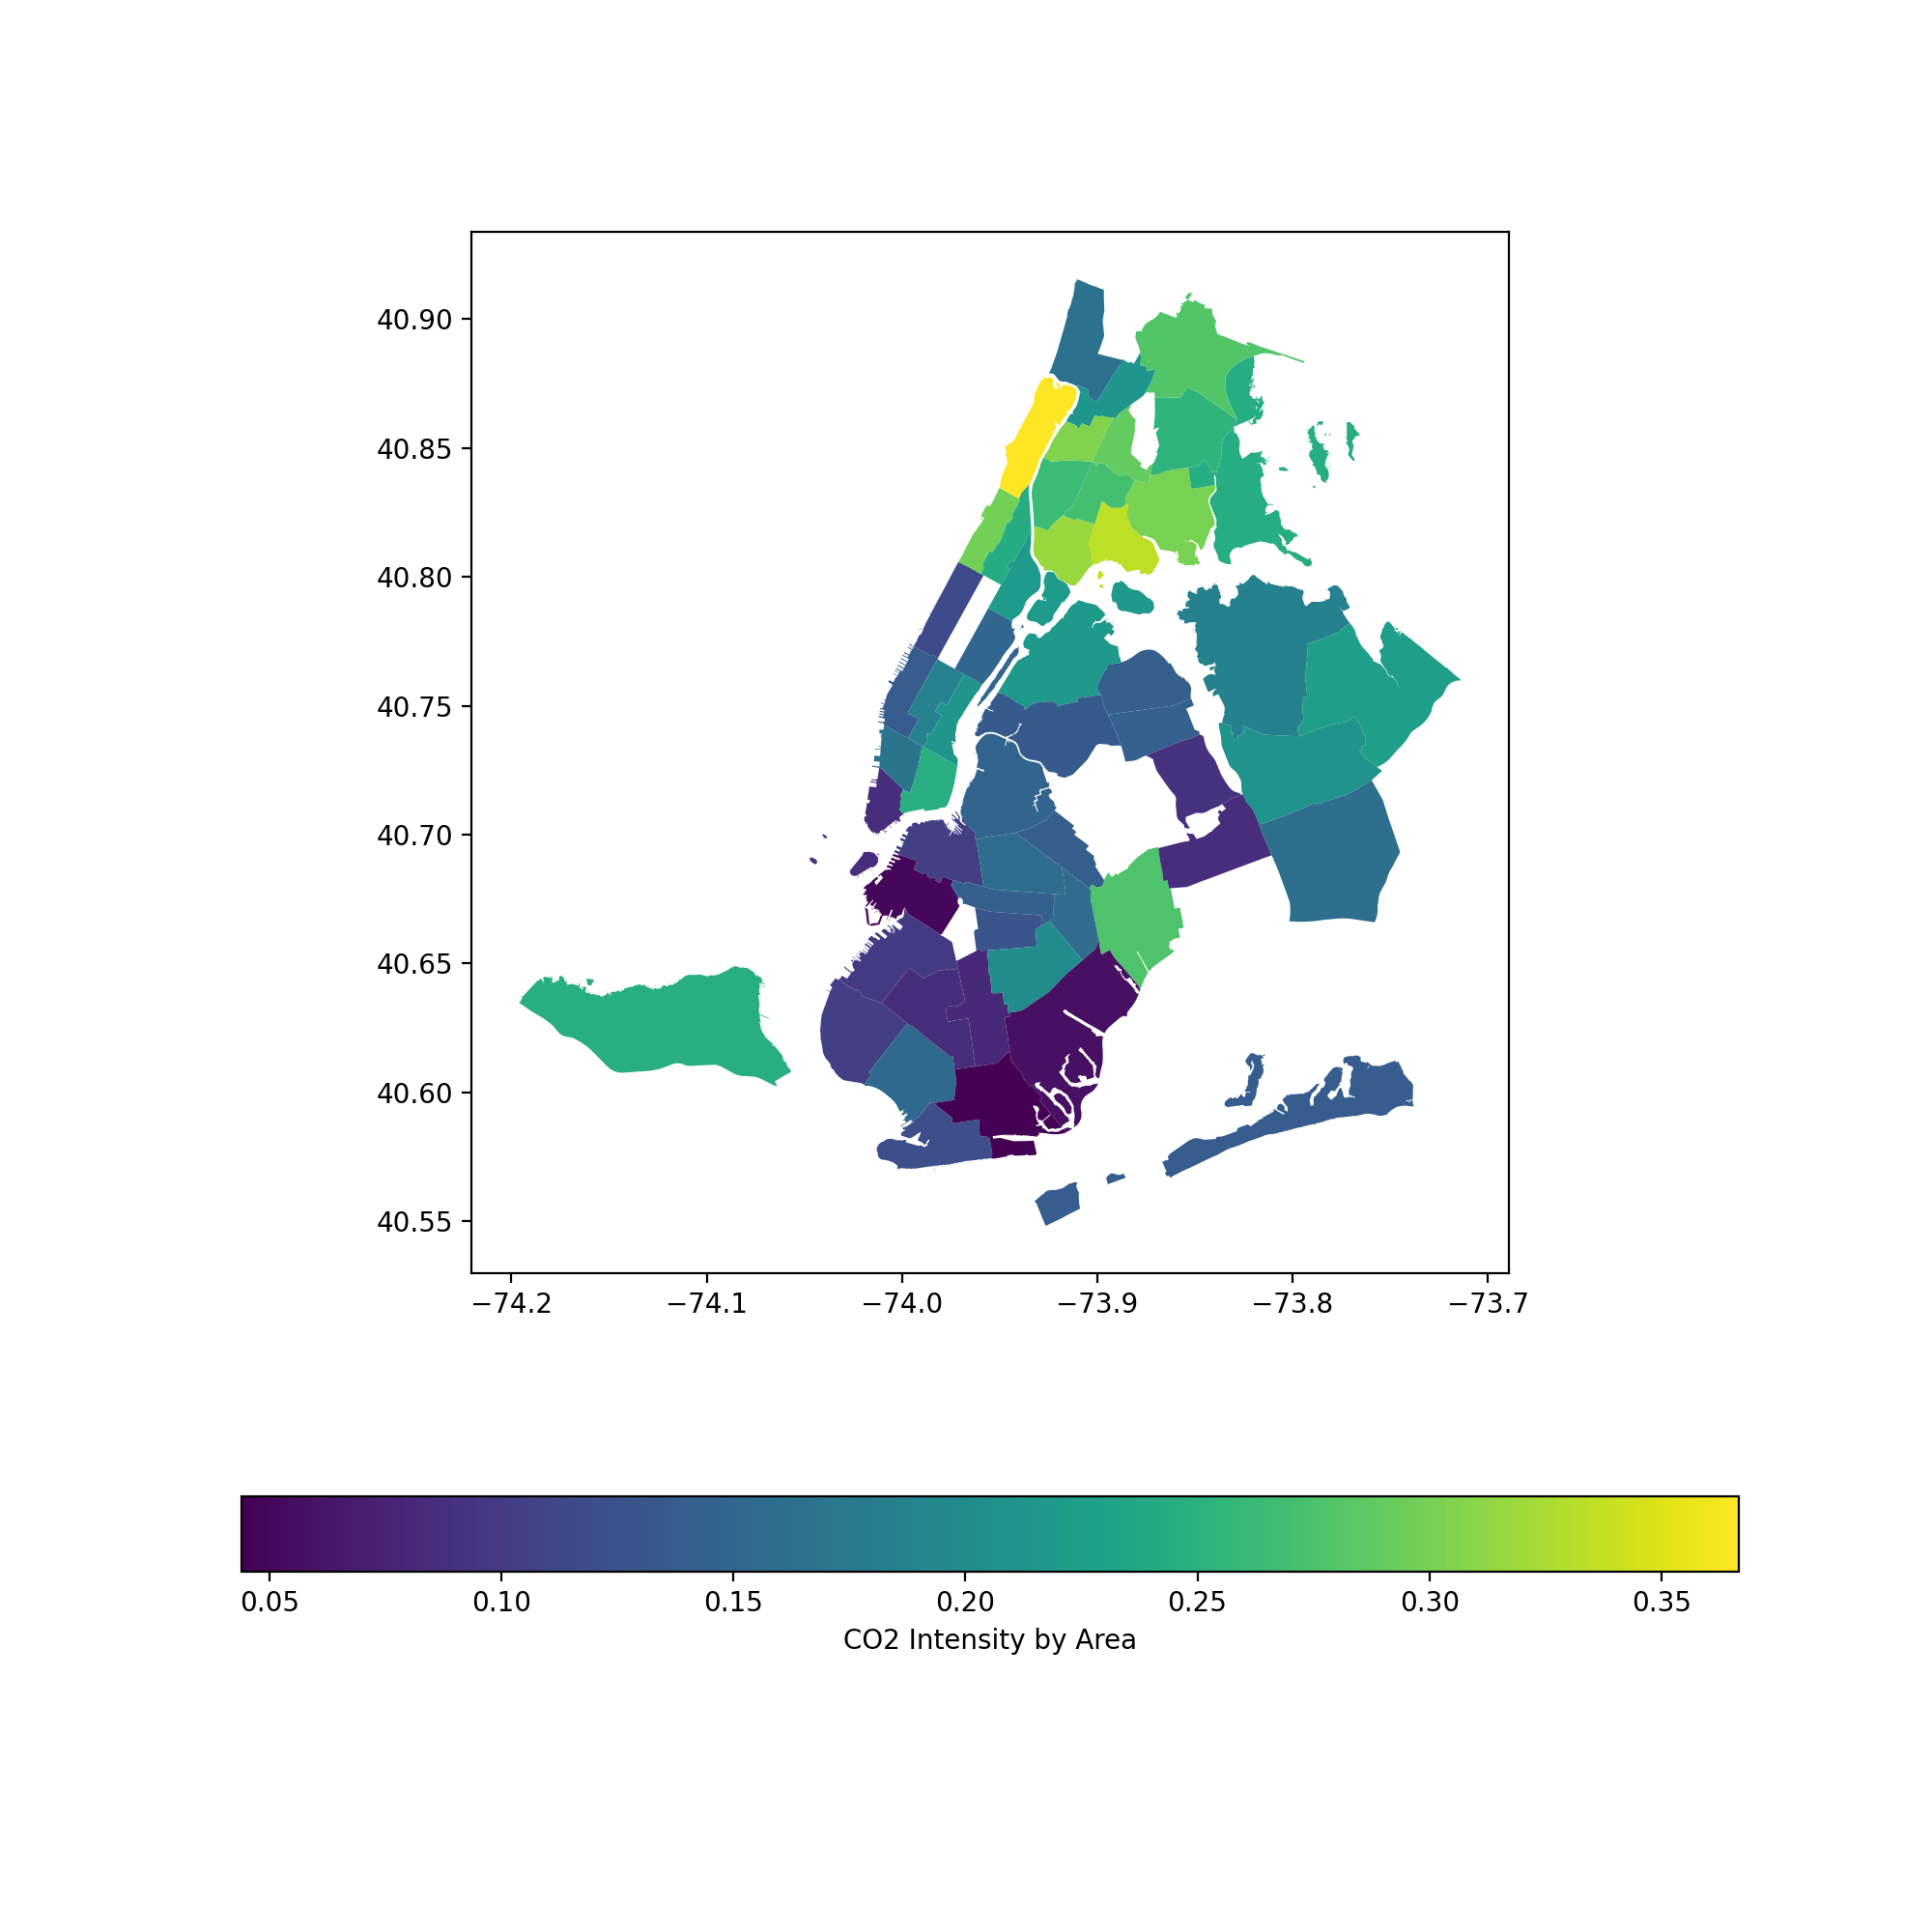

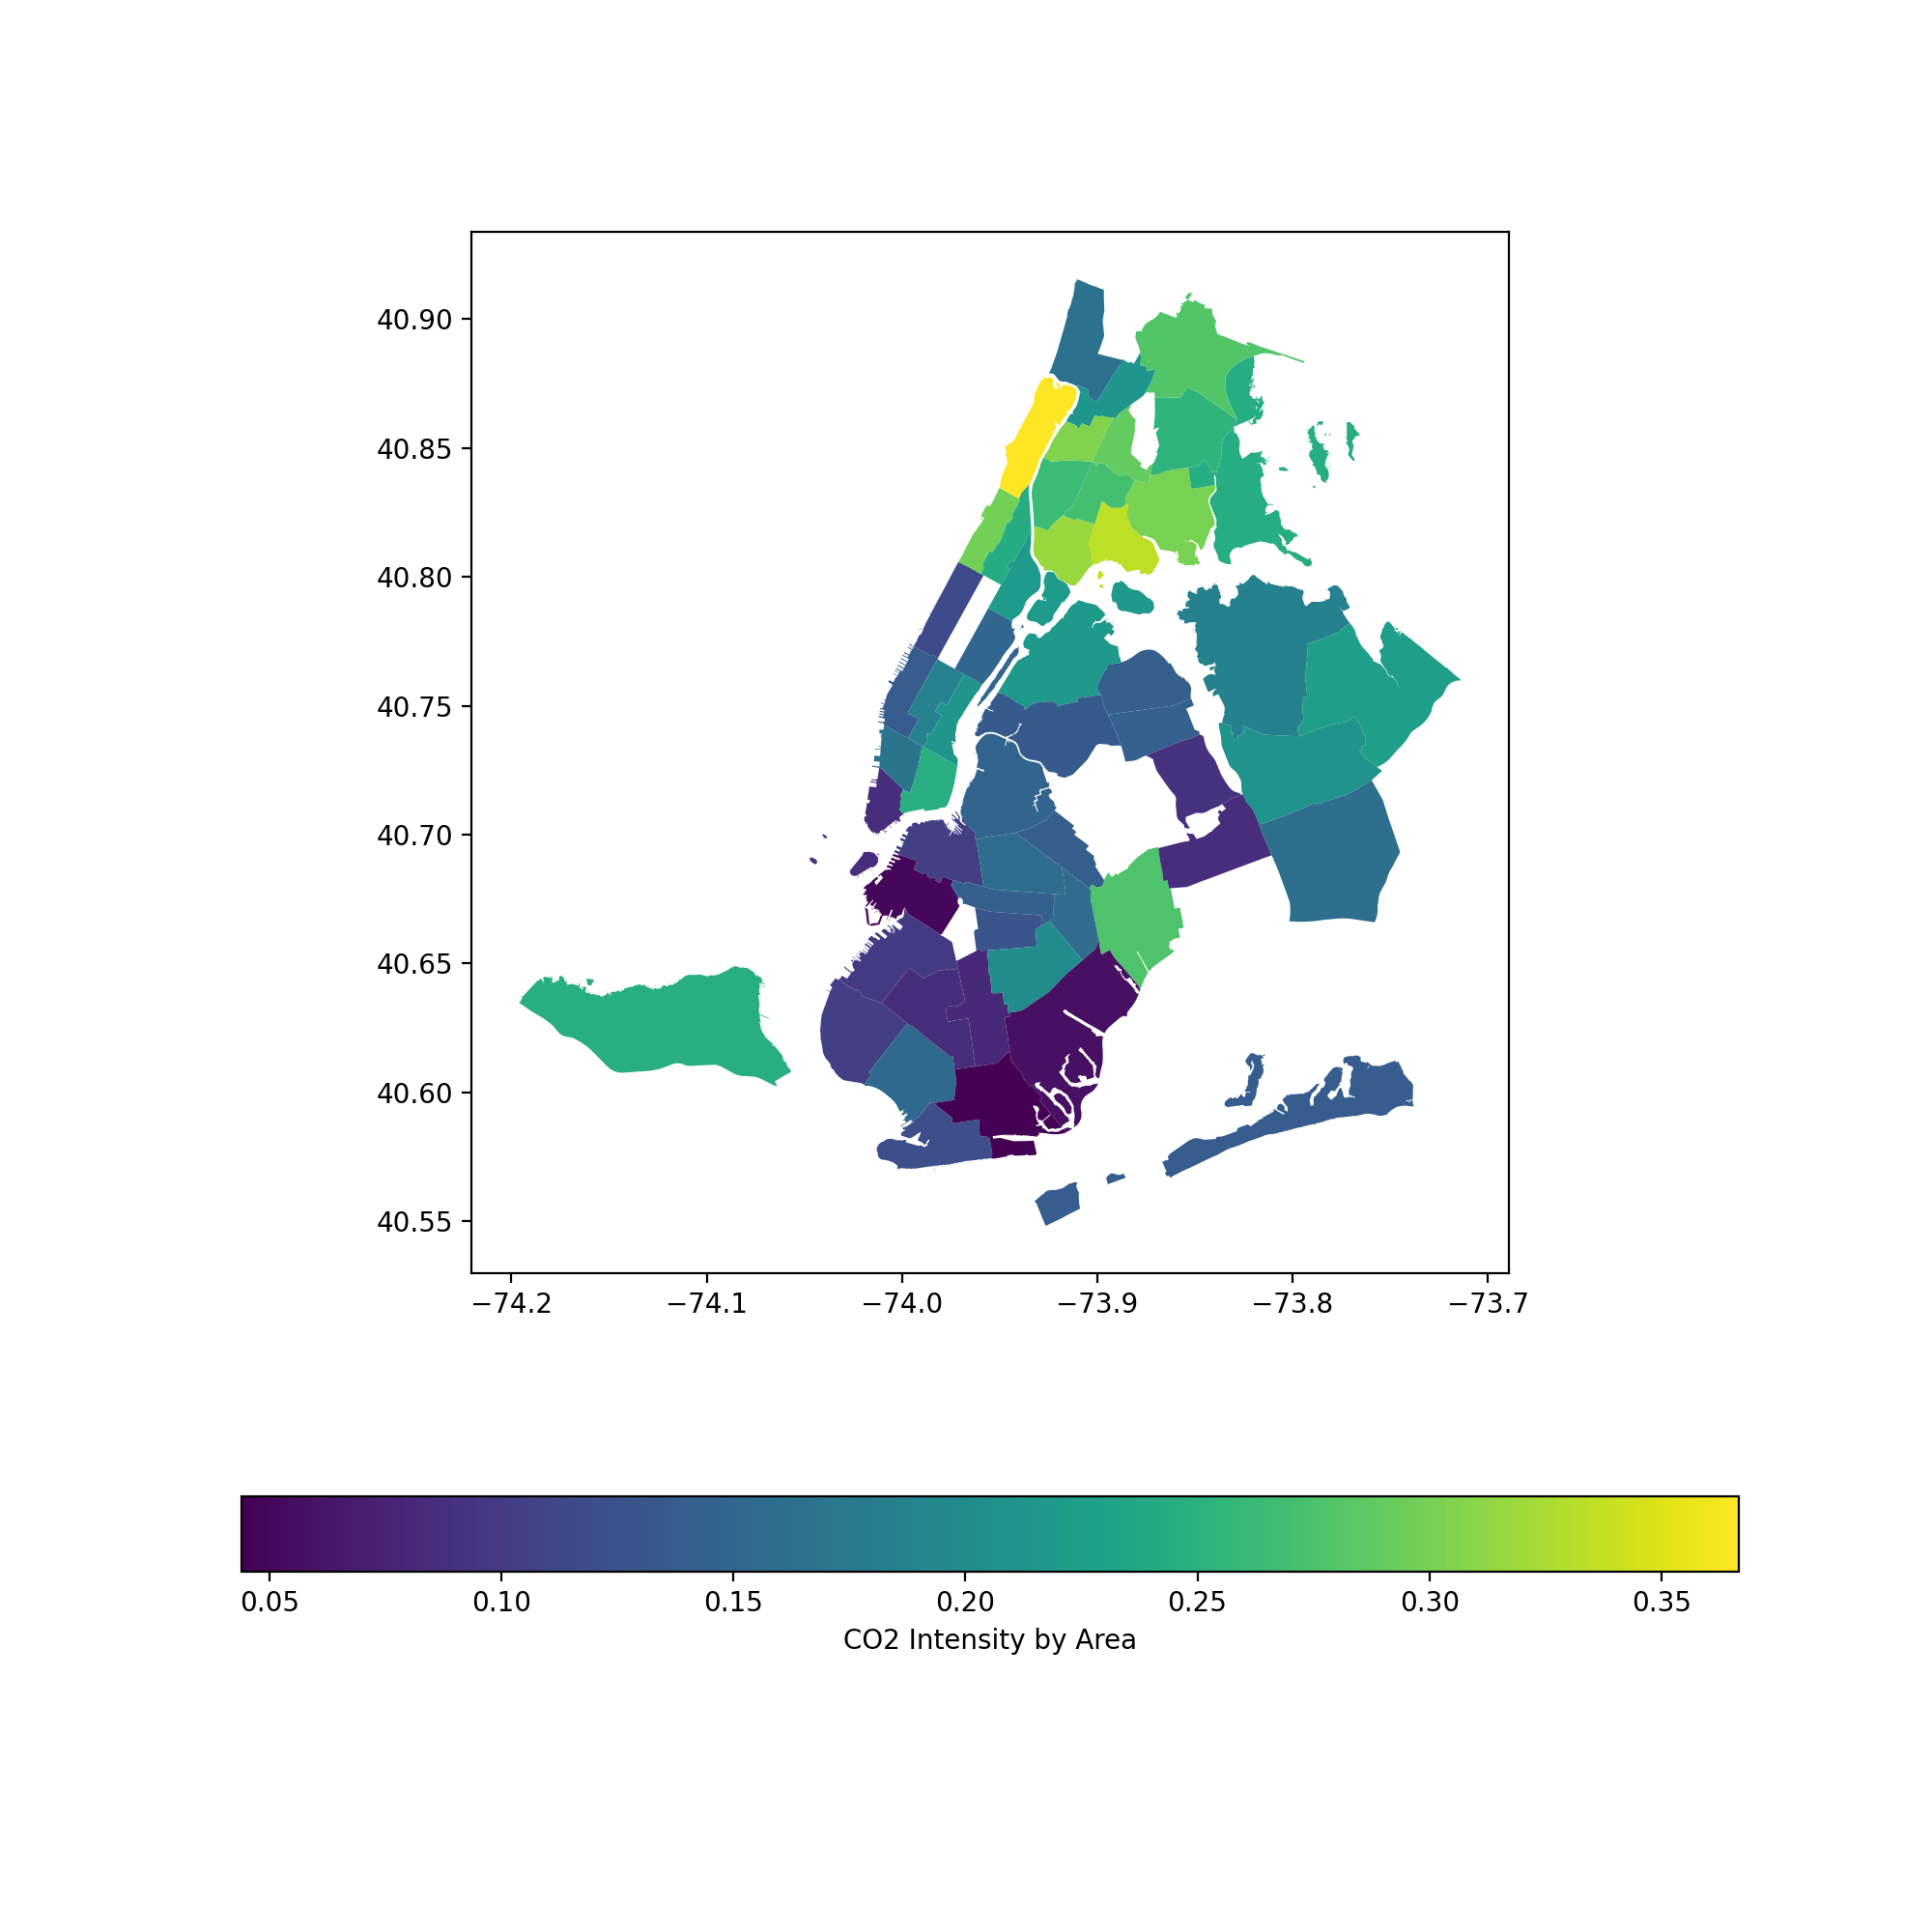

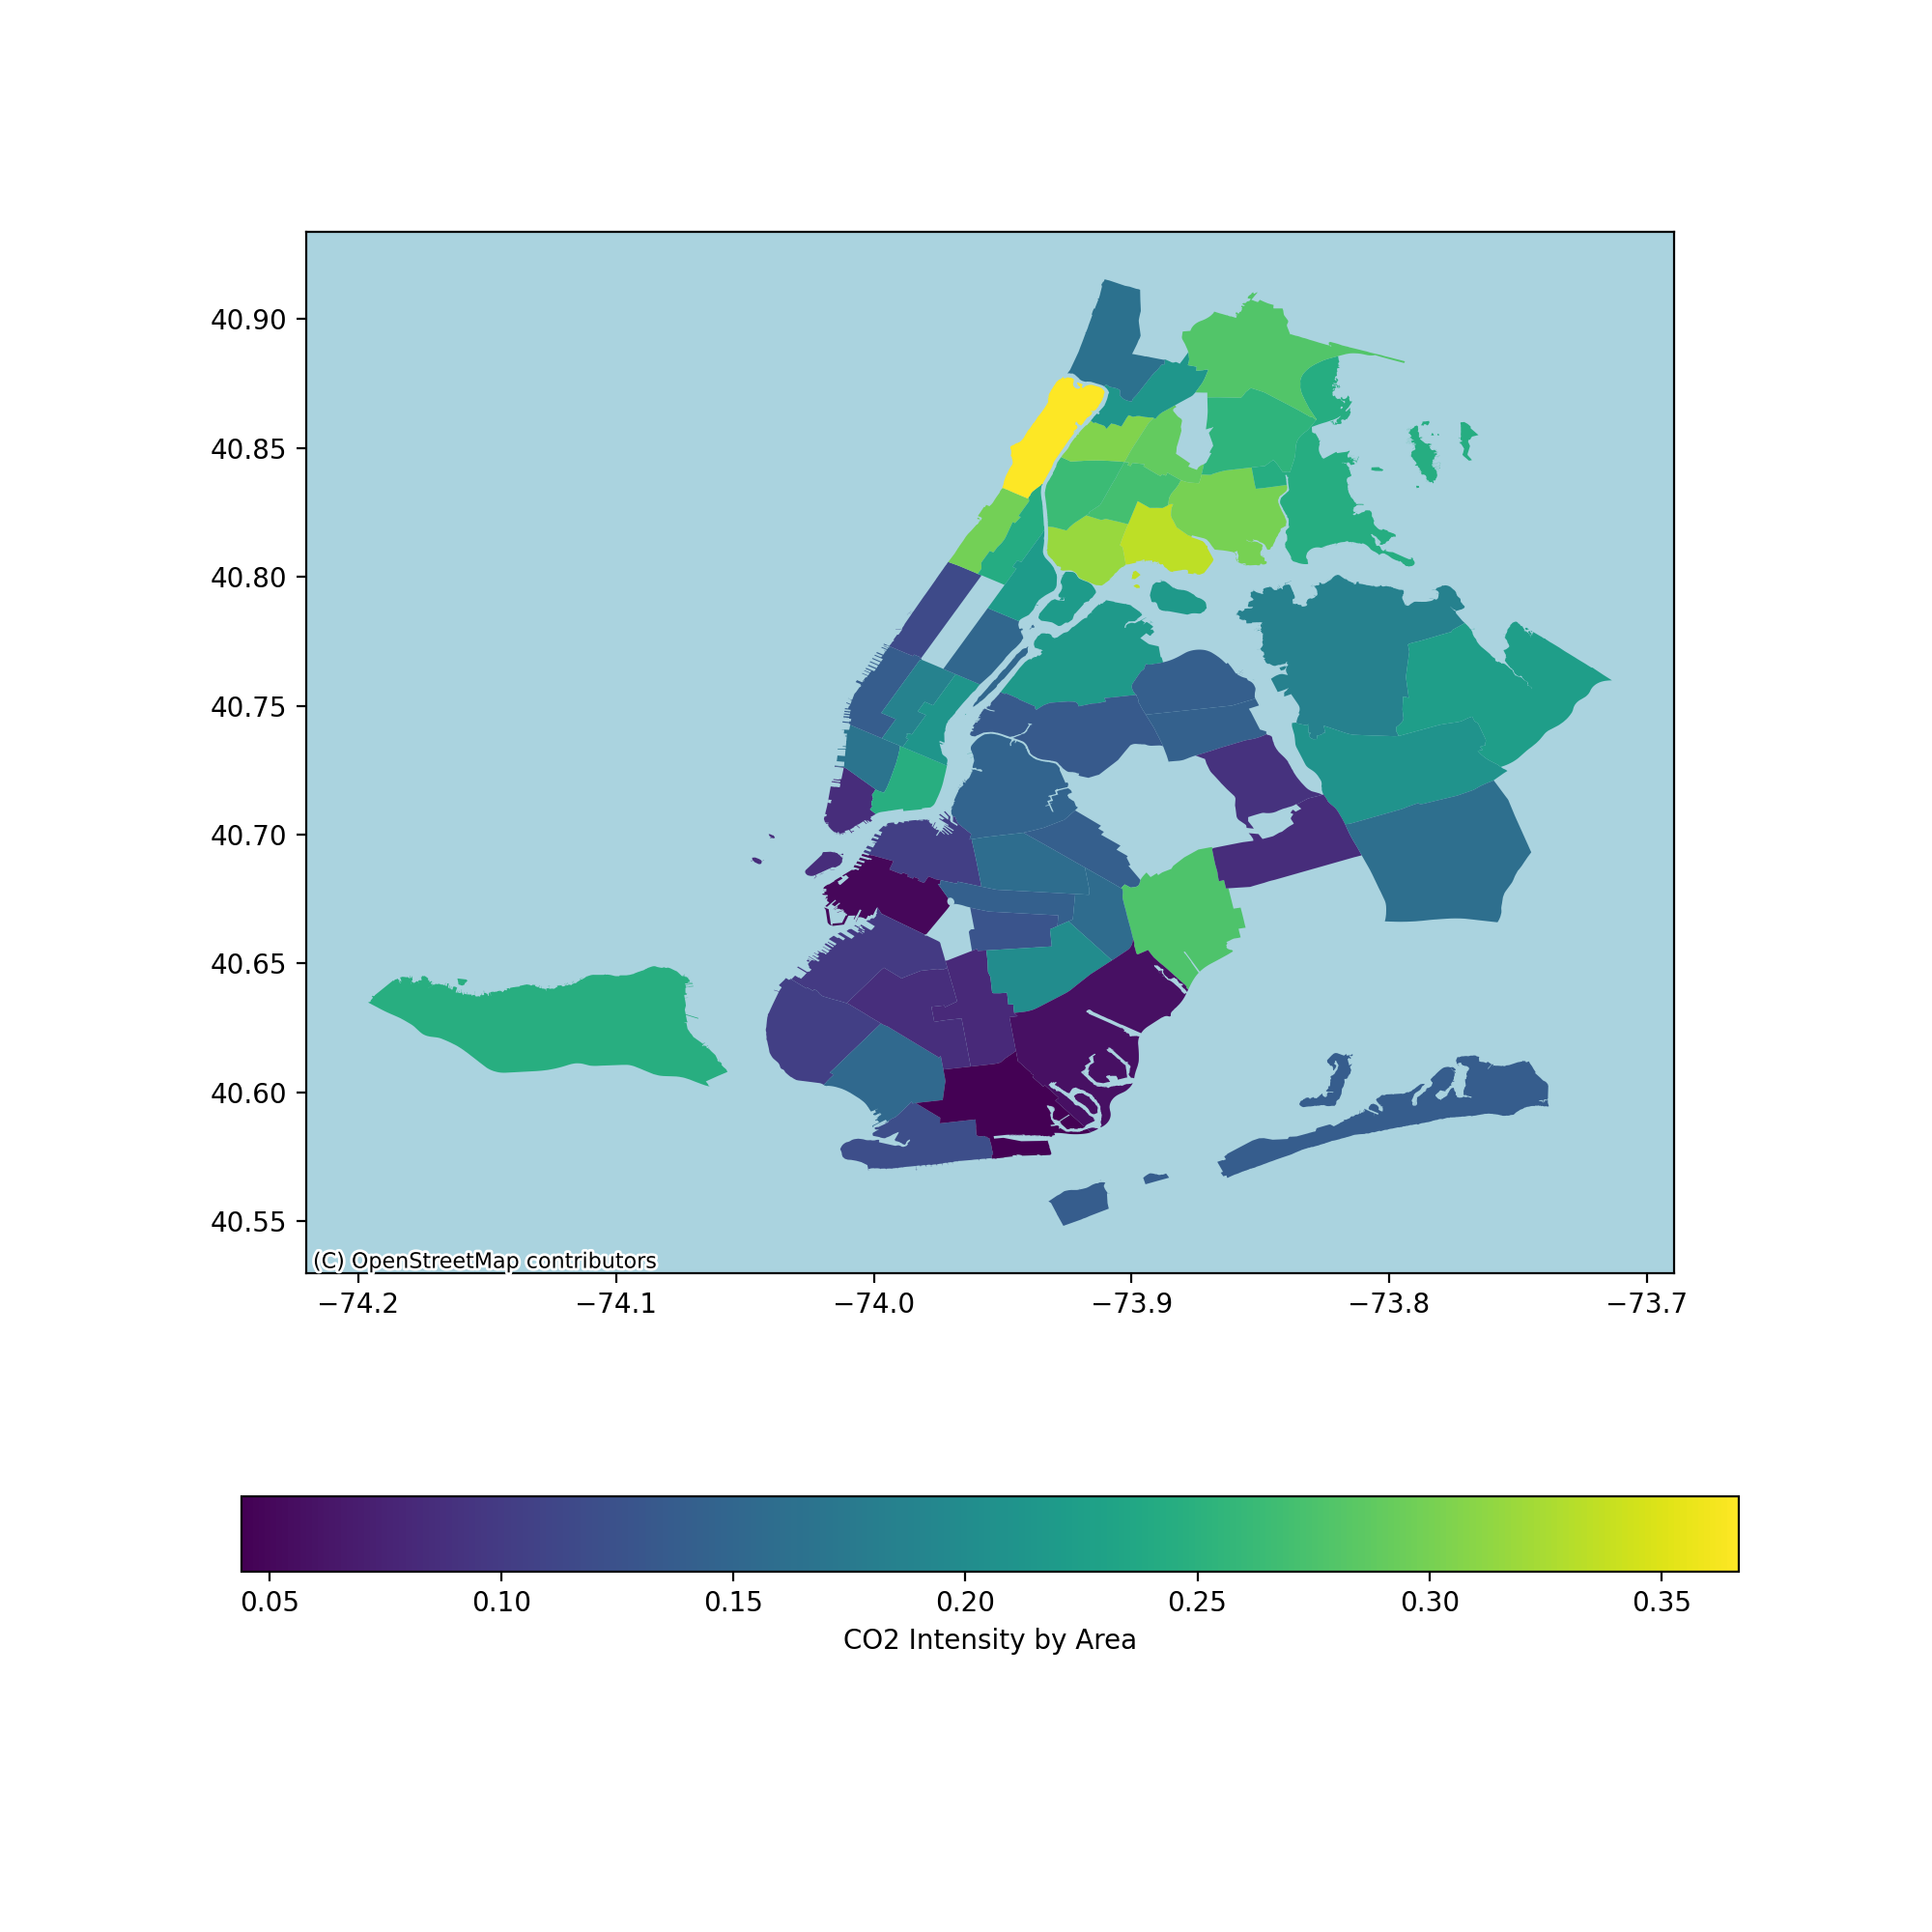

In [84]:
import matplotlib.pyplot as plt
import contextily as ctx
# Assuming nta_plot_dat is your GeoDataFrame and it contains 'co2_intensity'
# Ensure your GeoDataFrame is in the correct projection (EPSG:4326 is common for latitude and longitude)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cd_plot_dat.plot(column='bottom_quint', ax=ax, legend=True,
                 legend_kwds={'label': "CO2 Intensity by Area",
                              'orientation': "horizontal"})

zoom_level = 18  # Example zoom level, adjust as necessary

# Try a different tile source
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik , zoom=zoom_level)

plt.show()


In [ ]:
nta_plot_dat.query("co2_intensity > 7")

In [ ]:
unadjusted = smf.logit("bottom_quint ~ apt_size_cat", data = ghg).fit()
unadjusted.summary()

In [ ]:
adjusted = smf.logit("bottom_quint ~ apt_size_cat + income_bin + inferred_heating_method + laundry_cat + decade_built", data = ghg).fit()
adjusted.summary()

In [ ]:
def extract_odds_ratios_se(model):
    params = model.params
    conf = model.conf_int()
    conf['OR'] = params
    conf.columns = ['Lower CI', 'Upper CI', 'OR']
    conf['se'] = (conf['Upper CI'] - conf['Lower CI']) / (2 * 1.96) # Approximate standard error
    conf['OR'] = np.exp(conf['OR'])
    conf.reset_index(inplace=True)
    conf.rename(columns={'index': 'feature'}, inplace=True)
    conf = conf.query("feature.isin(['apt_size_cat[T.750 - 1000]', 'apt_size_cat[T.1000 - 1250]', 'apt_size_cat[T.1250 - 2000]', 'apt_size_cat[T.2000 +]'])")

    ref_df = pd.DataFrame({"feature" : ['apt_size_cat[T.750 - 1000] \n (Reference)'], "OR" : [1], "se" : [0]})
    return pd.concat([conf[['feature', 'OR', 'se']], ref_df])

In [ ]:
unadjusted_ORs  = extract_odds_ratios_se(unadjusted)
unadjusted_ORs["model"] = "Unadjusted"

In [ ]:
adjusted_ORs  = extract_odds_ratios_se(adjusted)
adjusted_ORs["model"] = "Adjusted"

In [ ]:
full_ORs = pd.concat([unadjusted_ORs, adjusted_ORs])

In [ ]:
full_ORs

In [ ]:
# Define the correct order for your categories
ordered_categories = ['apt_size_cat[T.750 - 1000] \n (Reference)', 'apt_size_cat[T.750 - 1000]', 'apt_size_cat[T.1000 - 1250]', 'apt_size_cat[T.1250 - 2000]', 'apt_size_cat[T.2000 +]']

# Convert the 'apt_size_cat' column to an ordered categorical type
full_ORs['feature'] = pd.Categorical(full_ORs['feature'], categories=ordered_categories, ordered=True)

In [ ]:
def plot_odds_ratios_ggplot(df):
    df = df.sort_values(by='OR', ascending=False)
    df['lower'] = df['OR'] - 1.96 * df['se']
    df['upper'] = df['OR'] + 1.96 * df['se']
    
    p = (ggplot(df, aes(y='reorder(feature, OR)', x='OR')) 
         + geom_point() 
         + geom_errorbarh(aes(xmin='lower', xmax='upper')) 
         + geom_vline(xintercept=1, color='red', linetype='--') 
         + theme(figure_size=(10, 6)))

    return p

In [ ]:
full_ORs['lower'] = full_ORs['OR'] - 1.96 * full_ORs['se']
full_ORs['upper'] = full_ORs['OR'] + 1.96 * full_ORs['se']

In [ ]:
(ggplot(full_ORs, aes(x='feature', y='OR', color = "model")) 
         + geom_point(position = position_dodge(width = .5)) 
         + geom_errorbar(aes(ymin='lower', ymax='upper'), position = "dodge", size = 1.5) 
         + scale_color_manual(name = " ", values = [colors[0], colors[3]], labels = ["Adjusted", "Unadjusted"])
         + labs(x = "Apartment size", y = "Odds ratio")
         + geom_vline(xintercept=1, color='red', linetype='--') 
         + theme_bw(base_size = 15)
         + theme(axis_text_x=element_text(rotation=45, hjust=1))
         + theme(figure_size=(10, 6)))

In [ ]:
full_ORs.query("feature == 'apt_size_cat[T.2000 +]'")


(ggplot(, aes(x='feature', y='OR', color = "model")) 
         + geom_point(position = position_dodge(width = .5)) 
         + geom_errorbar(aes(ymin='lower', ymax='upper'), position = "dodge", size = 1.5) 
         + scale_color_manual(name = " ", values = [colors[0], colors[3]], labels = ["Adjusted", "Unadjusted"])
         + labs(x = "Apartment size", y = "Odds ratio")
         + theme_bw(base_size = 15)
         + theme(axis_text_x=element_text(rotation=45, hjust=1))
         + theme(figure_size=(10, 6)))

In [ ]:
plot_dat = ghg.groupby("apt_size_cat").agg({"bottom_quint_unit" : "mean", "bottom_quint" : "mean"}).reset_index().melt(id_vars = "apt_size_cat")
plot_dat = plot_dat.query("apt_size_cat.isin(['< 750', '2000 +'])")
plot_dat["value"] = plot_dat["value"] * 100

(ggplot(plot_dat, aes(x = "model", y = "value", fill = "variable", group = "variable")) +
 geom_bar(position = "dodge", stat = "identity") +
 scale_fill_manual(name = "Least efficient by:", values = ["#00a5bd", "#000000"], labels = ["CO2e per square foot", "CO2e per apartment"]) +
 scale_x_discrete(labels = ["Smallest apartments", "Largest apartments"]) +
 labs(y = "Percent in highest quintile", x = "Buildings with: ") +
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8)))

In [ ]:
plot_dat["apt_size_cat"] = plot_dat["apt_size_cat"].astype(str)

In [ ]:
(ggplot(plot_dat, aes(x = "variable", y = "value", fill = "apt_size_cat")) +
 geom_bar(position = "dodge", stat = "identity") +
 scale_fill_manual(name = "Buildings with: ", values = ["#00a5bd", "#000000"], labels = ["Smallest apartments", "Largest Apartments"]) +
 labs(y = "Percent in highest quintile", x = "Average apartment size (sqft)") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

In [ ]:
ghg.columns

In [ ]:
ghg[["bbl", 'fuel_oil_energy_pct',
       'district_steam_energy_pct', 'natural_gas_energy_pct',
       'electricity_energy_pct', "inferred_heating_method"]].query("natural_gas_energy_pct < .2 & fuel_oil_energy_pct > .1 & electricity_energy_pct > .5")

In [ ]:
ghg.query("bbl == '3006640029'")

In [ ]:
ghg.melt()

In [ ]:
ggplot(ghg.query("fuel_oil_energy_pct >0"), aes(x = "fuel_oil_energy_pct", fill = "inferred_heating_method")) + geom_histogram()